<a href="https://colab.research.google.com/github/codened/DataStorm-4.0/blob/main/stormingRound/DataStorm_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.dtreeg" alt="Open In Colab"/></a>

Path 
stormingRound/DataStorm_4_0.ipynb

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data Sets

In [2]:
rawHisTransDF=pd.read_csv('Historical-transaction-data.csv')
rawStoreInfDF=pd.read_csv('Store-info.csv')
rawTestDF=pd.read_csv('Testing-data.csv')

#### Viewing Dataframe

In [3]:
rawHisTransDF.head()

item_description          transaction_date  invoice_id customer_id  \
0     ORANGE BARLEY 1.5L  2021-12-11T00:00:00.000Z       147.0        BGXA   
1       GINGER BEER 1.5L  2021-10-17T00:00:00.000Z       371.0        IA25   
2        TONIC PET 500ML  2021-12-13T00:00:00.000Z       484.0        VN7V   
3          CREAM SODA 1L  2021-12-13T00:00:00.000Z       484.0        VN7V   
4  STRAWBERRY MILK 180ML  2021-10-23T00:00:00.000Z      1310.0        7S00   

   shop_id  item_price  quantity_sold  
0  SHOP008         220              2  
1  SHOP112         220              2  
2  SHOP008         160              2  
3  SHOP008         150              2  
4  SHOP112         210              5

In [4]:
rawStoreInfDF.head()

shop_id  shop_area_sq_ft shop_profile
0  SHOP047              528     Moderate
1  SHOP009              676         High
2  SHOP083              676          Low
3  SHOP117              676          Low
4  SHOP042              676          Low

# Data Pre Processing

### Fixing Data

In [5]:
# convert the date string column to datetime
rawHisTransDF['transaction_date'] = pd.to_datetime(rawHisTransDF['transaction_date'], format='%Y/%m/%d').dt.date

In [6]:
# Performing left join
merged_df = pd.merge(rawHisTransDF, rawStoreInfDF, on='shop_id', how='left')

In [7]:
rawHisTransDF.describe(include='all').T

count  unique               top   freq            mean  \
item_description    438046      37  GINGER BEER 1.5L  59864             NaN   
transaction_date    473974      62        2021-12-11  15125             NaN   
invoice_id        467654.0     NaN               NaN    NaN  1996684.006321   
customer_id         473974  191636              RX33     95             NaN   
shop_id             473974     124           SHOP043   6631             NaN   
item_price        473974.0     NaN               NaN    NaN      206.689734   
quantity_sold     473974.0     NaN               NaN    NaN        1.925506   

                             std   min         25%        50%         75%  \
item_description             NaN   NaN         NaN        NaN         NaN   
transaction_date             NaN   NaN         NaN        NaN         NaN   
invoice_id        1344594.276666  17.0  1032113.75  2032996.0  3032568.25   
customer_id                  NaN   NaN         NaN        NaN         NaN   
shop_id                      NaN   NaN         NaN        NaN         NaN   
item_price            166.764732  35.0       100.0      200.0       220.0   
quantity_sold           1.634535  -1.0         1.0        2.0         2.0   

                        max  
item_description        NaN  
transaction_date        NaN  
invoice_id        8331754.0  
customer_id             NaN  
shop_id                 NaN  
item_price          17400.0  
quantity_sold         101.0

In [8]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        86633
dtype: int64


In [9]:
merged_df.dropna(subset=['item_description','invoice_id'], inplace=True)

In [10]:
# get count of null values in each column
null_counts = merged_df.isnull().sum()
# print the counts
print(null_counts)

item_description        0
transaction_date        0
invoice_id              0
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        79471
dtype: int64


In [11]:
merged_df.drop_duplicates(inplace=True)

### Encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# merged_df['item_description'] = le.fit_transform(merged_df['item_description'])
merged_df['customer_id'] = le.fit_transform(merged_df['customer_id'])

In [13]:
merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)

C:\Users\gw\AppData\Local\Temp\ipykernel_19236\2624828608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['shop_id'] = merged_df['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [14]:
merged_df['shop_profile'] = merged_df['shop_profile'].replace({'High': 3, 'Moderate': 2, 'Low': 1})
merged_df['shop_profile'] = merged_df['shop_profile'].fillna(0.0).astype(int)
merged_df['invoice_id'] = merged_df['invoice_id'].astype(int)

In [15]:
merged_df


item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                   GINGER BEER 1.5L       2021-10-17         371   
2                    TONIC PET 500ML       2021-12-13         484   
3                      CREAM SODA 1L       2021-12-13         484   
4              STRAWBERRY MILK 180ML       2021-10-23        1310   
...                              ...              ...         ...   
473820            FIT O ORANGE 200ML       2021-11-14     8014206   
473821  BOTTLED DRINKING WATER 500ML       2021-10-16     8304754   
473822              GINGER BEER 1.5L       2021-10-16     8304807   
473823  BOTTLED DRINKING WATER 500ML       2021-11-07     8313570   
473824               CREAM SODA 1.5L       2021-12-02     8325631   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1             91334      112         220              2              668   
2            158179        8         160              2              678   
3            158179        8         150              2              678   
4             38862      112         210              5              668   
...             ...      ...         ...            ...              ...   
473820       176899        3          60              2              810   
473821        52159      127          35              2              848   
473822        95280      127         220              1              848   
473823         8748      127          35              1              848   
473824        11566      127         220              2              848   

        shop_profile  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
473820             3  
473821             3  
473822             3  
473823             3  
473824             3  

[402301 rows x 9 columns]

In [204]:
# # merged_df order by item_price
# merged_df.sort_values(by=['item_price'], inplace=True)

In [205]:
# merged_df

item_description transaction_date  invoice_id  \
232879  BOTTLED DRINKING WATER 500ML       2021-10-25     2832230   
145902  BOTTLED DRINKING WATER 500ML       2021-10-31      223135   
145901  BOTTLED DRINKING WATER 500ML       2021-12-05     2168457   
145900  BOTTLED DRINKING WATER 500ML       2021-12-02     2167657   
145897  BOTTLED DRINKING WATER 500ML       2021-12-08     1215178   
...                              ...              ...         ...   
44087        FIT O MIXED FRUIT 200ML       2021-11-27     2052788   
362838               TONIC PET 500ML       2021-12-04     6034327   
132356               TONIC PET 500ML       2021-11-03     1227937   
270950                LEMONADE 500ML       2021-11-29     2526480   
278980               FIT O ORANGE 1L       2021-11-23     5483758   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
232879       103622       13          35              2              631   
145902       157671       43          35              1              676   
145901        83644       43          35              2              676   
145900       107598       43          35              2              676   
145897       175183       43          35              2              676   
...             ...      ...         ...            ...              ...   
44087         78509       61        4500             76              699   
362838       163146       16        4800             30             1077   
132356        12322       76        5600             36              676   
270950        80363      124        6000             60              606   
278980       174265       18       17400             61              617   

        shop_profile  full_price  ...   revnew  rev_per_sqfeet  \
232879             2          70  ...  1726415            2736   
145902             3          35  ...  2295590            3396   
145901             3          70  ...  2295590            3396   
145900             3          70  ...  2295590            3396   
145897             3          70  ...  2295590            3396   
...              ...         ...  ...      ...             ...   
44087              0      342000  ...  1983470            2838   
362838             3      144000  ...  3426650            3182   
132356             0      201600  ...  1902690            2815   
270950             3      360000  ...  2548215            4205   
278980             3     1061400  ...  4808825            7794   

        avd_daily_items_types_sold  avd_daily_transctions  \
232879                          20                     41   
145902                          24                     68   
145901                          24                     68   
145900                          24                     68   
145897                          24                     68   
...                            ...                    ...   
44087                           17                     36   
362838                          22                     69   
132356                          19                     42   
270950                          22                     48   
278980                          24                     59   

        avd_daily_custemers  avg_visits   avg_price  num_of_times_item_sold  \
232879                   41         198   60.175439                     255   
145902                   67         169   51.578947                     345   
145901                   67         169   51.578947                     345   
145900                   67         169   51.578947                     345   
145897                   67         169   51.578947                     345   
...                     ...         ...         ...                     ...   
44087                    35         166  179.491525                     213   
362838                   68         175  373.192661                    1540   
132356                   42         171  

In [16]:
print(merged_df[merged_df['quantity_sold'] == 0])

                   item_description transaction_date  invoice_id  customer_id  \
54                 CREAM SODA 500ML       2021-12-09       24423        70620   
103                      SODA 500ML       2021-10-31       31745       177679   
230                 CREAM SODA 1.5L       2021-12-10       52904        26069   
273                      NECTO 1.5L       2021-11-12       59336       154510   
465                  LEMONADE 500ML       2021-11-10      111021       100682   
...                             ...              ...         ...          ...   
473258             CREAM SODA 500ML       2021-12-04     4363428       108185   
473355                   SODA 500ML       2021-11-21     4479312       154031   
473412  BOTTLED DRINKING WATER 1.5L       2021-11-13     4603720        68657   
473462              TONIC PET 500ML       2021-12-10     4653601        63057   
473500      FIT O MIXED FRUIT 200ML       2021-10-27     4798624        37513   

        shop_id  item_price

In [17]:
merged_df = merged_df[merged_df['quantity_sold'] != 0]

In [18]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                   GINGER BEER 1.5L       2021-10-17         371   
2                    TONIC PET 500ML       2021-12-13         484   
3                      CREAM SODA 1L       2021-12-13         484   
4              STRAWBERRY MILK 180ML       2021-10-23        1310   
...                              ...              ...         ...   
473820            FIT O ORANGE 200ML       2021-11-14     8014206   
473821  BOTTLED DRINKING WATER 500ML       2021-10-16     8304754   
473822              GINGER BEER 1.5L       2021-10-16     8304807   
473823  BOTTLED DRINKING WATER 500ML       2021-11-07     8313570   
473824               CREAM SODA 1.5L       2021-12-02     8325631   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1             91334      112         220              2              668   
2            158179        8         160              2              678   
3            158179        8         150              2              678   
4             38862      112         210              5              668   
...             ...      ...         ...            ...              ...   
473820       176899        3          60              2              810   
473821        52159      127          35              2              848   
473822        95280      127         220              1              848   
473823         8748      127          35              1              848   
473824        11566      127         220              2              848   

        shop_profile  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
473820             3  
473821             3  
473822             3  
473823             3  
473824             3  

[394480 rows x 9 columns]

# Feature Engineering

### Feature Creation

In [19]:
merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']

C:\Users\gw\AppData\Local\Temp\ipykernel_19236\2634474984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['full_price'] = merged_df['quantity_sold'] * merged_df['item_price']


#### creating Avarage daily sales for each shop

In [20]:
merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


C:\Users\gw\AppData\Local\Temp\ipykernel_19236\1755121770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Daily_Sales'] = merged_df.groupby(['shop_id', 'transaction_date'])['full_price'].transform('sum')


In [21]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                   GINGER BEER 1.5L       2021-10-17         371   
2                    TONIC PET 500ML       2021-12-13         484   
3                      CREAM SODA 1L       2021-12-13         484   
4              STRAWBERRY MILK 180ML       2021-10-23        1310   
...                              ...              ...         ...   
473820            FIT O ORANGE 200ML       2021-11-14     8014206   
473821  BOTTLED DRINKING WATER 500ML       2021-10-16     8304754   
473822              GINGER BEER 1.5L       2021-10-16     8304807   
473823  BOTTLED DRINKING WATER 500ML       2021-11-07     8313570   
473824               CREAM SODA 1.5L       2021-12-02     8325631   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1             91334      112         220              2              668   
2            158179        8         160              2              678   
3            158179        8         150              2              678   
4             38862      112         210              5              668   
...             ...      ...         ...            ...              ...   
473820       176899        3          60              2              810   
473821        52159      127          35              2              848   
473822        95280      127         220              1              848   
473823         8748      127          35              1              848   
473824        11566      127         220              2              848   

        shop_profile  full_price  Daily_Sales  
0                  2         440        65375  
1                  2         440        23290  
2                  2         320         3625  
3                  2         300         3625  
4                  2        1050        19600  
...              ...         ...          ...  
473820             3         120        27765  
473821             3          70        33180  
473822             3         220        33180  
473823             3          35       109150  
473824             3         440        56360  

[394480 rows x 11 columns]

In [22]:
subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]

C:\Users\gw\AppData\Local\Temp\ipykernel_19236\1990627187.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  subset = merged_df.loc[(merged_df['transaction_date'] == pd.to_datetime('2021-12-11')) & (merged_df['shop_id'] == 8)]


In [23]:
# Group by shop id and calculate mean of daily_sales column
avg_sales = merged_df.groupby('shop_id')['Daily_Sales'].mean().reset_index()

# Merge the average sales data back into the original dataframe
merged_df = merged_df.merge(avg_sales, on='shop_id', suffixes=('', '_avg'))

# Print the updated dataframe
merged_df.head()

item_description transaction_date  invoice_id  customer_id  shop_id  \
0  ORANGE BARLEY 1.5L       2021-12-11         147        57272        8   
1     TONIC PET 500ML       2021-12-13         484       158179        8   
2       CREAM SODA 1L       2021-12-13         484       158179        8   
3    GINGER BEER 1.5L       2021-12-10     1000053       159040        8   
4    GINGER BEER 1.5L       2021-12-10     1000057        43724        8   

   item_price  quantity_sold  shop_area_sq_ft  shop_profile  full_price  \
0         220              2              678             2         440   
1         160              2              678             2         320   
2         150              2              678             2         300   
3         220              1              678             2         220   
4         440              1              678             2         440   

   Daily_Sales  Daily_Sales_avg  
0        65375     37040.173913  
1         3625     37040.173913  
2         3625     37040.173913  
3        27435     37040.173913  
4        27435     37040.173913

#### Full revinew

In [24]:
merged_df['revnew'] = merged_df.groupby(['shop_id'])['full_price'].transform('sum')

In [25]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                    TONIC PET 500ML       2021-12-13         484   
2                      CREAM SODA 1L       2021-12-13         484   
3                   GINGER BEER 1.5L       2021-12-10     1000053   
4                   GINGER BEER 1.5L       2021-12-10     1000057   
...                              ...              ...         ...   
394475               FIT O ORANGE 1L       2021-11-28     7027965   
394476                    NECTO 1.5L       2021-12-03     7029132   
394477             GINGER BEER 400ML       2021-12-08     7030122   
394478            FIT O ORANGE 200ML       2021-12-11     7030809   
394479  BOTTLED DRINKING WATER 500ML       2021-12-11     7030820   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1            158179        8         160              2              678   
2            158179        8         150              2              678   
3            159040        8         220              1              678   
4             43724        8         440              1              678   
...             ...      ...         ...            ...              ...   
394475        44679       72         290              2              617   
394476         4618       72         440              3              617   
394477        63983       72         100              2              617   
394478        89595       72         140              2              617   
394479       124346       72          35              1              617   

        shop_profile  full_price  Daily_Sales  Daily_Sales_avg   revnew  
0                  2         440        65375     37040.173913   121225  
1                  2         320         3625     37040.173913   121225  
2                  2         300         3625     37040.173913   121225  
3                  2         220        27435     37040.173913   121225  
4                  2         440        27435     37040.173913   121225  
...              ...         ...          ...              ...      ...  
394475             3         580        38705     41364.617086  2410580  
394476             3        1320        42170     41364.617086  2410580  
394477             3         200        20010     41364.617086  2410580  
394478             3         280        42000     41364.617086  2410580  
394479             3          35        42000     41364.617086  2410580  

[394480 rows x 13 columns]

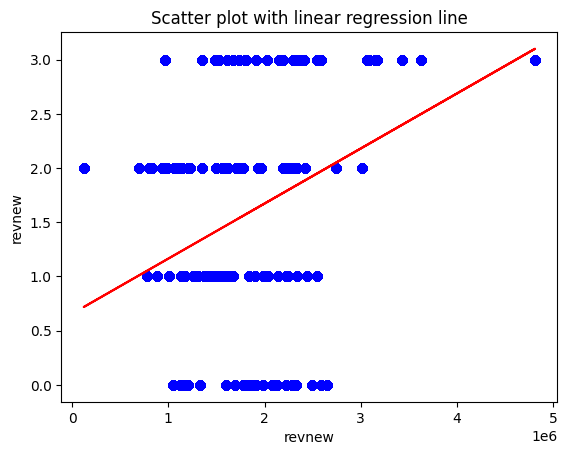

In [206]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='revnew'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Revnew per sqr feet of land

In [26]:
merged_df['rev_per_sqfeet'] = (merged_df['revnew'] / merged_df['shop_area_sq_ft']).round().astype(int)


In [27]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                    TONIC PET 500ML       2021-12-13         484   
2                      CREAM SODA 1L       2021-12-13         484   
3                   GINGER BEER 1.5L       2021-12-10     1000053   
4                   GINGER BEER 1.5L       2021-12-10     1000057   
...                              ...              ...         ...   
394475               FIT O ORANGE 1L       2021-11-28     7027965   
394476                    NECTO 1.5L       2021-12-03     7029132   
394477             GINGER BEER 400ML       2021-12-08     7030122   
394478            FIT O ORANGE 200ML       2021-12-11     7030809   
394479  BOTTLED DRINKING WATER 500ML       2021-12-11     7030820   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1            158179        8         160              2              678   
2            158179        8         150              2              678   
3            159040        8         220              1              678   
4             43724        8         440              1              678   
...             ...      ...         ...            ...              ...   
394475        44679       72         290              2              617   
394476         4618       72         440              3              617   
394477        63983       72         100              2              617   
394478        89595       72         140              2              617   
394479       124346       72          35              1              617   

        shop_profile  full_price  Daily_Sales  Daily_Sales_avg   revnew  \
0                  2         440        65375     37040.173913   121225   
1                  2         320         3625     37040.173913   121225   
2                  2         300         3625     37040.173913   121225   
3                  2         220        27435     37040.173913   121225   
4                  2         440        27435     37040.173913   121225   
...              ...         ...          ...              ...      ...   
394475             3         580        38705     41364.617086  2410580   
394476             3        1320        42170     41364.617086  2410580   
394477             3         200        20010     41364.617086  2410580   
394478             3         280        42000     41364.617086  2410580   
394479             3          35        42000     41364.617086  2410580   

        rev_per_sqfeet  
0                  179  
1                  179  
2                  179  
3                  179  
4                  179  
...                ...  
394475            3907  
394476            3907  
394477            3907  
394478            3907  
394479            3907  

[394480 rows x 14 columns]

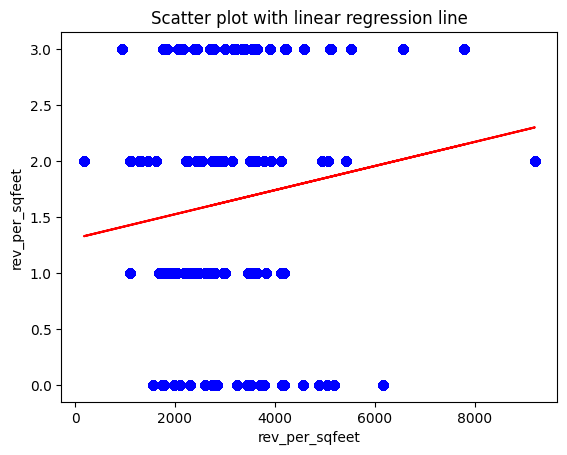

In [207]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='rev_per_sqfeet'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

df= merged_df
X=df[['rev_per_sqfeet']]
y=[['shop_profile']]


# Create an instance of logistic regression model
logreg = LogisticRegression()

# Fit the model on the data
logreg.fit(X, y)

# Predict probabilities for each point in the feature space
xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')

plt.show()


c:\Users\gw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [394480, 1]

#### Avarage sold item types per each shop 

In [28]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_items_sold = merged_df.groupby(['shop_id', 'transaction_date'])['item_description'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_items_sold = daily_items_sold.groupby('shop_id')['item_description'].mean().reset_index()

# rename the columns
avg_daily_items_sold.columns = ['shop_id', 'avd_daily_items_types_sold']
# convert float column to integers
avg_daily_items_sold['avd_daily_items_types_sold'] = avg_daily_items_sold['avd_daily_items_types_sold'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_items_sold, on='shop_id', how='left')

In [29]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                    TONIC PET 500ML       2021-12-13         484   
2                      CREAM SODA 1L       2021-12-13         484   
3                   GINGER BEER 1.5L       2021-12-10     1000053   
4                   GINGER BEER 1.5L       2021-12-10     1000057   
...                              ...              ...         ...   
394475               FIT O ORANGE 1L       2021-11-28     7027965   
394476                    NECTO 1.5L       2021-12-03     7029132   
394477             GINGER BEER 400ML       2021-12-08     7030122   
394478            FIT O ORANGE 200ML       2021-12-11     7030809   
394479  BOTTLED DRINKING WATER 500ML       2021-12-11     7030820   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1            158179        8         160              2              678   
2            158179        8         150              2              678   
3            159040        8         220              1              678   
4             43724        8         440              1              678   
...             ...      ...         ...            ...              ...   
394475        44679       72         290              2              617   
394476         4618       72         440              3              617   
394477        63983       72         100              2              617   
394478        89595       72         140              2              617   
394479       124346       72          35              1              617   

        shop_profile  full_price  Daily_Sales  Daily_Sales_avg   revnew  \
0                  2         440        65375     37040.173913   121225   
1                  2         320         3625     37040.173913   121225   
2                  2         300         3625     37040.173913   121225   
3                  2         220        27435     37040.173913   121225   
4                  2         440        27435     37040.173913   121225   
...              ...         ...          ...              ...      ...   
394475             3         580        38705     41364.617086  2410580   
394476             3        1320        42170     41364.617086  2410580   
394477             3         200        20010     41364.617086  2410580   
394478             3         280        42000     41364.617086  2410580   
394479             3          35        42000     41364.617086  2410580   

        rev_per_sqfeet  avd_daily_items_types_sold  
0                  179                          16  
1                  179                          16  
2                  179                          16  
3                  179                          16  
4                  179                          16  
...                ...                         ...  
394475            3907                          22  
394476            3907                          22  
394477            3907                          22  
394478            3907                          22  
394479            3907                          22  

[394480 rows x 15 columns]

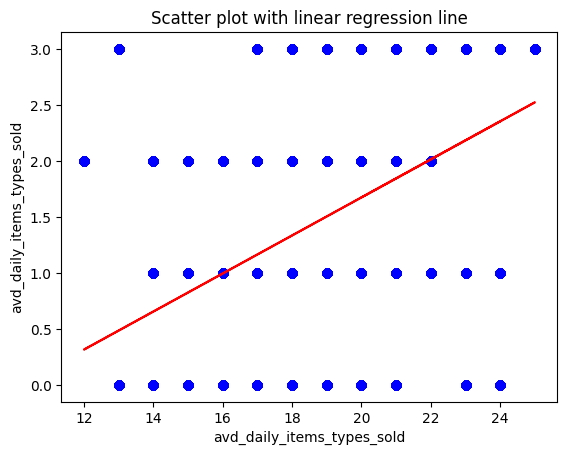

In [209]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avd_daily_items_types_sold'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Avarage Daily Transactions per each shop

In [30]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_trans = merged_df.groupby(['shop_id', 'transaction_date'])['invoice_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_trans = daily_trans.groupby('shop_id')['invoice_id'].mean().reset_index()

# rename the columns
avg_daily_trans.columns = ['shop_id', 'avd_daily_transctions']
# convert float column to integers
avg_daily_trans['avd_daily_transctions'] = avg_daily_trans['avd_daily_transctions'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_trans, on='shop_id', how='left')

In [31]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                    TONIC PET 500ML       2021-12-13         484   
2                      CREAM SODA 1L       2021-12-13         484   
3                   GINGER BEER 1.5L       2021-12-10     1000053   
4                   GINGER BEER 1.5L       2021-12-10     1000057   
...                              ...              ...         ...   
394475               FIT O ORANGE 1L       2021-11-28     7027965   
394476                    NECTO 1.5L       2021-12-03     7029132   
394477             GINGER BEER 400ML       2021-12-08     7030122   
394478            FIT O ORANGE 200ML       2021-12-11     7030809   
394479  BOTTLED DRINKING WATER 500ML       2021-12-11     7030820   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1            158179        8         160              2              678   
2            158179        8         150              2              678   
3            159040        8         220              1              678   
4             43724        8         440              1              678   
...             ...      ...         ...            ...              ...   
394475        44679       72         290              2              617   
394476         4618       72         440              3              617   
394477        63983       72         100              2              617   
394478        89595       72         140              2              617   
394479       124346       72          35              1              617   

        shop_profile  full_price  Daily_Sales  Daily_Sales_avg   revnew  \
0                  2         440        65375     37040.173913   121225   
1                  2         320         3625     37040.173913   121225   
2                  2         300         3625     37040.173913   121225   
3                  2         220        27435     37040.173913   121225   
4                  2         440        27435     37040.173913   121225   
...              ...         ...          ...              ...      ...   
394475             3         580        38705     41364.617086  2410580   
394476             3        1320        42170     41364.617086  2410580   
394477             3         200        20010     41364.617086  2410580   
394478             3         280        42000     41364.617086  2410580   
394479             3          35        42000     41364.617086  2410580   

        rev_per_sqfeet  avd_daily_items_types_sold  avd_daily_transctions  
0                  179                          16                     32  
1                  179                          16                     32  
2                  179                          16                     32  
3                  179                          16                     32  
4                  179                          16                     32  
...                ...                         ...                    ...  
394475            3907                          22                     49  
394476            3907                          22                     49  
394477            3907                          22                     49  
394478            3907                          22                     49  
394479            3907                          22                     49  

[394480 rows x 16 columns]

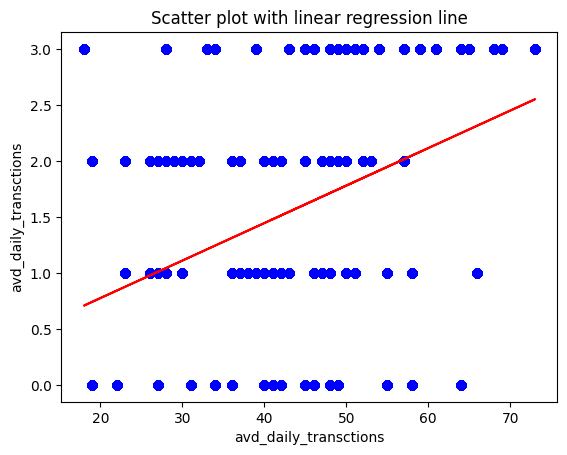

In [210]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avd_daily_transctions'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Average number of custemers per day

In [32]:
# group the original table by Shop ID and Transaction Date and count the unique items sold on each day
daily_custemers = merged_df.groupby(['shop_id', 'transaction_date'])['customer_id'].nunique().reset_index()

# group the resulting table by Shop ID and take the mean of the nunique column
avg_daily_custemers = daily_custemers.groupby('shop_id')['customer_id'].mean().reset_index()

# rename the columns
avg_daily_custemers.columns = ['shop_id', 'avd_daily_custemers']
# convert float column to integers
avg_daily_custemers['avd_daily_custemers'] = avg_daily_custemers['avd_daily_custemers'].round().astype(int)

# merge with the original dataframe
merged_df = pd.merge(merged_df, avg_daily_custemers, on='shop_id', how='left')

In [33]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                    TONIC PET 500ML       2021-12-13         484   
2                      CREAM SODA 1L       2021-12-13         484   
3                   GINGER BEER 1.5L       2021-12-10     1000053   
4                   GINGER BEER 1.5L       2021-12-10     1000057   
...                              ...              ...         ...   
394475               FIT O ORANGE 1L       2021-11-28     7027965   
394476                    NECTO 1.5L       2021-12-03     7029132   
394477             GINGER BEER 400ML       2021-12-08     7030122   
394478            FIT O ORANGE 200ML       2021-12-11     7030809   
394479  BOTTLED DRINKING WATER 500ML       2021-12-11     7030820   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1            158179        8         160              2              678   
2            158179        8         150              2              678   
3            159040        8         220              1              678   
4             43724        8         440              1              678   
...             ...      ...         ...            ...              ...   
394475        44679       72         290              2              617   
394476         4618       72         440              3              617   
394477        63983       72         100              2              617   
394478        89595       72         140              2              617   
394479       124346       72          35              1              617   

        shop_profile  full_price  Daily_Sales  Daily_Sales_avg   revnew  \
0                  2         440        65375     37040.173913   121225   
1                  2         320         3625     37040.173913   121225   
2                  2         300         3625     37040.173913   121225   
3                  2         220        27435     37040.173913   121225   
4                  2         440        27435     37040.173913   121225   
...              ...         ...          ...              ...      ...   
394475             3         580        38705     41364.617086  2410580   
394476             3        1320        42170     41364.617086  2410580   
394477             3         200        20010     41364.617086  2410580   
394478             3         280        42000     41364.617086  2410580   
394479             3          35        42000     41364.617086  2410580   

        rev_per_sqfeet  avd_daily_items_types_sold  avd_daily_transctions  \
0                  179                          16                     32   
1                  179                          16                     32   
2                  179                          16                     32   
3                  179                          16                     32   
4                  179                          16                     32   
...                ...                         ...                    ...   
394475            3907                          22                     49   
394476            3907                          22                     49   
394477            3907                          22                     49   
394478            3907                          22                     49   
394479            3907                          22                     49   

        avd_daily_custemers  
0                        32  
1                        32  
2                        32  
3                        32  
4                        32  
...                     ...  
394475                   48  
394476                   48  
394477                   48  
394478                   48  
394479                   48  

[394480 rows x 17 columns]

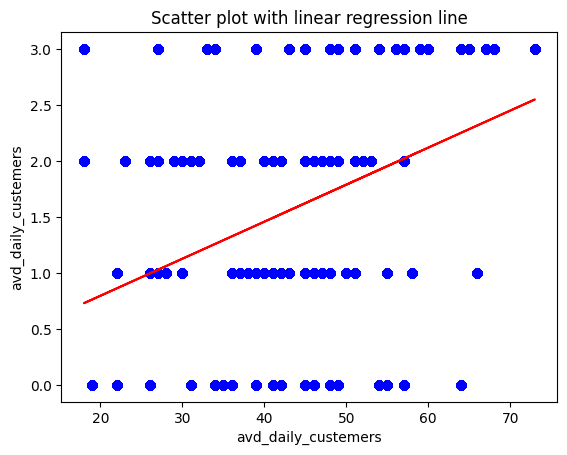

In [217]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avd_daily_custemers'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Persentage of Avarage number of time the same customer returning for the same shop

In [34]:
# calculate the number of times each customer visited each shop
visits = merged_df.groupby(['customer_id', 'shop_id'])['transaction_date'].count()
# calculate the average number of visits per customer per shop
avg_visits = visits.groupby(['shop_id']).mean()*100

avg_visits=avg_visits.round().astype(int)
# create a new DataFrame with the average visits
avg_visits_df = avg_visits.reset_index().rename(columns={'transaction_date': 'avg_visits'})

# merge the new DataFrame with the original DataFrame to add the average visits column
merged_df = pd.merge(merged_df, avg_visits_df, on=['shop_id'])

In [35]:
merged_df

item_description transaction_date  invoice_id  \
0                 ORANGE BARLEY 1.5L       2021-12-11         147   
1                    TONIC PET 500ML       2021-12-13         484   
2                      CREAM SODA 1L       2021-12-13         484   
3                   GINGER BEER 1.5L       2021-12-10     1000053   
4                   GINGER BEER 1.5L       2021-12-10     1000057   
...                              ...              ...         ...   
394475               FIT O ORANGE 1L       2021-11-28     7027965   
394476                    NECTO 1.5L       2021-12-03     7029132   
394477             GINGER BEER 400ML       2021-12-08     7030122   
394478            FIT O ORANGE 200ML       2021-12-11     7030809   
394479  BOTTLED DRINKING WATER 500ML       2021-12-11     7030820   

        customer_id  shop_id  item_price  quantity_sold  shop_area_sq_ft  \
0             57272        8         220              2              678   
1            158179        8         160              2              678   
2            158179        8         150              2              678   
3            159040        8         220              1              678   
4             43724        8         440              1              678   
...             ...      ...         ...            ...              ...   
394475        44679       72         290              2              617   
394476         4618       72         440              3              617   
394477        63983       72         100              2              617   
394478        89595       72         140              2              617   
394479       124346       72          35              1              617   

        shop_profile  full_price  Daily_Sales  Daily_Sales_avg   revnew  \
0                  2         440        65375     37040.173913   121225   
1                  2         320         3625     37040.173913   121225   
2                  2         300         3625     37040.173913   121225   
3                  2         220        27435     37040.173913   121225   
4                  2         440        27435     37040.173913   121225   
...              ...         ...          ...              ...      ...   
394475             3         580        38705     41364.617086  2410580   
394476             3        1320        42170     41364.617086  2410580   
394477             3         200        20010     41364.617086  2410580   
394478             3         280        42000     41364.617086  2410580   
394479             3          35        42000     41364.617086  2410580   

        rev_per_sqfeet  avd_daily_items_types_sold  avd_daily_transctions  \
0                  179                          16                     32   
1                  179                          16                     32   
2                  179                          16                     32   
3                  179                          16                     32   
4                  179                          16                     32   
...                ...                         ...                    ...   
394475            3907                          22                     49   
394476            3907                          22                     49   
394477            3907                          22                     49   
394478            3907                          22                     49   
394479            3907                          22                     49   

        avd_daily_custemers  avg_visits  
0                        32         127  
1                        32         127  
2                        32         127  
3                        32         127  
4                        32         127  
...                     ...         ...  
394475                   48         157  
394476                   48         157  
394477                   48         157  
394478                   48     

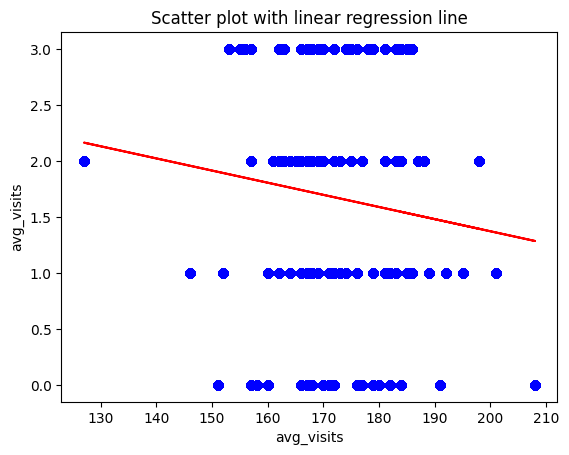

In [218]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression

df= merged_df
x='avg_visits'
y='shop_profile'

model = LinearRegression().fit(df[[x]], df[y])

# create scatter plot and regression line
plt.scatter(df[x], df[y], color='blue')
plt.plot(df[x], model.predict(df[[x]]), color='red')

# set plot labels
plt.title('Scatter plot with linear regression line')
plt.xlabel(x)
plt.ylabel(x)

# display plot
plt.show()

#### Avg price for each item in each shop

In [36]:
# for (shop_id, item_description), item_price in merged_df.groupby(['shop_id', 'item_description'])['item_price']:
#     print(f"shop_id: {shop_id}, Item type: {item_description}")
#     print(item_price)
    


In [37]:
# Calculate average price for each item type sold by each shop
avg_prices = merged_df.groupby(['shop_id', 'item_description'])['item_price'].mean().reset_index()

# Rename 'price' column to 'avg_price'
avg_prices = avg_prices.rename(columns={'item_price': 'avg_price'})

# Merge the average prices back into the original DataFrame
merged_df = pd.merge(merged_df, avg_prices, on=['shop_id', 'item_description'])

In [38]:
merged_df

item_description transaction_date  invoice_id  customer_id  shop_id  \
0       ORANGE BARLEY 1.5L       2021-12-11         147        57272        8   
1       ORANGE BARLEY 1.5L       2021-12-10          54        97284        8   
2       ORANGE BARLEY 1.5L       2021-12-10     2000071       144334        8   
3       ORANGE BARLEY 1.5L       2021-12-12     3000280       147572        8   
4       ORANGE BARLEY 1.5L       2021-12-12         322        88285        8   
...                    ...              ...         ...          ...      ...   
394475     ORANGE CRUSH 1L       2021-11-05     7023229       166913       72   
394476     ORANGE CRUSH 1L       2021-11-18     1478119        35014       72   
394477     ORANGE CRUSH 1L       2021-11-26     3400566        39990       72   
394478     ORANGE CRUSH 1L       2021-11-20     4286907       113583       72   
394479     ORANGE CRUSH 1L       2021-10-16     3392667        80133       72   

        item_price  quantity_sold  shop_area_sq_ft  shop_profile  full_price  \
0              220              2              678             2         440   
1              220              1              678             2         220   
2              220              1              678             2         220   
3              220              1              678             2         220   
4              220              2              678             2         440   
...            ...            ...              ...           ...         ...   
394475         150              1              617             3         150   
394476         150              1              617             3         150   
394477         150              2              617             3         300   
394478         150              1              617             3         150   
394479         150              2              617             3         300   

        Daily_Sales  Daily_Sales_avg   revnew  rev_per_sqfeet  \
0             65375     37040.173913   121225             179   
1             27435     37040.173913   121225             179   
2             27435     37040.173913   121225             179   
3              8530     37040.173913   121225             179   
4              8530     37040.173913   121225             179   
...             ...              ...      ...             ...   
394475        17725     41364.617086  2410580            3907   
394476        14250     41364.617086  2410580            3907   
394477        25505     41364.617086  2410580            3907   
394478        30320     41364.617086  2410580            3907   
394479        44150     41364.617086  2410580            3907   

        avd_daily_items_types_sold  avd_daily_transctions  \
0                               16                     32   
1                               16                     32   
2                               16                     32   
3                               16                     32   
4                               16                     32   
...                            ...                    ...   
394475                          22                     49   
394476                          22                     49   
394477                          22                     49   
394478                          22                     49   
394479                          22                     49   

        avd_daily_custemers  avg_visits  avg_price  
0                        32         127      220.0  
1                        32         127      220.0  
2                        32         127      220.0  
3                        32         127      220.0  
4                        32         127      220.0  
...                     ...         ...        ...  
394475                   48         157      150.0  
394476                   48         157      150.0  
394477                   48         157      150.0  
394478                   48     

#### Number of items each item sold by each shop

In [39]:
# calculate the number of times each item sold by each shop
Num_of_times = merged_df.groupby(['item_description', 'shop_id'])['quantity_sold'].transform('sum')

Num_of_times=Num_of_times.to_frame()

Num_of_times = Num_of_times.rename(columns={'quantity_sold': 'num_of_times_item_sold'})


# concatenate the dataframes
merged_df = pd.concat([merged_df, Num_of_times], axis=1)


In [40]:
merged_df

item_description transaction_date  invoice_id  customer_id  shop_id  \
0       ORANGE BARLEY 1.5L       2021-12-11         147        57272        8   
1       ORANGE BARLEY 1.5L       2021-12-10          54        97284        8   
2       ORANGE BARLEY 1.5L       2021-12-10     2000071       144334        8   
3       ORANGE BARLEY 1.5L       2021-12-12     3000280       147572        8   
4       ORANGE BARLEY 1.5L       2021-12-12         322        88285        8   
...                    ...              ...         ...          ...      ...   
394475     ORANGE CRUSH 1L       2021-11-05     7023229       166913       72   
394476     ORANGE CRUSH 1L       2021-11-18     1478119        35014       72   
394477     ORANGE CRUSH 1L       2021-11-26     3400566        39990       72   
394478     ORANGE CRUSH 1L       2021-11-20     4286907       113583       72   
394479     ORANGE CRUSH 1L       2021-10-16     3392667        80133       72   

        item_price  quantity_sold  shop_area_sq_ft  shop_profile  full_price  \
0              220              2              678             2         440   
1              220              1              678             2         220   
2              220              1              678             2         220   
3              220              1              678             2         220   
4              220              2              678             2         440   
...            ...            ...              ...           ...         ...   
394475         150              1              617             3         150   
394476         150              1              617             3         150   
394477         150              2              617             3         300   
394478         150              1              617             3         150   
394479         150              2              617             3         300   

        Daily_Sales  Daily_Sales_avg   revnew  rev_per_sqfeet  \
0             65375     37040.173913   121225             179   
1             27435     37040.173913   121225             179   
2             27435     37040.173913   121225             179   
3              8530     37040.173913   121225             179   
4              8530     37040.173913   121225             179   
...             ...              ...      ...             ...   
394475        17725     41364.617086  2410580            3907   
394476        14250     41364.617086  2410580            3907   
394477        25505     41364.617086  2410580            3907   
394478        30320     41364.617086  2410580            3907   
394479        44150     41364.617086  2410580            3907   

        avd_daily_items_types_sold  avd_daily_transctions  \
0                               16                     32   
1                               16                     32   
2                               16                     32   
3                               16                     32   
4                               16                     32   
...                            ...                    ...   
394475                          22                     49   
394476                          22                     49   
394477                          22                     49   
394478                          22                     49   
394479                          22                     49   

        avd_daily_custemers  avg_visits  avg_price  num_of_times_item_sold  
0                        32         127      220.0                       7  
1                        32         127      220.0                       7  
2                        32         127      220.0                       7  
3                        32         127      220.0                       7  
4                        32         127      220.0                       7  
...                     ...         ...        ...                     ...  
394475                 

#### Total quantity sold

In [41]:
tot_quantity_sold= merged_df.groupby(['shop_id'])['quantity_sold'].transform('sum')

tot_quantity_sold=tot_quantity_sold.to_frame()

tot_quantity_sold = tot_quantity_sold.rename(columns={'quantity_sold': 'tot_quantity_sold'})

# concatenate the dataframes
merged_df = pd.concat([merged_df, tot_quantity_sold], axis=1)

In [42]:
merged_df

item_description transaction_date  invoice_id  customer_id  shop_id  \
0       ORANGE BARLEY 1.5L       2021-12-11         147        57272        8   
1       ORANGE BARLEY 1.5L       2021-12-10          54        97284        8   
2       ORANGE BARLEY 1.5L       2021-12-10     2000071       144334        8   
3       ORANGE BARLEY 1.5L       2021-12-12     3000280       147572        8   
4       ORANGE BARLEY 1.5L       2021-12-12         322        88285        8   
...                    ...              ...         ...          ...      ...   
394475     ORANGE CRUSH 1L       2021-11-05     7023229       166913       72   
394476     ORANGE CRUSH 1L       2021-11-18     1478119        35014       72   
394477     ORANGE CRUSH 1L       2021-11-26     3400566        39990       72   
394478     ORANGE CRUSH 1L       2021-11-20     4286907       113583       72   
394479     ORANGE CRUSH 1L       2021-10-16     3392667        80133       72   

        item_price  quantity_sold  shop_area_sq_ft  shop_profile  full_price  \
0              220              2              678             2         440   
1              220              1              678             2         220   
2              220              1              678             2         220   
3              220              1              678             2         220   
4              220              2              678             2         440   
...            ...            ...              ...           ...         ...   
394475         150              1              617             3         150   
394476         150              1              617             3         150   
394477         150              2              617             3         300   
394478         150              1              617             3         150   
394479         150              2              617             3         300   

        ...  Daily_Sales_avg   revnew  rev_per_sqfeet  \
0       ...     37040.173913   121225             179   
1       ...     37040.173913   121225             179   
2       ...     37040.173913   121225             179   
3       ...     37040.173913   121225             179   
4       ...     37040.173913   121225             179   
...     ...              ...      ...             ...   
394475  ...     41364.617086  2410580            3907   
394476  ...     41364.617086  2410580            3907   
394477  ...     41364.617086  2410580            3907   
394478  ...     41364.617086  2410580            3907   
394479  ...     41364.617086  2410580            3907   

        avd_daily_items_types_sold  avd_daily_transctions  \
0                               16                     32   
1                               16                     32   
2                               16                     32   
3                               16                     32   
4                               16                     32   
...                            ...                    ...   
394475                          22                     49   
394476                          22                     49   
394477                          22                     49   
394478                          22                     49   
394479                          22                     49   

        avd_daily_custemers  avg_visits  avg_price  num_of_times_item_sold  \
0                        32         127      220.0                       7   
1                        32         127      220.0                       7   
2                        32         127      220.0                       7   
3                        32         127      220.0                       7   
4                        32         127      220.0                       7   
...                     ...         ...        ...                     ...   
394475                   48         157      150.0                      11   
394476                   48       

#### Average Item Price Per Shop

In [43]:
merged_df['avg_itm_pp_Shop'] = (merged_df['revnew'] / merged_df['tot_quantity_sold']).astype(int)

In [44]:
merged_df

item_description transaction_date  invoice_id  customer_id  shop_id  \
0       ORANGE BARLEY 1.5L       2021-12-11         147        57272        8   
1       ORANGE BARLEY 1.5L       2021-12-10          54        97284        8   
2       ORANGE BARLEY 1.5L       2021-12-10     2000071       144334        8   
3       ORANGE BARLEY 1.5L       2021-12-12     3000280       147572        8   
4       ORANGE BARLEY 1.5L       2021-12-12         322        88285        8   
...                    ...              ...         ...          ...      ...   
394475     ORANGE CRUSH 1L       2021-11-05     7023229       166913       72   
394476     ORANGE CRUSH 1L       2021-11-18     1478119        35014       72   
394477     ORANGE CRUSH 1L       2021-11-26     3400566        39990       72   
394478     ORANGE CRUSH 1L       2021-11-20     4286907       113583       72   
394479     ORANGE CRUSH 1L       2021-10-16     3392667        80133       72   

        item_price  quantity_sold  shop_area_sq_ft  shop_profile  full_price  \
0              220              2              678             2         440   
1              220              1              678             2         220   
2              220              1              678             2         220   
3              220              1              678             2         220   
4              220              2              678             2         440   
...            ...            ...              ...           ...         ...   
394475         150              1              617             3         150   
394476         150              1              617             3         150   
394477         150              2              617             3         300   
394478         150              1              617             3         150   
394479         150              2              617             3         300   

        ...   revnew  rev_per_sqfeet  avd_daily_items_types_sold  \
0       ...   121225             179                          16   
1       ...   121225             179                          16   
2       ...   121225             179                          16   
3       ...   121225             179                          16   
4       ...   121225             179                          16   
...     ...      ...             ...                         ...   
394475  ...  2410580            3907                          22   
394476  ...  2410580            3907                          22   
394477  ...  2410580            3907                          22   
394478  ...  2410580            3907                          22   
394479  ...  2410580            3907                          22   

        avd_daily_transctions  avd_daily_custemers  avg_visits  avg_price  \
0                          32                   32         127      220.0   
1                          32                   32         127      220.0   
2                          32                   32         127      220.0   
3                          32                   32         127      220.0   
4                          32                   32         127      220.0   
...                       ...                  ...         ...        ...   
394475                     49                   48         157      150.0   
394476                     49                   48         157      150.0   
394477                     49                   48         157      150.0   
394478                     49                   48         157      150.0   
394479                     49                   48         157      150.0   

        num_of_times_item_sold  tot_quantity_sold  avg_itm_pp_Shop  
0                            7                438              276  
1                            7                438              276  
2                            7                438              276  
3                            7                438         

# Visualizing

C:\Users\gw\AppData\Local\Temp\ipykernel_19236\3510410926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


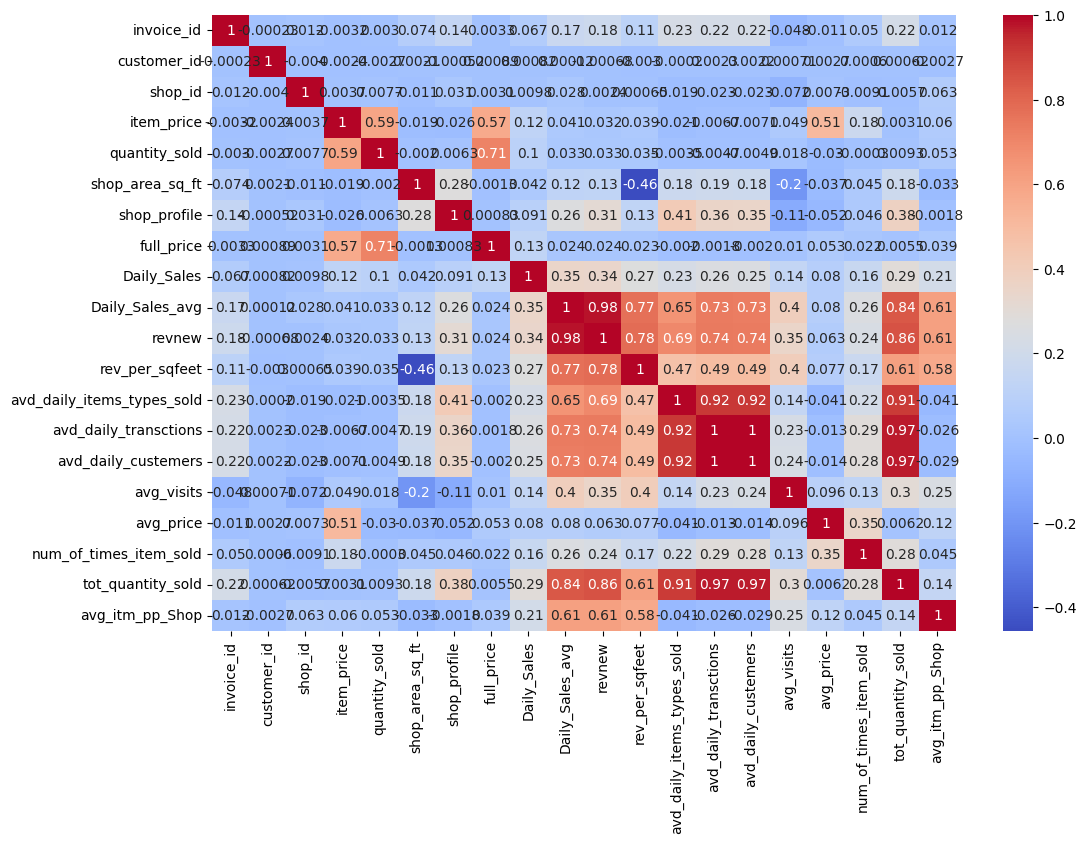

In [45]:
# Create correlation matrix
corr = merged_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [46]:
# Drop highly co related features
cleanedDF = merged_df.drop(['avd_daily_custemers','transaction_date','revnew','item_price','item_description','quantity_sold','full_price','customer_id','avd_daily_transctions'], axis=1)

In [47]:
# # Drop all low MI features
# cleanedDF = cleanedDF.drop(['avd_daily_items_types_sold','num_of_times_item_sold','avg_visits','shop_area_sq_ft','invoice_id','avg_itm_pp_Shop'], axis=1)


In [48]:
# drop duplicates
cleanedDF.drop_duplicates(inplace=True)

In [49]:
cleanedDF

invoice_id  shop_id  shop_area_sq_ft  shop_profile  Daily_Sales  \
0              147        8              678             2        65375   
1               54        8              678             2        27435   
2          2000071        8              678             2        27435   
3          3000280        8              678             2         8530   
4              322        8              678             2         8530   
...            ...      ...              ...           ...          ...   
394475     7023229       72              617             3        17725   
394476     1478119       72              617             3        14250   
394477     3400566       72              617             3        25505   
394478     4286907       72              617             3        30320   
394479     3392667       72              617             3        44150   

        Daily_Sales_avg  rev_per_sqfeet  avd_daily_items_types_sold  \
0          37040.173913             179                          16   
1          37040.173913             179                          16   
2          37040.173913             179                          16   
3          37040.173913             179                          16   
4          37040.173913             179                          16   
...                 ...             ...                         ...   
394475     41364.617086            3907                          22   
394476     41364.617086            3907                          22   
394477     41364.617086            3907                          22   
394478     41364.617086            3907                          22   
394479     41364.617086            3907                          22   

        avg_visits  avg_price  num_of_times_item_sold  tot_quantity_sold  \
0              127      220.0                       7                438   
1              127      220.0                       7                438   
2              127      220.0                       7                438   
3              127      220.0                       7                438   
4              127      220.0                       7                438   
...            ...        ...                     ...                ...   
394475         157      150.0                      11               6888   
394476         157      150.0                      11               6888   
394477         157      150.0                      11               6888   
394478         157      150.0                      11               6888   
394479         157      150.0                      11               6888   

        avg_itm_pp_Shop  
0                   276  
1                   276  
2                   276  
3                   276  
4                   276  
...                 ...  
394475              349  
394476              349  
394477              349  
394478              349  
394479              349  

[379537 rows x 13 columns]

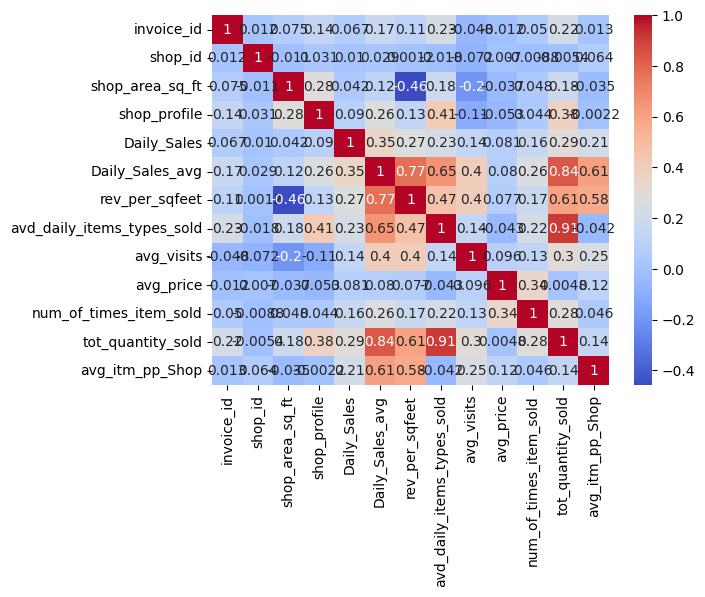

In [50]:
# Create correlation matrix
corr = cleanedDF.corr()

# # Set figure size
# plt.figure(figsize=(12, 8))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

# Micro Data set

In [51]:
merged_df.head(50)

item_description transaction_date  invoice_id  customer_id  shop_id  \
0   ORANGE BARLEY 1.5L       2021-12-11         147        57272        8   
1   ORANGE BARLEY 1.5L       2021-12-10          54        97284        8   
2   ORANGE BARLEY 1.5L       2021-12-10     2000071       144334        8   
3   ORANGE BARLEY 1.5L       2021-12-12     3000280       147572        8   
4   ORANGE BARLEY 1.5L       2021-12-12         322        88285        8   
5      TONIC PET 500ML       2021-12-13         484       158179        8   
6      TONIC PET 500ML       2021-12-11         270        52365        8   
7      TONIC PET 500ML       2021-12-11     5000136        26156        8   
8      TONIC PET 500ML       2021-12-11         280       152893        8   
9      TONIC PET 500ML       2021-12-10     1000077        71176        8   
10     TONIC PET 500ML       2021-12-12     3000309       139815        8   
11     TONIC PET 500ML       2021-12-15     3000553       170098        8   
12     TONIC PET 500ML       2021-12-10     4000001         5619        8   
13     TONIC PET 500ML       2021-12-11     2000175        78037        8   
14       CREAM SODA 1L       2021-12-13         484       158179        8   
15       CREAM SODA 1L       2021-12-11         144       160462        8   
16       CREAM SODA 1L       2021-12-11     4000129        19053        8   
17       CREAM SODA 1L       2021-12-14     4000450       149406        8   
18    GINGER BEER 1.5L       2021-12-10     1000053       159040        8   
19    GINGER BEER 1.5L       2021-12-10     1000057        43724        8   
20    GINGER BEER 1.5L       2021-12-10     1000052        47481        8   
21    GINGER BEER 1.5L       2021-12-11     1000193        69577        8   
22    GINGER BEER 1.5L       2021-12-11     1000136       159573        8   
23    GINGER BEER 1.5L       2021-12-11     1000209       147483        8   
24    GINGER BEER 1.5L       2021-12-11     2000185       113897        8   
25    GINGER BEER 1.5L       2021-12-11     2000266       142426        8   
26    GINGER BEER 1.5L       2021-12-11         216       128583        8   
27    GINGER BEER 1.5L       2021-12-11         293        98413        8   
28    GINGER BEER 1.5L       2021-12-10     3000066       141225        8   
29    GINGER BEER 1.5L       2021-12-11     3000098       138284        8   
30    GINGER BEER 1.5L       2021-12-11     5000094       172668        8   
31    GINGER BEER 1.5L       2021-12-10         132       102245        8   
32    GINGER BEER 1.5L       2021-12-11     1000139       153287        8   
33    GINGER BEER 1.5L       2021-12-11     2000296        82963        8   
34    GINGER BEER 1.5L       2021-12-11         169        42141        8   
35    GINGER BEER 1.5L       2021-12-11         179       177078        8   
36    GINGER BEER 1.5L       2021-12-11     5000165         2806        8   
37    GINGER BEER 1.5L       2021-12-11         218       128583        8   
38    GINGER BEER 1.5L       2021-12-10     5000005        45687        8   
39    GINGER BEER 1.5L       2021-12-11     5000074       122776        8   
40    GINGER BEER 1.5L       2021-12-10     1000048       138566        8   
41    GINGER BEER 1.5L       2021-12-11     5000067        69207        8   
42    GINGER BEER 1.5L       2021-12-10         129        82963        8   
43    GINGER BEER 1.5L       2021-12-11     1000249       158429        8   
44    GINGER BEER 1.5L       2021-12-10          24       147018        8   
45    GINGER BEER 1.5L       2021-12-10     2000024       118885        8   
46    GINGER BEER 1.5L       2021-12-10     3000050        70820        8   
47    GINGER BEER 1.5L       2021-12-11         212       157406        8   
48    GINGER BEER 1.5L       2021-12-10     4000036        36808        8   
49    GINGER BEER 1.5L       2021-12-10     1000066       144775        8   

    item_price  quantity_sold  shop_area_sq_ft  shop_profile  full_price  ... 

### Make features from avrg item prices for each shoop

In [52]:
# Calculate average price for each item type sold by each shop
avg_price = merged_df.groupby(['shop_id', 'item_description'])['avg_price'].mean().reset_index()
# Rename 'price' column to 'avg_price'
avg_price = avg_price.rename(columns={'avg_price': 'avg_price'})


In [53]:
avg_price

shop_id              item_description   avg_price
0           1   BOTTLED DRINKING WATER 1.5L  117.500000
1           1  BOTTLED DRINKING WATER 500ML   92.421875
2           1               CREAM SODA 1.5L  291.789474
3           1                 CREAM SODA 1L  150.000000
4           1              CREAM SODA 500ML  115.217391
...       ...                           ...         ...
4293      127                    SODA 500ML  170.860215
4294      127                 SODA PET 1.5L  278.750000
4295      127         STRAWBERRY MILK 180ML  131.250000
4296      127               TONIC PET 500ML  571.460674
4297      127              TWISTEE APPLE 1L  310.000000

[4298 rows x 3 columns]

In [54]:
# pivot the dataframe to make item_description values as columns
pivoted_df_pps = avg_price.pivot(index='shop_id', columns='item_description', values='avg_price')

# fill NaN values with 0
pivoted_df_pps.fillna(0, inplace=True)

# resetting the index
pivoted_df_pps = pivoted_df_pps.reset_index()

In [55]:
# # rename every column except the first two columns with an incrementing value
# for i, col in enumerate(pivoted_df_pps.columns[1:], start=1):
#     pivoted_df_pps = pivoted_df_pps.rename(columns={col: f'itm_{i}_pp_Shop'})

In [56]:
pivoted_df_pps.head(10)

item_description  shop_id  BOTTLED DRINKING WATER 1.5L  \
0                       1                   117.500000   
1                       2                   101.718750   
2                       3                   104.000000   
3                       4                    85.365854   
4                       5                   102.741935   
5                       6                    85.098039   
6                       7                    88.148148   
7                       8                   396.666667   
8                       9                    97.777778   
9                      10                   106.707317   

item_description  BOTTLED DRINKING WATER 500ML  CHOCOLATE MILK 180ML  \
0                                    92.421875                   0.0   
1                                    90.416667                   0.0   
2                                    55.398773                   0.0   
3                                    58.782051                   0.0   
4                                    58.333333                   0.0   
5                                    69.045455                   0.0   
6                                    93.981481                   0.0   
7                                   134.166667                 102.5   
8                                    52.415459                   0.0   
9                                    62.553191                   0.0   

item_description  CREAM SODA 1.5L  CREAM SODA 1L  CREAM SODA 500ML  \
0                      291.789474     150.000000        115.217391   
1                      365.040323     161.250000        123.684211   
2                      330.683230     218.750000        123.129252   
3                      318.043478     168.181818        133.333333   
4                      259.520958     159.375000        107.299270   
5                      293.743017     150.000000        117.857143   
6                      376.792873     153.061224        119.014085   
7                      308.000000     150.000000        100.000000   
8                      268.320413     162.162162        117.857143   
9                      260.571429     159.677419        114.583333   

item_description  CREAM SODA APPLE POP 1L  DRY GINGER ALE PET 500ML  \
0                              178.846154                230.909091   
1                              194.505495                227.333333   
2                              192.187500                200.869565   
3                              180.555556                243.913043   
4                              171.875000                235.714286   
5                              179.411765                276.000000   
6                              196.460177                222.777778   
7                              214.285714                  0.000000   
8                              186.486486                210.000000   
9                              161.718750                238.307692   

item_description  FIT O MANGO 1L  ...  ORANGE BARLEY 1.5L  ORANGE CRUSH 1.5L  \
0                     301.250000  ...          266.725664         240.625000   
1                     323.500000  ...          289.702970         265.294118   
2                     313.064516  ...          269.500000         247.076923   
3                     306.551724  ...          286.835443         237.741935   
4                     338.730159  ...          243.076923         254.736842   
5                     331.176471  ...          267.948718         242.647059   
6                     289.166667  ...          283.786982         271.333333   
7                     435.000000  ...          220.000000         220.000000   
8                     326.458333  ...          271.049724         250.841121   
9                     340.434783  ...          256.991150         225.866667   

item_description  ORANGE CRUSH 1L  ORANGE CRUSH 500ML     SODA 1L  SODA 500ML  \
0                      195.000000          106.250000

### create features Num of times each item sold by each shop

In [57]:
# Calculate average price for each item type sold by each shop
num_of_times_item_sold = merged_df.groupby(['shop_id', 'item_description'])['num_of_times_item_sold'].mean().reset_index()
# Rename 'price' column to 'num_of_times_item_sold'
num_of_times_item_sold = num_of_times_item_sold.rename(columns={'num_of_times_item_sold': 'num_of_times_item_sold'})


In [58]:
# pivot the dataframe to make item_description values as columns
pivoted_df_itc = num_of_times_item_sold.pivot(index='shop_id', columns='item_description', values='num_of_times_item_sold')

# fill NaN values with 0
pivoted_df_itc.fillna(0, inplace=True)

# resetting the index
pivoted_df_itc = pivoted_df_itc.reset_index()

In [59]:
# # rename every column except the first two columns with an incrementing value
# for i, col in enumerate(pivoted_df_itc.columns[1:], start=1):
#     pivoted_df_itc = pivoted_df_itc.rename(columns={col: f'itm_{i}_countP_Shop'})

In [60]:
pivoted_df_itc.head(10)

item_description  shop_id  BOTTLED DRINKING WATER 1.5L  \
0                       1                         63.0   
1                       2                        121.0   
2                       3                        136.0   
3                       4                         74.0   
4                       5                        119.0   
5                       6                         85.0   
6                       7                         97.0   
7                       8                         18.0   
8                       9                        123.0   
9                      10                        168.0   

item_description  BOTTLED DRINKING WATER 500ML  CHOCOLATE MILK 180ML  \
0                                        201.0                   0.0   
1                                        380.0                   0.0   
2                                        356.0                   0.0   
3                                        169.0                   0.0   
4                                        217.0                   0.0   
5                                        276.0                   0.0   
6                                        179.0                   0.0   
7                                         25.0                   4.0   
8                                        427.0                   0.0   
9                                        212.0                   0.0   

item_description  CREAM SODA 1.5L  CREAM SODA 1L  CREAM SODA 500ML  \
0                           355.0           26.0              79.0   
1                          1094.0           64.0             404.0   
2                           634.0           99.0             260.0   
3                           550.0           59.0             191.0   
4                           562.0           48.0             225.0   
5                           662.0           61.0             199.0   
6                          1020.0           82.0             246.0   
7                            43.0            7.0              21.0   
8                           672.0           61.0             245.0   
9                           666.0           48.0             243.0   

item_description  CREAM SODA APPLE POP 1L  DRY GINGER ALE PET 500ML  \
0                                    90.0                      24.0   
1                                   167.0                      91.0   
2                                   218.0                      41.0   
3                                    96.0                      49.0   
4                                   160.0                      67.0   
5                                   176.0                      68.0   
6                                   215.0                      65.0   
7                                    31.0                       0.0   
8                                   203.0                      56.0   
9                                   105.0                     128.0   

item_description  FIT O MANGO 1L  ...  ORANGE BARLEY 1.5L  ORANGE CRUSH 1.5L  \
0                           33.0  ...               199.0               53.0   
1                           66.0  ...               385.0              182.0   
2                          102.0  ...               279.0              103.0   
3                           46.0  ...               300.0               97.0   
4                          111.0  ...               222.0              128.0   
5                           80.0  ...               278.0              111.0   
6                           35.0  ...               312.0              107.0   
7                            7.0  ...                 7.0                5.0   
8                           73.0  ...               330.0              173.0   
9                           78.0  ...               394.0              115.0   

item_description  ORANGE CRUSH 1L  ORANGE CRUSH 500ML  SODA 1L  SODA 500ML  \
0                            20.0                27.0   

### rest

In [61]:
cleanedDF

invoice_id  shop_id  shop_area_sq_ft  shop_profile  Daily_Sales  \
0              147        8              678             2        65375   
1               54        8              678             2        27435   
2          2000071        8              678             2        27435   
3          3000280        8              678             2         8530   
4              322        8              678             2         8530   
...            ...      ...              ...           ...          ...   
394475     7023229       72              617             3        17725   
394476     1478119       72              617             3        14250   
394477     3400566       72              617             3        25505   
394478     4286907       72              617             3        30320   
394479     3392667       72              617             3        44150   

        Daily_Sales_avg  rev_per_sqfeet  avd_daily_items_types_sold  \
0          37040.173913             179                          16   
1          37040.173913             179                          16   
2          37040.173913             179                          16   
3          37040.173913             179                          16   
4          37040.173913             179                          16   
...                 ...             ...                         ...   
394475     41364.617086            3907                          22   
394476     41364.617086            3907                          22   
394477     41364.617086            3907                          22   
394478     41364.617086            3907                          22   
394479     41364.617086            3907                          22   

        avg_visits  avg_price  num_of_times_item_sold  tot_quantity_sold  \
0              127      220.0                       7                438   
1              127      220.0                       7                438   
2              127      220.0                       7                438   
3              127      220.0                       7                438   
4              127      220.0                       7                438   
...            ...        ...                     ...                ...   
394475         157      150.0                      11               6888   
394476         157      150.0                      11               6888   
394477         157      150.0                      11               6888   
394478         157      150.0                      11               6888   
394479         157      150.0                      11               6888   

        avg_itm_pp_Shop  
0                   276  
1                   276  
2                   276  
3                   276  
4                   276  
...                 ...  
394475              349  
394476              349  
394477              349  
394478              349  
394479              349  

[379537 rows x 13 columns]

In [62]:
# create a new smaller dataframe by grouping all the rows by shop_id and taking the mean of each column exept shop profile column to the corresponding shop id column
microDF=cleanedDF.groupby('shop_id').mean().reset_index().drop(['shop_profile','invoice_id','Daily_Sales'], axis=1)

In [63]:
profiles=cleanedDF[['shop_id','shop_profile']].drop_duplicates().sort_values(by=['shop_id']).reset_index().drop(['index'], axis=1)

In [64]:
profiles

shop_id  shop_profile
0          1             1
1          2             0
2          3             3
3          4             1
4          5             1
..       ...           ...
119      123             2
120      124             3
121      125             3
122      126             2
123      127             3

[124 rows x 2 columns]

In [65]:
microDF

shop_id  shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0          1            580.0     19624.777051          1729.0   
1          2            637.0     51150.466469          4153.0   
2          3            810.0     32080.320166          2059.0   
3          4            516.0     27385.164966          2753.0   
4          5            617.0     29554.439489          2610.0   
..       ...              ...              ...             ...   
119      123            735.0     15805.588585          1123.0   
120      124            606.0     44868.428805          4205.0   
121      125           1028.0     19419.339888           940.0   
122      126            328.0     29741.977432          4949.0   
123      127            848.0     60489.258112          3645.0   

     avd_daily_items_types_sold  avg_visits   avg_price  \
0                          14.0       166.0  226.510271   
1                          20.0       170.0  244.660896   
2                          19.0       162.0  221.642485   
3                          19.0       181.0  218.071279   
4                          20.0       171.0  215.048847   
..                          ...         ...         ...   
119                        14.0       163.0  213.268222   
120                        22.0       174.0  222.914553   
121                        13.0       183.0  219.776200   
122                        18.0       170.0  213.230777   
123                        20.0       163.0  239.204066   

     num_of_times_item_sold  tot_quantity_sold  avg_itm_pp_Shop  
0                216.273620             3229.0            310.0  
1                556.100849             7993.0            330.0  
2                322.160555             5945.0            280.0  
3                358.786961             5521.0            257.0  
4                346.087834             5994.0            268.0  
..                      ...                ...              ...  
119              180.355775             3075.0            268.0  
120              330.705194             7379.0            345.0  
121              158.727947             3255.0            296.0  
122              262.533612             5454.0            297.0  
123              409.127090             7413.0            416.0  

[124 rows x 10 columns]

In [66]:
microDF=(pd.merge(microDF, profiles, on='shop_id', how='left')).round(0).astype(int)

In [67]:
microDF

shop_id  shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0          1              580            19625            1729   
1          2              637            51150            4153   
2          3              810            32080            2059   
3          4              516            27385            2753   
4          5              617            29554            2610   
..       ...              ...              ...             ...   
119      123              735            15806            1123   
120      124              606            44868            4205   
121      125             1028            19419             940   
122      126              328            29742            4949   
123      127              848            60489            3645   

     avd_daily_items_types_sold  avg_visits  avg_price  \
0                            14         166        227   
1                            20         170        245   
2                            19         162        222   
3                            19         181        218   
4                            20         171        215   
..                          ...         ...        ...   
119                          14         163        213   
120                          22         174        223   
121                          13         183        220   
122                          18         170        213   
123                          20         163        239   

     num_of_times_item_sold  tot_quantity_sold  avg_itm_pp_Shop  shop_profile  
0                       216               3229              310             1  
1                       556               7993              330             0  
2                       322               5945              280             3  
3                       359               5521              257             1  
4                       346               5994              268             1  
..                      ...                ...              ...           ...  
119                     180               3075              268             2  
120                     331               7379              345             3  
121                     159               3255              296             3  
122                     263               5454              297             2  
123                     409               7413              416             3  

[124 rows x 11 columns]

In [ ]:
# Create scatter plot grid
sns.pairplot(microDF, kind="scatter")

# Display the plot
plt.show()

In [68]:
# microDF=(pd.merge(microDF, pivoted_df_pps, on='shop_id', how='left')).round(0).astype(int)

In [69]:
microDF=(pd.merge(microDF, pivoted_df_itc, on='shop_id', how='left')).round(0).astype(int)

In [70]:
microDF

shop_id  shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0          1              580            19625            1729   
1          2              637            51150            4153   
2          3              810            32080            2059   
3          4              516            27385            2753   
4          5              617            29554            2610   
..       ...              ...              ...             ...   
119      123              735            15806            1123   
120      124              606            44868            4205   
121      125             1028            19419             940   
122      126              328            29742            4949   
123      127              848            60489            3645   

     avd_daily_items_types_sold  avg_visits  avg_price  \
0                            14         166        227   
1                            20         170        245   
2                            19         162        222   
3                            19         181        218   
4                            20         171        215   
..                          ...         ...        ...   
119                          14         163        213   
120                          22         174        223   
121                          13         183        220   
122                          18         170        213   
123                          20         163        239   

     num_of_times_item_sold  tot_quantity_sold  avg_itm_pp_Shop  ...  \
0                       216               3229              310  ...   
1                       556               7993              330  ...   
2                       322               5945              280  ...   
3                       359               5521              257  ...   
4                       346               5994              268  ...   
..                      ...                ...              ...  ...   
119                     180               3075              268  ...   
120                     331               7379              345  ...   
121                     159               3255              296  ...   
122                     263               5454              297  ...   
123                     409               7413              416  ...   

     ORANGE BARLEY 1.5L  ORANGE CRUSH 1.5L  ORANGE CRUSH 1L  \
0                   199                 53               20   
1                   385                182               25   
2                   279                103               10   
3                   300                 97               19   
4                   222                128               15   
..                  ...                ...              ...   
119                 145                 67               12   
120                 254                118               15   
121                  56                 15               23   
122                 287                 59                0   
123                 518                104                6   

     ORANGE CRUSH 500ML  SODA 1L  SODA 500ML  SODA PET 1.5L  \
0                    27       99         135             97   
1                    64      272         366            453   
2                    48      224         279            271   
3                    63      230         290            179   
4                    50      217         184            242   
..                  ...      ...         ...            ...   
119                  33      113         124             94   
120                  61      239         412            350   
121                  40      198         337            235   
122                  62      302         442            216   
123                  51      181         281            198   

     STRAWBERRY MILK 180ML  TONIC PET 500ML  TWISTEE APPLE 1L  
0                       26              130                21  
1       

### Cleanup microDF

In [71]:

# # drop the columns withlow MI scores
# microDF=microDF.drop(['itm_15_countP_Shop','itm_35_countP_Shop','itm_4_countP_Shop','itm_32_countP_Shop','itm_3_countP_Shop','itm_30_countP_Shop',
#                       'itm_26_countP_Shop','avg_itm_pp_Shop','itm_12_countP_Shop','itm_10_countP_Shop','itm_6_countP_Shop','itm_34_countP_Shop','itm_26_countP_Shop','itm_20_countP_Shop',
#                       'itm_8_countP_Shop','itm_31_countP_Shop','itm_21_countP_Shop','itm_14_countP_Shop','itm_24_countP_Shop','itm_16_countP_Shop','itm_28_countP_Shop',
#                       'itm_36_countP_Shop','avd_daily_items_types_sold'], axis=1)


# drop the columns withlow MI scores
microDF=microDF.drop(['itm_15_countP_Shop','itm_35_countP_Shop','itm_4_countP_Shop','itm_32_countP_Shop','itm_3_countP_Shop','itm_30_countP_Shop',
                      'itm_26_countP_Shop','avg_itm_pp_Shop','itm_12_countP_Shop','itm_10_countP_Shop','itm_6_countP_Shop','itm_34_countP_Shop','itm_26_countP_Shop'], axis=1)

KeyError: "['itm_15_countP_Shop', 'itm_35_countP_Shop', 'itm_4_countP_Shop', 'itm_32_countP_Shop', 'itm_3_countP_Shop', 'itm_30_countP_Shop', 'itm_26_countP_Shop', 'itm_12_countP_Shop', 'itm_10_countP_Shop', 'itm_6_countP_Shop', 'itm_34_countP_Shop', 'itm_26_countP_Shop'] not found in axis"

In [72]:
microDF

shop_id  shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0          1              580            19625            1729   
1          2              637            51150            4153   
2          3              810            32080            2059   
3          4              516            27385            2753   
4          5              617            29554            2610   
..       ...              ...              ...             ...   
119      123              735            15806            1123   
120      124              606            44868            4205   
121      125             1028            19419             940   
122      126              328            29742            4949   
123      127              848            60489            3645   

     avd_daily_items_types_sold  avg_visits  avg_price  \
0                            14         166        227   
1                            20         170        245   
2                            19         162        222   
3                            19         181        218   
4                            20         171        215   
..                          ...         ...        ...   
119                          14         163        213   
120                          22         174        223   
121                          13         183        220   
122                          18         170        213   
123                          20         163        239   

     num_of_times_item_sold  tot_quantity_sold  avg_itm_pp_Shop  ...  \
0                       216               3229              310  ...   
1                       556               7993              330  ...   
2                       322               5945              280  ...   
3                       359               5521              257  ...   
4                       346               5994              268  ...   
..                      ...                ...              ...  ...   
119                     180               3075              268  ...   
120                     331               7379              345  ...   
121                     159               3255              296  ...   
122                     263               5454              297  ...   
123                     409               7413              416  ...   

     ORANGE BARLEY 1.5L  ORANGE CRUSH 1.5L  ORANGE CRUSH 1L  \
0                   199                 53               20   
1                   385                182               25   
2                   279                103               10   
3                   300                 97               19   
4                   222                128               15   
..                  ...                ...              ...   
119                 145                 67               12   
120                 254                118               15   
121                  56                 15               23   
122                 287                 59                0   
123                 518                104                6   

     ORANGE CRUSH 500ML  SODA 1L  SODA 500ML  SODA PET 1.5L  \
0                    27       99         135             97   
1                    64      272         366            453   
2                    48      224         279            271   
3                    63      230         290            179   
4                    50      217         184            242   
..                  ...      ...         ...            ...   
119                  33      113         124             94   
120                  61      239         412            350   
121                  40      198         337            235   
122                  62      302         442            216   
123                  51      181         281            198   

     STRAWBERRY MILK 180ML  TONIC PET 500ML  TWISTEE APPLE 1L  
0                       26              130                21  
1       

## Split To Test and Train Data

In [73]:
# Split the DataFrame into two based on column B
Eval_mic_DF = microDF[microDF['shop_profile'] == 0].drop(['shop_profile'], axis=1).reset_index().drop(['index'], axis=1)
Train_mic_DF = microDF[microDF['shop_profile'] != 0].reset_index().drop(['index'], axis=1)

In [74]:
Train_mic_DF

shop_id  shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0         1              580            19625            1729   
1         3              810            32080            2059   
2         4              516            27385            2753   
3         5              617            29554            2610   
4         6              676            28440            2286   
..      ...              ...              ...             ...   
95      123              735            15806            1123   
96      124              606            44868            4205   
97      125             1028            19419             940   
98      126              328            29742            4949   
99      127              848            60489            3645   

    avd_daily_items_types_sold  avg_visits  avg_price  num_of_times_item_sold  \
0                           14         166        227                     216   
1                           19         162        222                     322   
2                           19         181        218                     359   
3                           20         171        215                     346   
4                           19         167        216                     398   
..                         ...         ...        ...                     ...   
95                          14         163        213                     180   
96                          22         174        223                     331   
97                          13         183        220                     159   
98                          18         170        213                     263   
99                          20         163        239                     409   

    tot_quantity_sold  avg_itm_pp_Shop  ...  ORANGE BARLEY 1.5L  \
0                3229              310  ...                 199   
1                5945              280  ...                 279   
2                5521              257  ...                 300   
3                5994              268  ...                 222   
4                5692              271  ...                 278   
..                ...              ...  ...                 ...   
95               3075              268  ...                 145   
96               7379              345  ...                 254   
97               3255              296  ...                  56   
98               5454              297  ...                 287   
99               7413              416  ...                 518   

    ORANGE CRUSH 1.5L  ORANGE CRUSH 1L  ORANGE CRUSH 500ML  SODA 1L  \
0                  53               20                  27       99   
1                 103               10                  48      224   
2                  97               19                  63      230   
3                 128               15                  50      217   
4                 111               25                  57      148   
..                ...              ...                 ...      ...   
95                 67               12                  33      113   
96                118               15                  61      239   
97                 15               23                  40      198   
98                 59                0                  62      302   
99                104                6                  51      181   

    SODA 500ML  SODA PET 1.5L  STRAWBERRY MILK 180ML  TONIC PET 500ML  \
0          135             97                     26              130   
1          279            271                     75              279   
2          290            179                     95              184   
3          184            242                    122              227   
4          179            268                    117              137   
..         ...            ...                    ...              ...   
95         124             94                     93              102   
96      

In [198]:
# Calculate average price for each item type sold by each shop
items = merged_df.groupby(['item_description'])['item_price'].sum().reset_index()

# order the data frame b the item_price column
items=items.sort_values(by=['item_price'], ascending=False).reset_index().drop(['index'], axis=1)

# # Rename 'price' column to 'avg_price'
# items = items.rename(columns={'avg_price': 'avg_price'})

In [199]:
items

item_description  item_price
0               GINGER BEER 1.5L    15239620
1                CREAM SODA 1.5L    11281820
2             ORANGE BARLEY 1.5L     6220280
3                     NECTO 1.5L     6172320
4                FIT O ORANGE 1L     5365280
5                TONIC PET 500ML     3935030
6                  SODA PET 1.5L     3716960
7                  LEMONADE 1.5L     3245880
8           FIT O MIXED FRUIT 1L     2296030
9        CREAM SODA APPLE POP 1L     2117700
10                FIT O MANGO 1L     2093260
11                GINGER BEER 1L     2079300
12             ORANGE CRUSH 1.5L     2059420
13              CREAM SODA 500ML     1964700
14                       SODA 1L     1851190
15                    SODA 500ML     1810830
16             GINGER BEER 500ML     1442400
17      DRY GINGER ALE PET 500ML     1431230
18  BOTTLED DRINKING WATER 500ML     1204280
19              TWISTEE APPLE 1L     1201440
20            FIT O ORANGE 200ML     1164760
21   BOTTLED DRINKING WATER 1.5L      954520
22       FIT O MIXED FRUIT 200ML      893460
23                LEMONADE 500ML      743500
24         STRAWBERRY MILK 180ML      723010
25             FIT O MANGO 200ML      714370
26  GINGER BEER SUGAR FREE 500ML      620080
27                 CREAM SODA 1L      577200
28            ORANGE CRUSH 500ML      551700
29                   NECTO 500ML      433000
30             GINGER BEER 400ML      416120
31                   KIK COLA 1L      324710
32                   LEMONADE 1L      288000
33               ORANGE CRUSH 1L      268500
34                      NECTO 1L      245250
35           LIME CRUSH JUICE 1L       23400
36          CHOCOLATE MILK 180ML        1395

In [200]:
# remove last word from each value in the column
items['item_description'] = items['item_description'].str.rsplit(' ', 1).str[0]

C:\Users\gw\AppData\Local\Temp\ipykernel_19236\879735206.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  items['item_description'] = items['item_description'].str.rsplit(' ', 1).str[0]


In [202]:
# Calculate average price for each item type sold by each shop
items = items.groupby(['item_description'])['item_price'].sum().reset_index()

# order the data frame b the item_price column
items=items.sort_values(by=['item_price'], ascending=False).reset_index().drop(['index'], axis=1)

In [203]:
items

item_description  item_price
0              GINGER BEER    19177440
1               CREAM SODA    13823720
2                    NECTO     6850570
3             FIT O ORANGE     6530040
4            ORANGE BARLEY     6220280
5                 LEMONADE     4277380
6                TONIC PET     3935030
7                 SODA PET     3716960
8                     SODA     3662020
9        FIT O MIXED FRUIT     3189490
10            ORANGE CRUSH     2879620
11             FIT O MANGO     2807630
12  BOTTLED DRINKING WATER     2158800
13    CREAM SODA APPLE POP     2117700
14      DRY GINGER ALE PET     1431230
15           TWISTEE APPLE     1201440
16         STRAWBERRY MILK      723010
17  GINGER BEER SUGAR FREE      620080
18                KIK COLA      324710
19        LIME CRUSH JUICE       23400
20          CHOCOLATE MILK        1395

In [ ]:
item_list=items['item_description'].tolist()

C:\Users\gw\AppData\Local\Temp\ipykernel_19236\3989440755.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(20, 10))


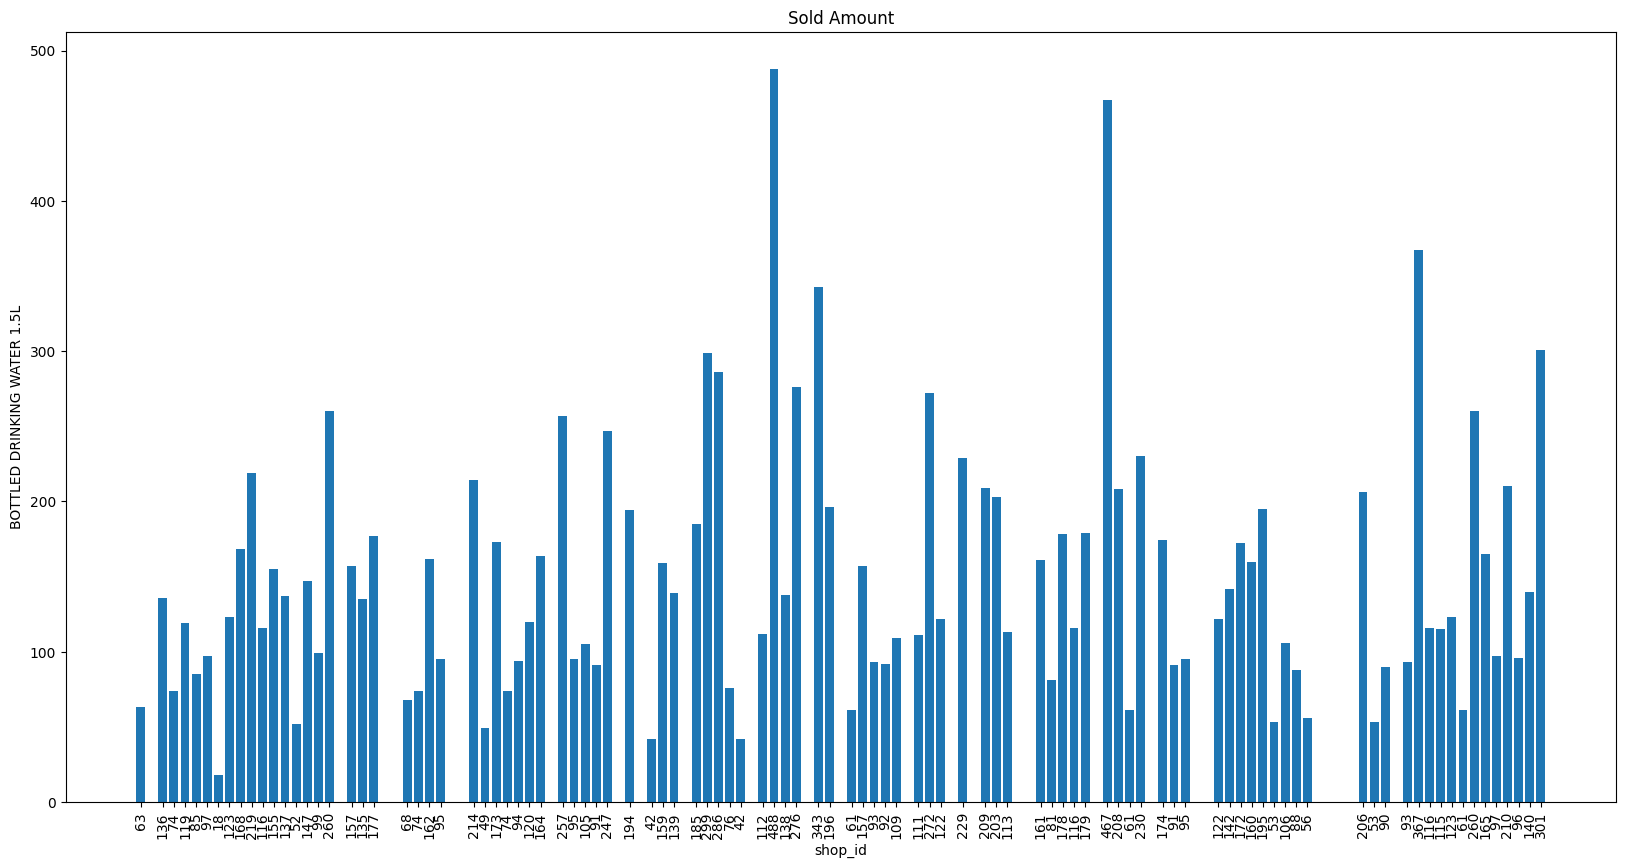

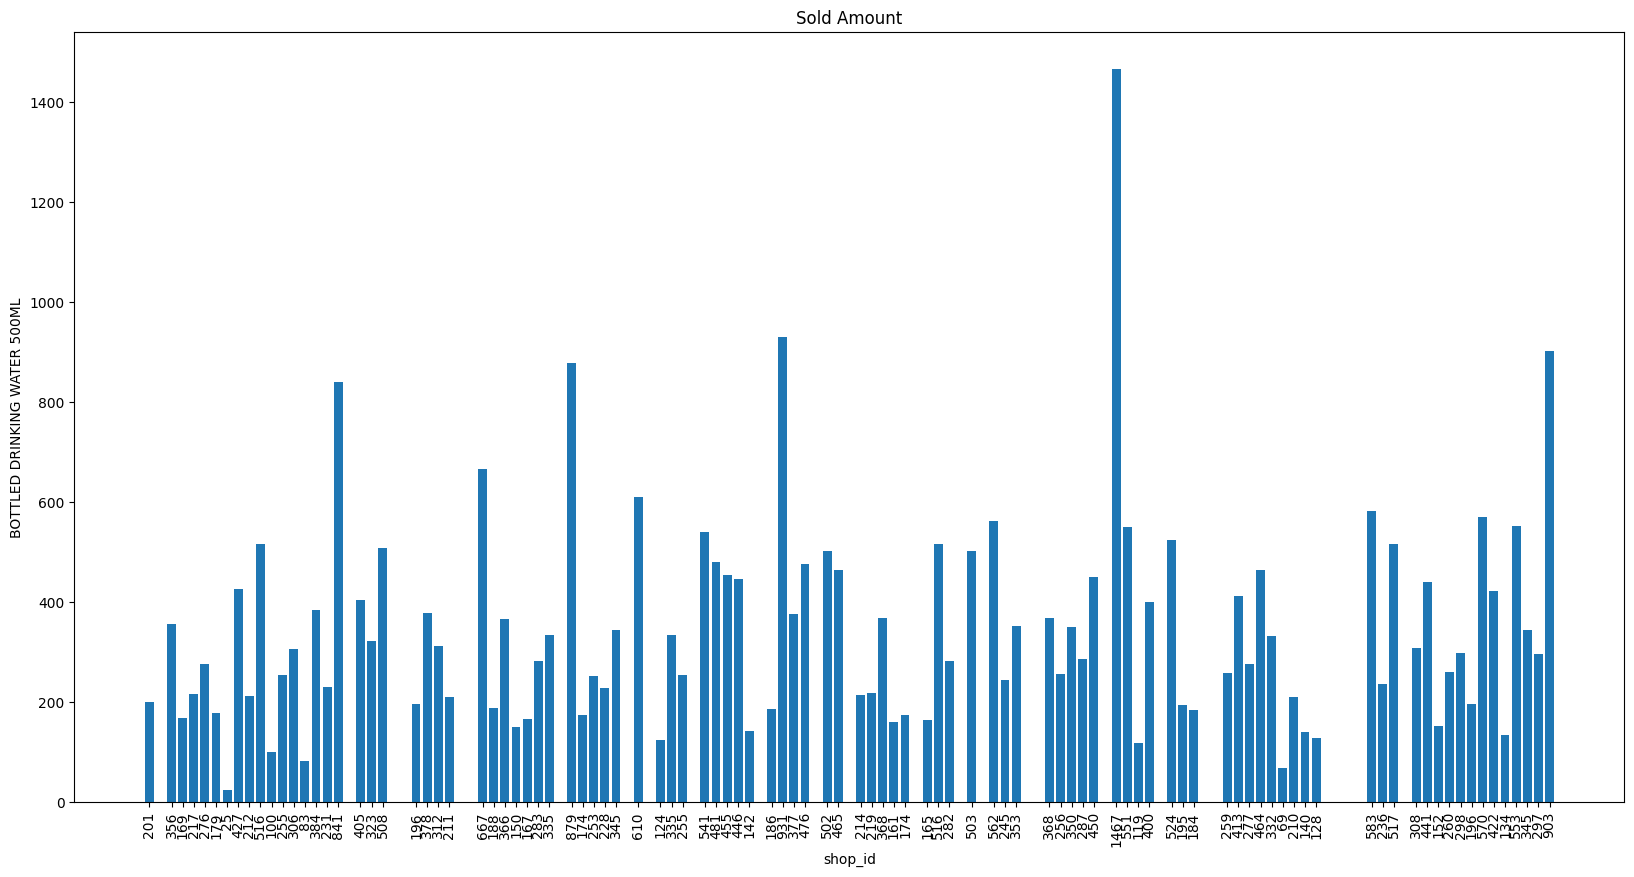

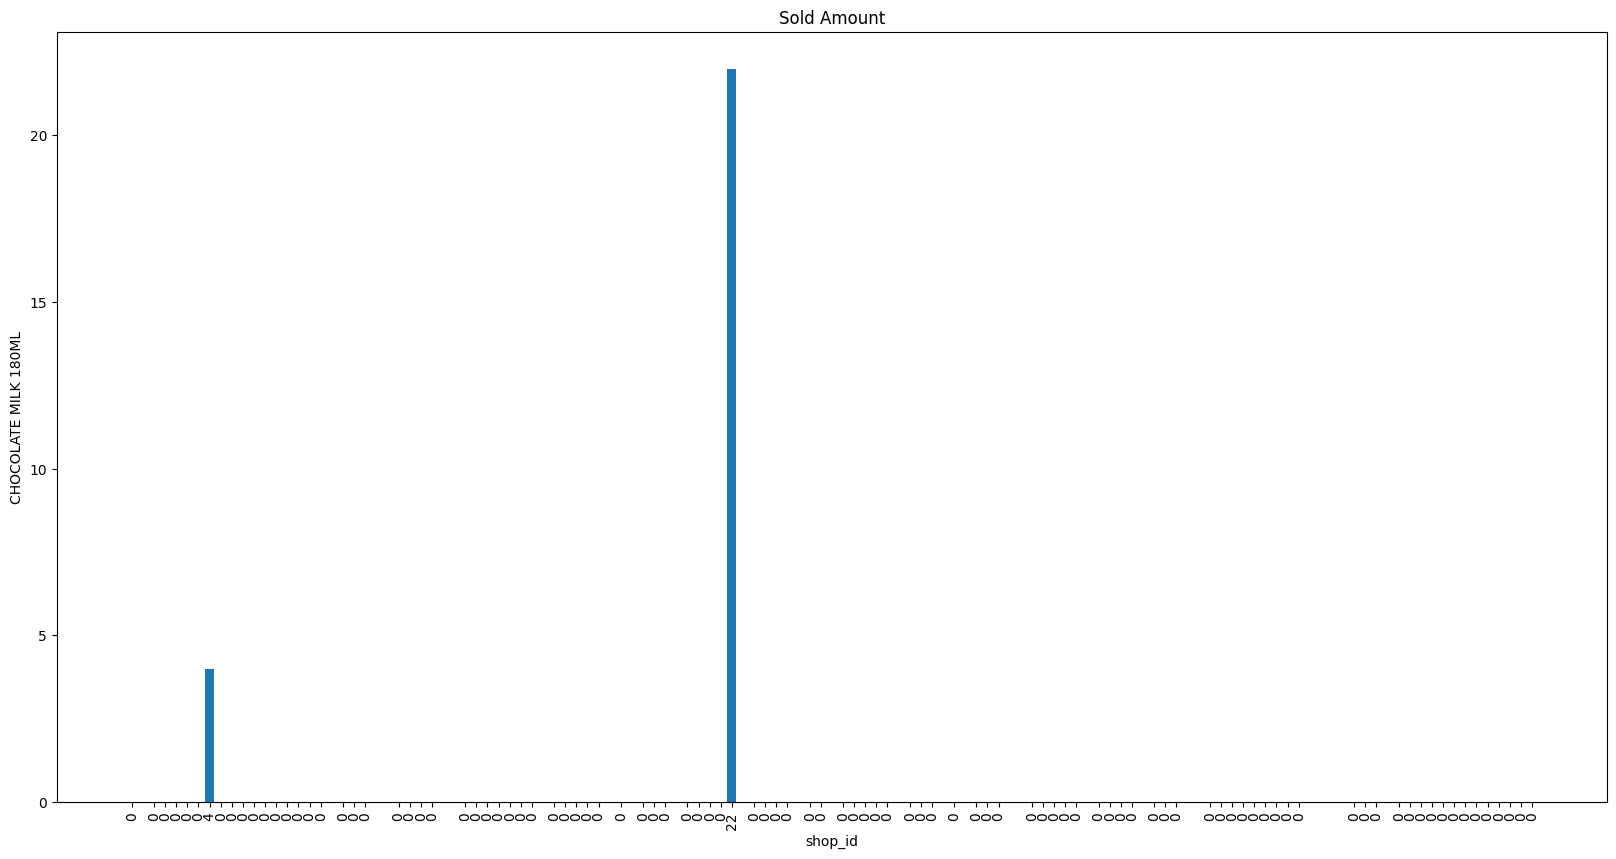

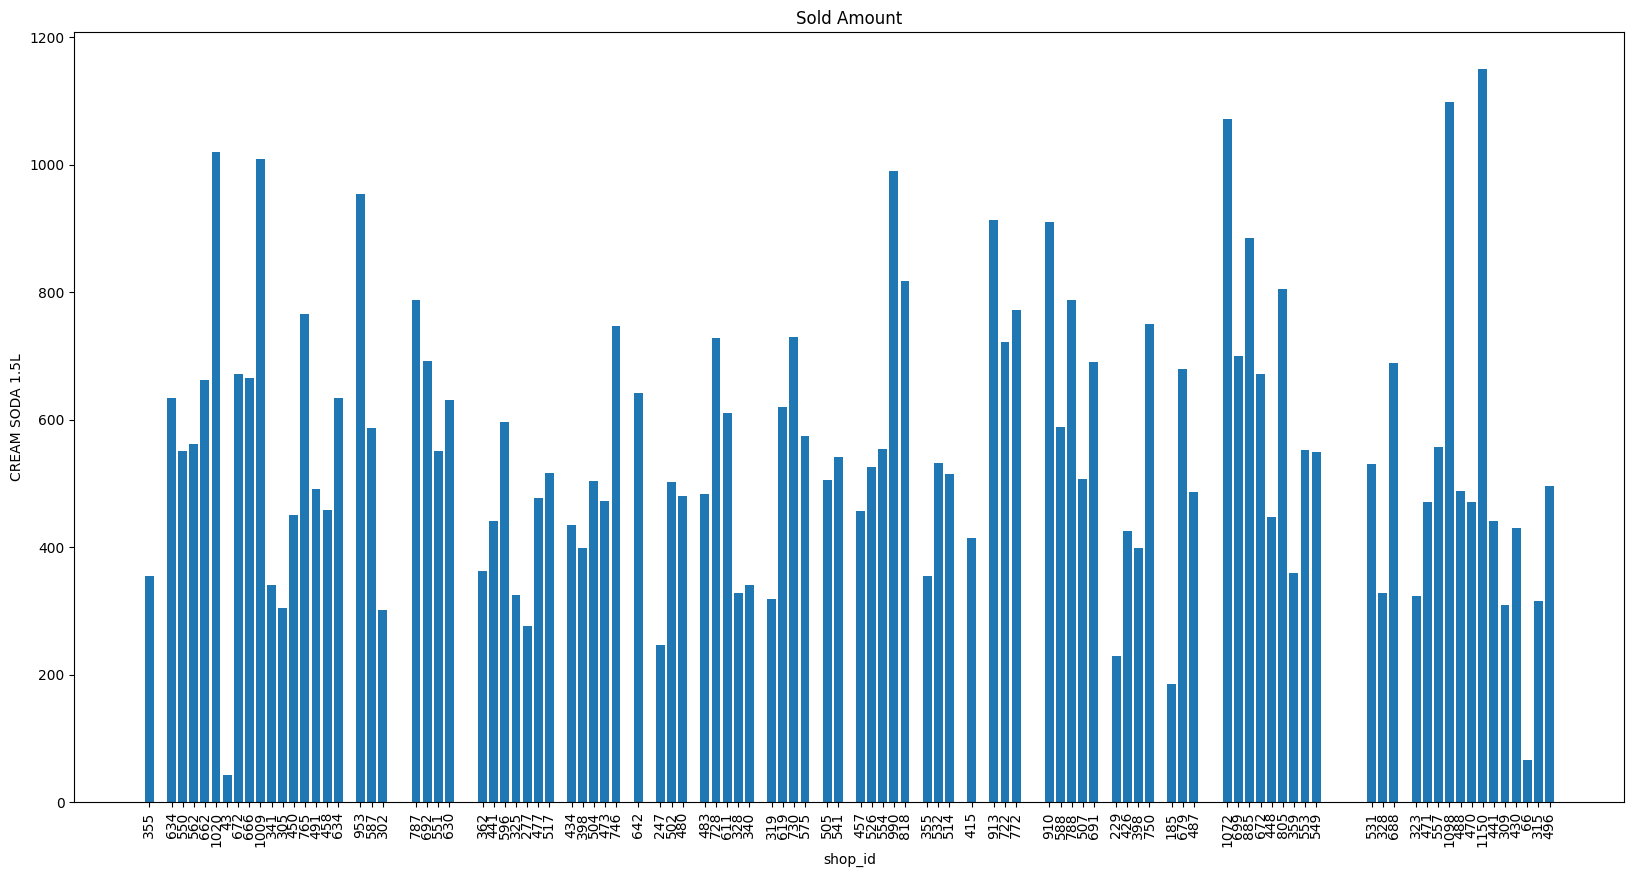

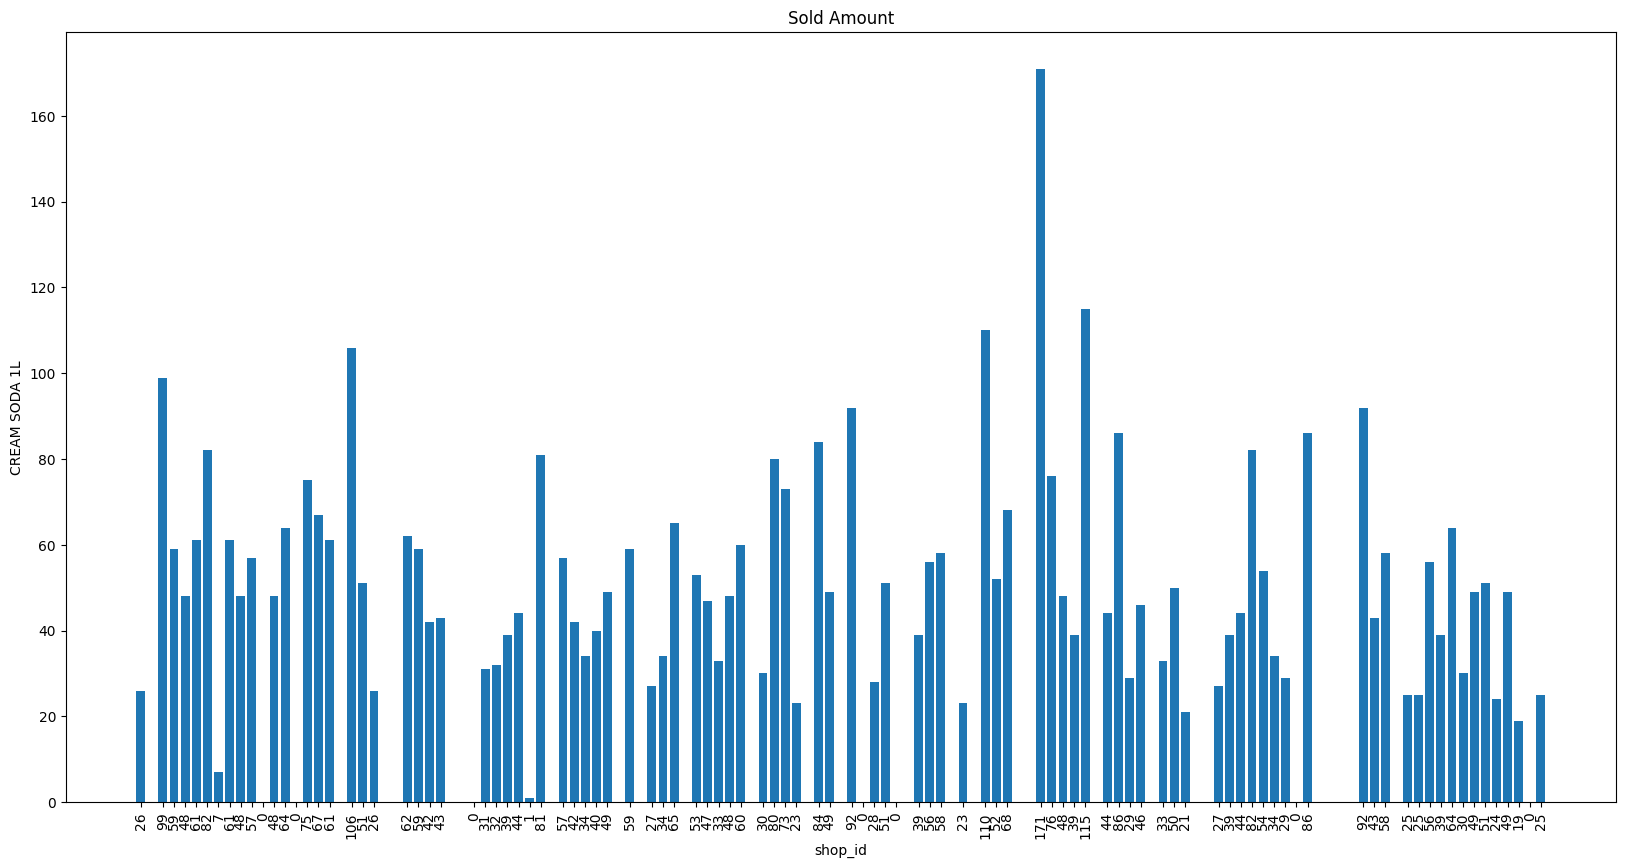

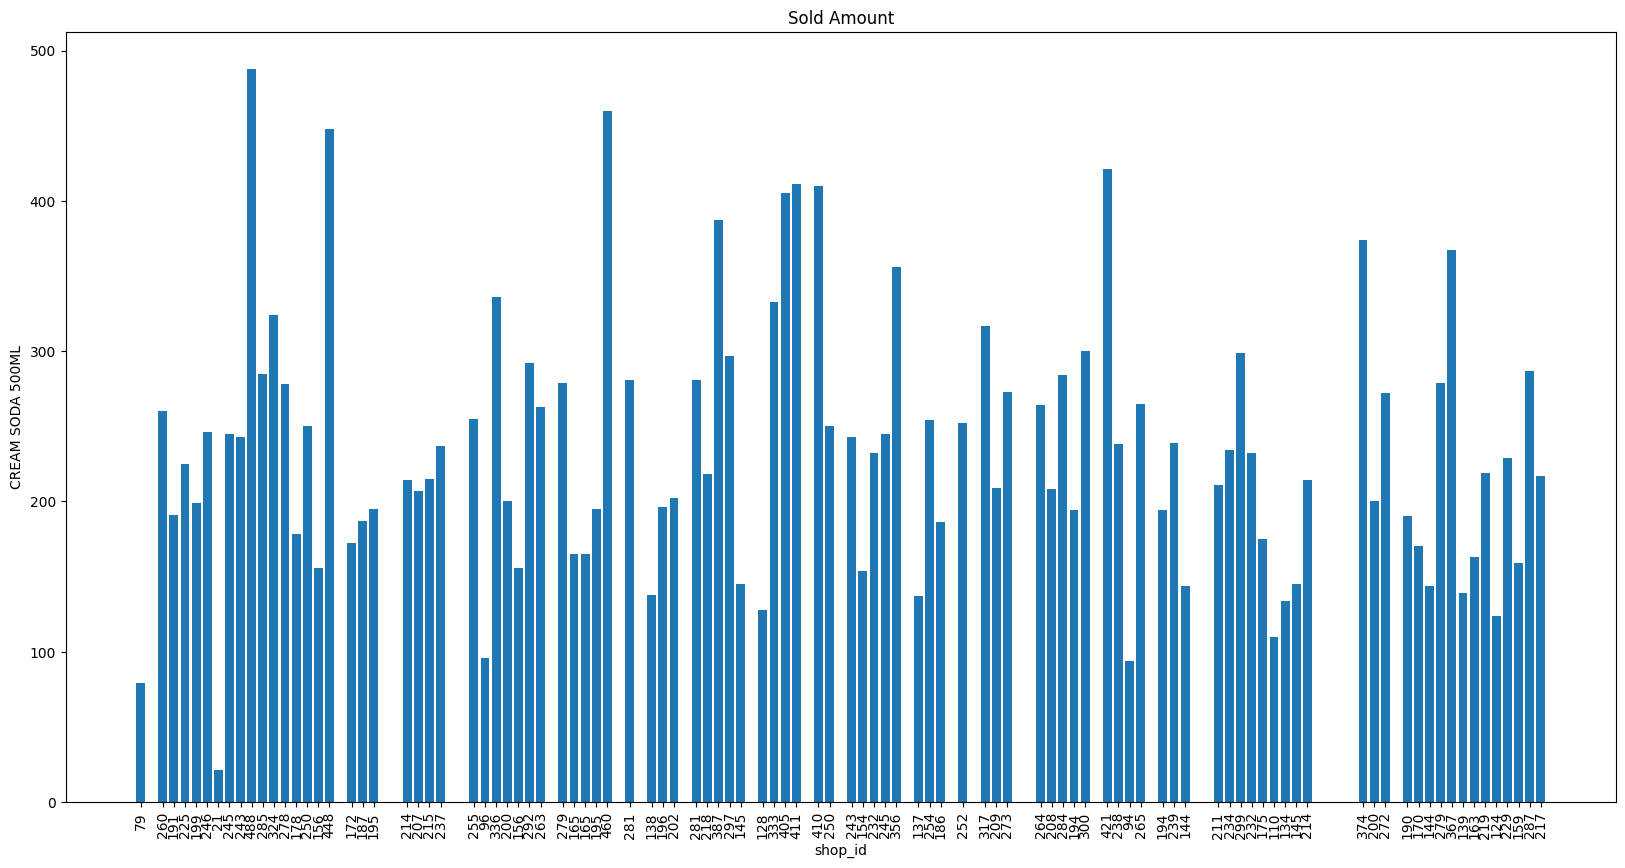

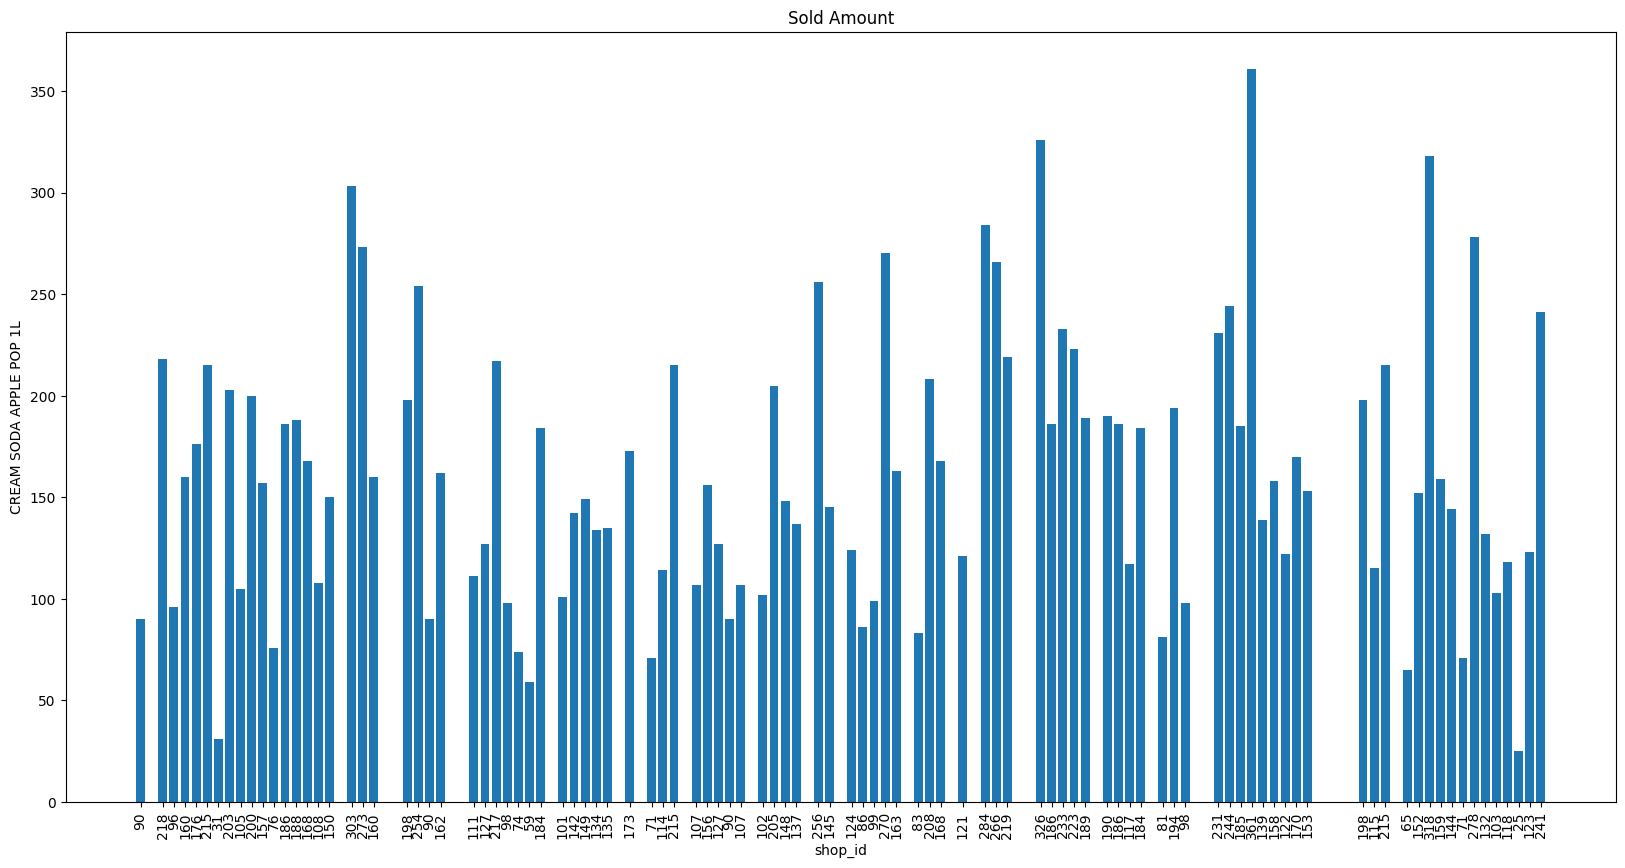

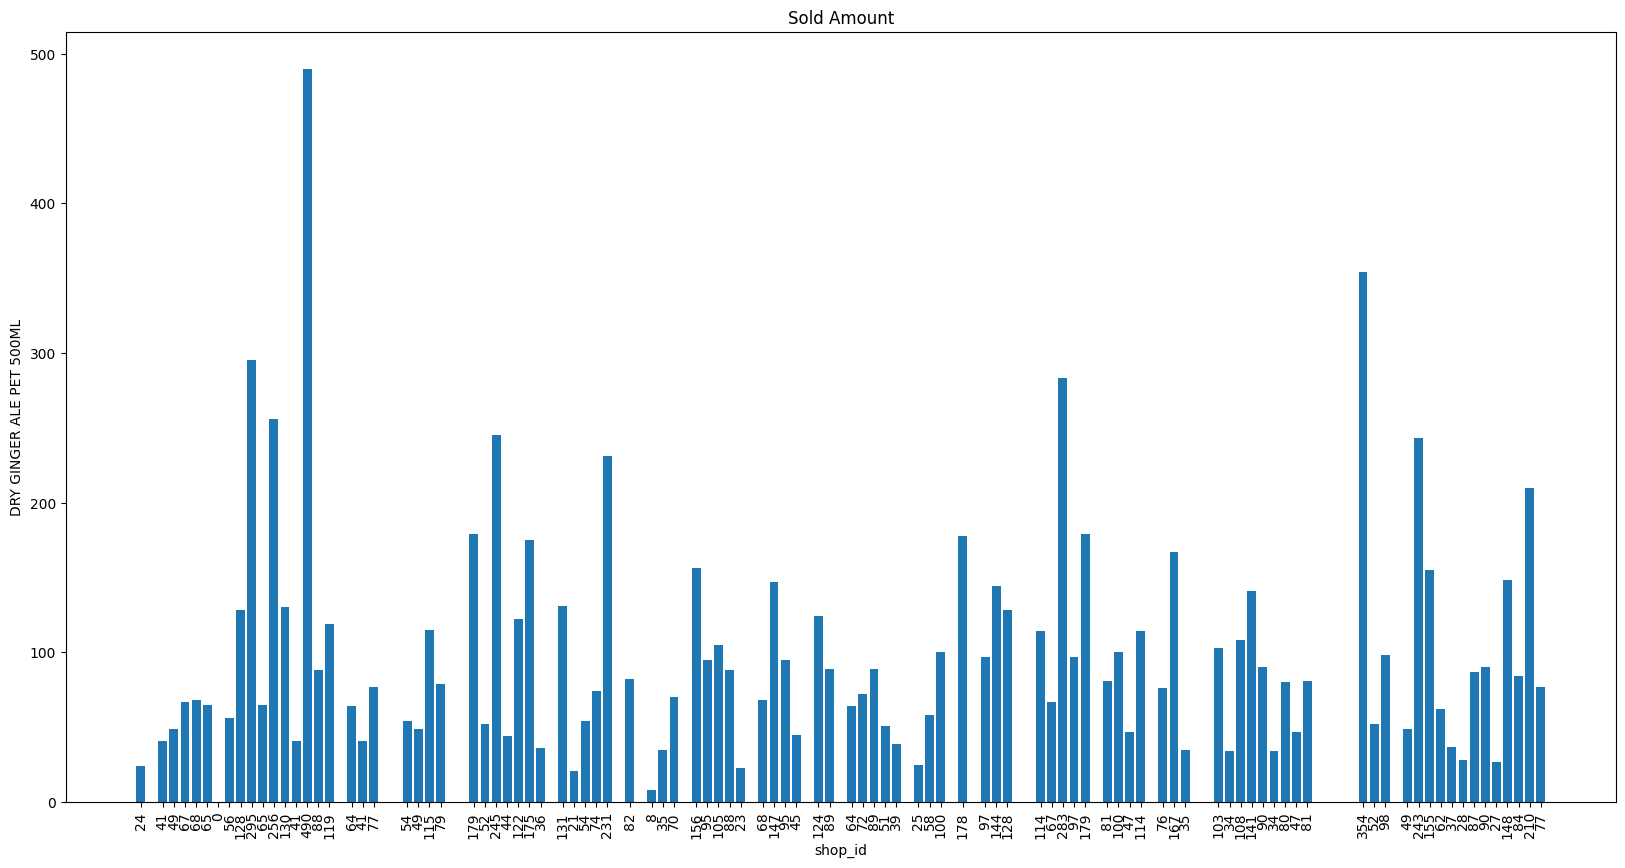

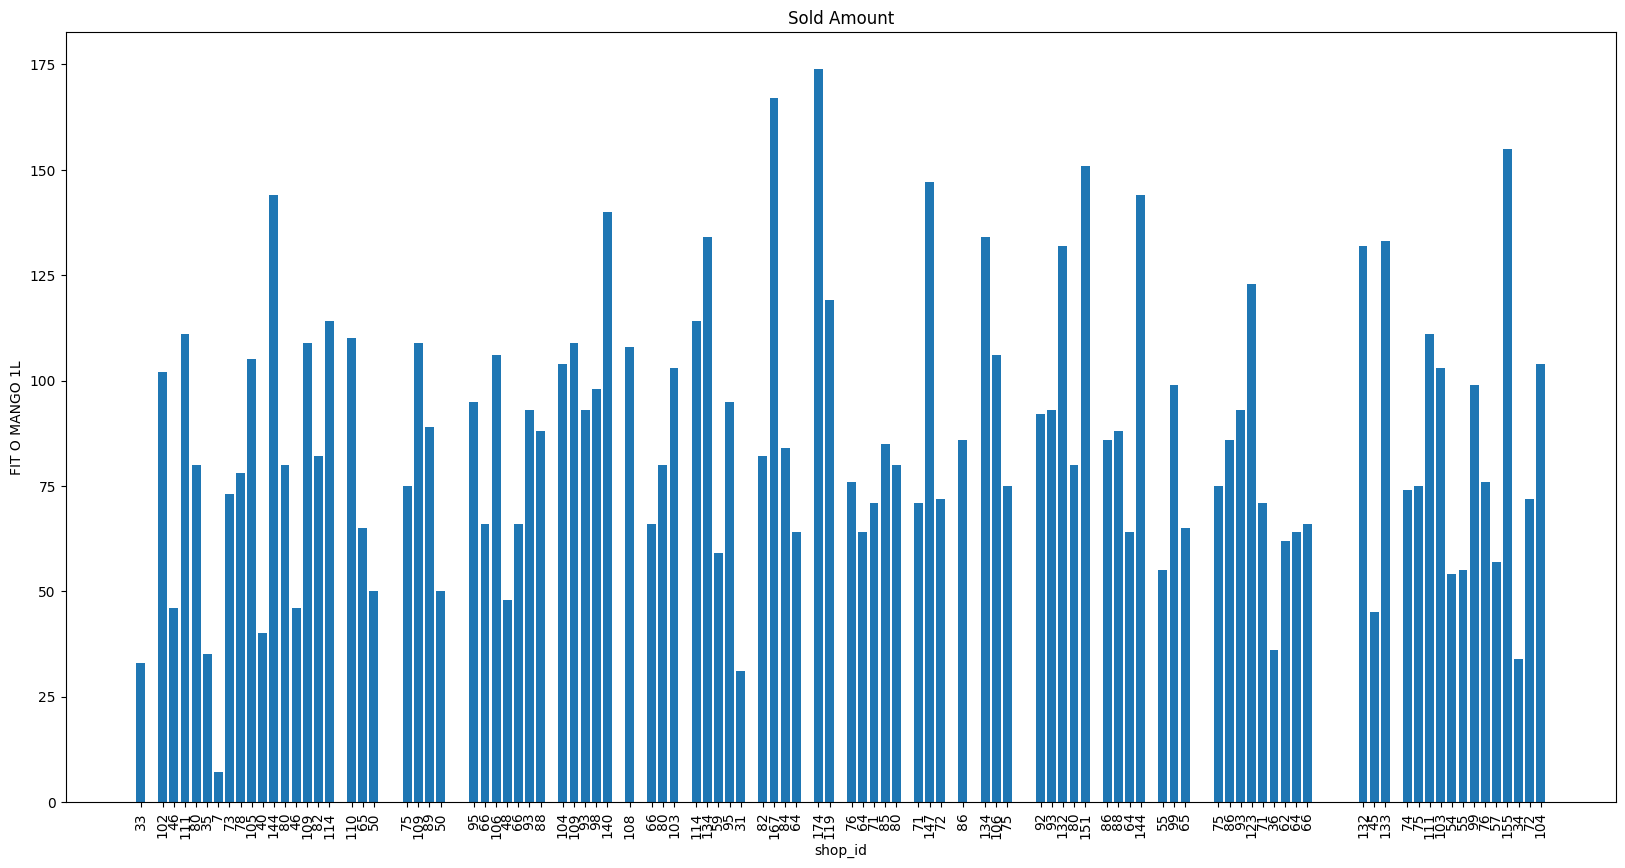

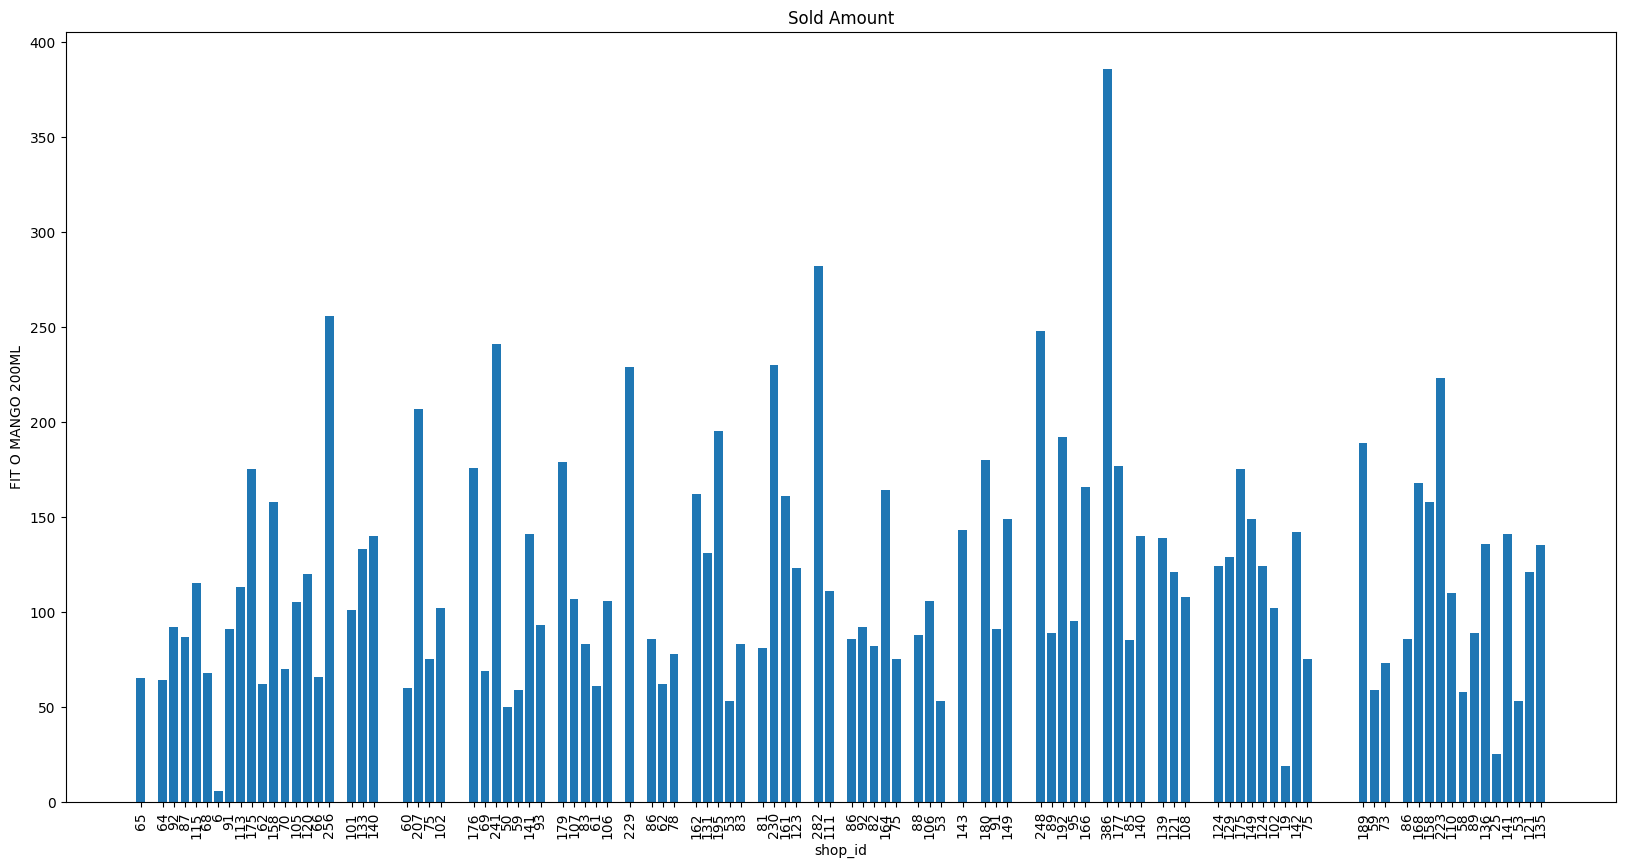

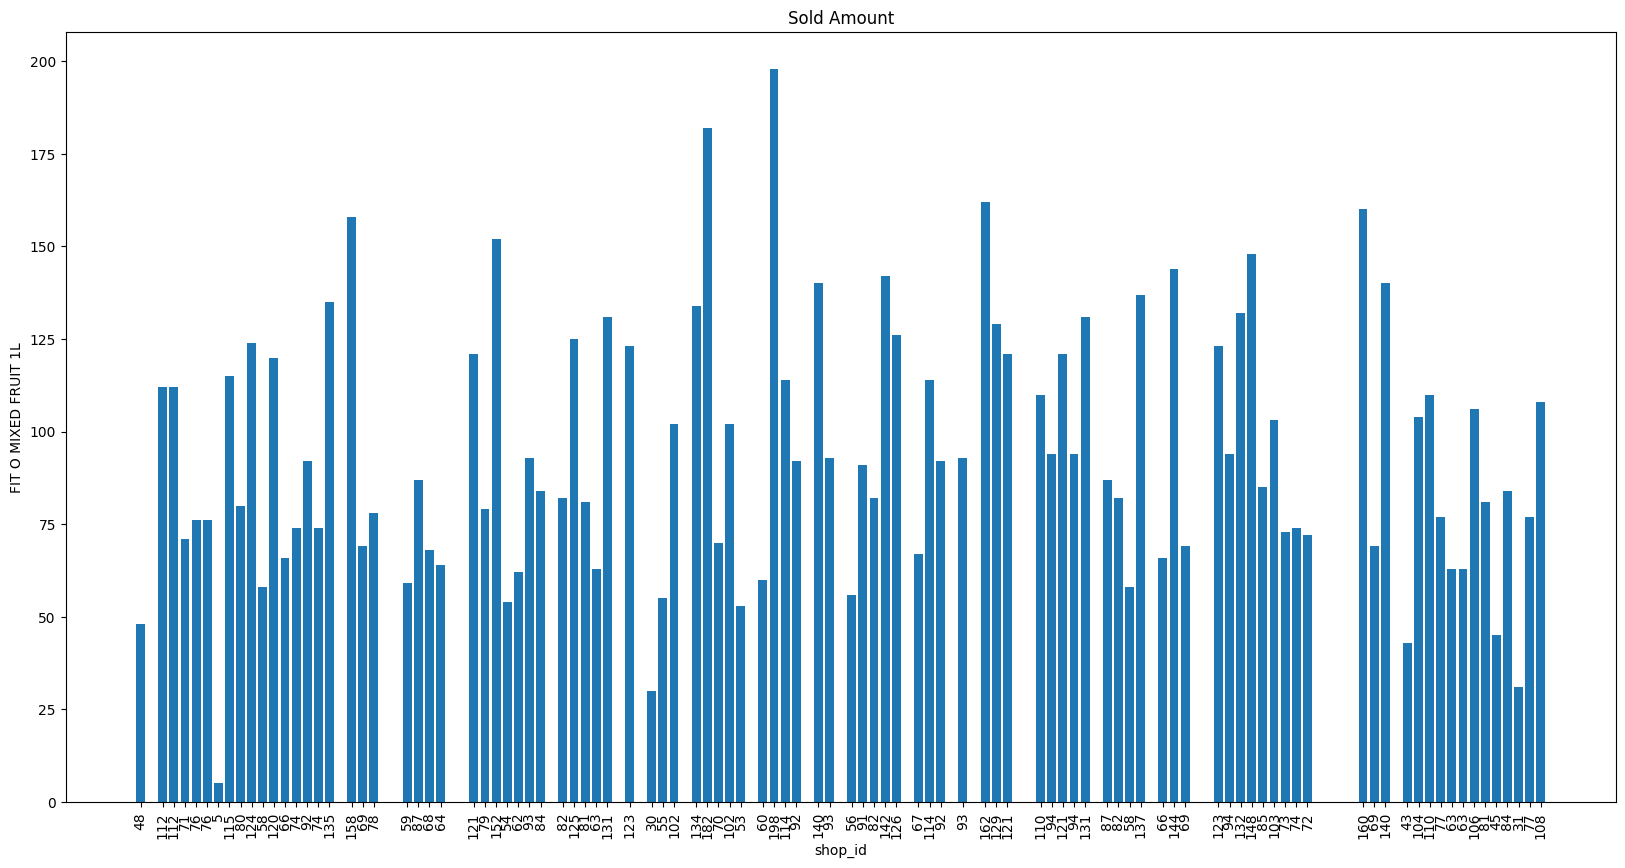

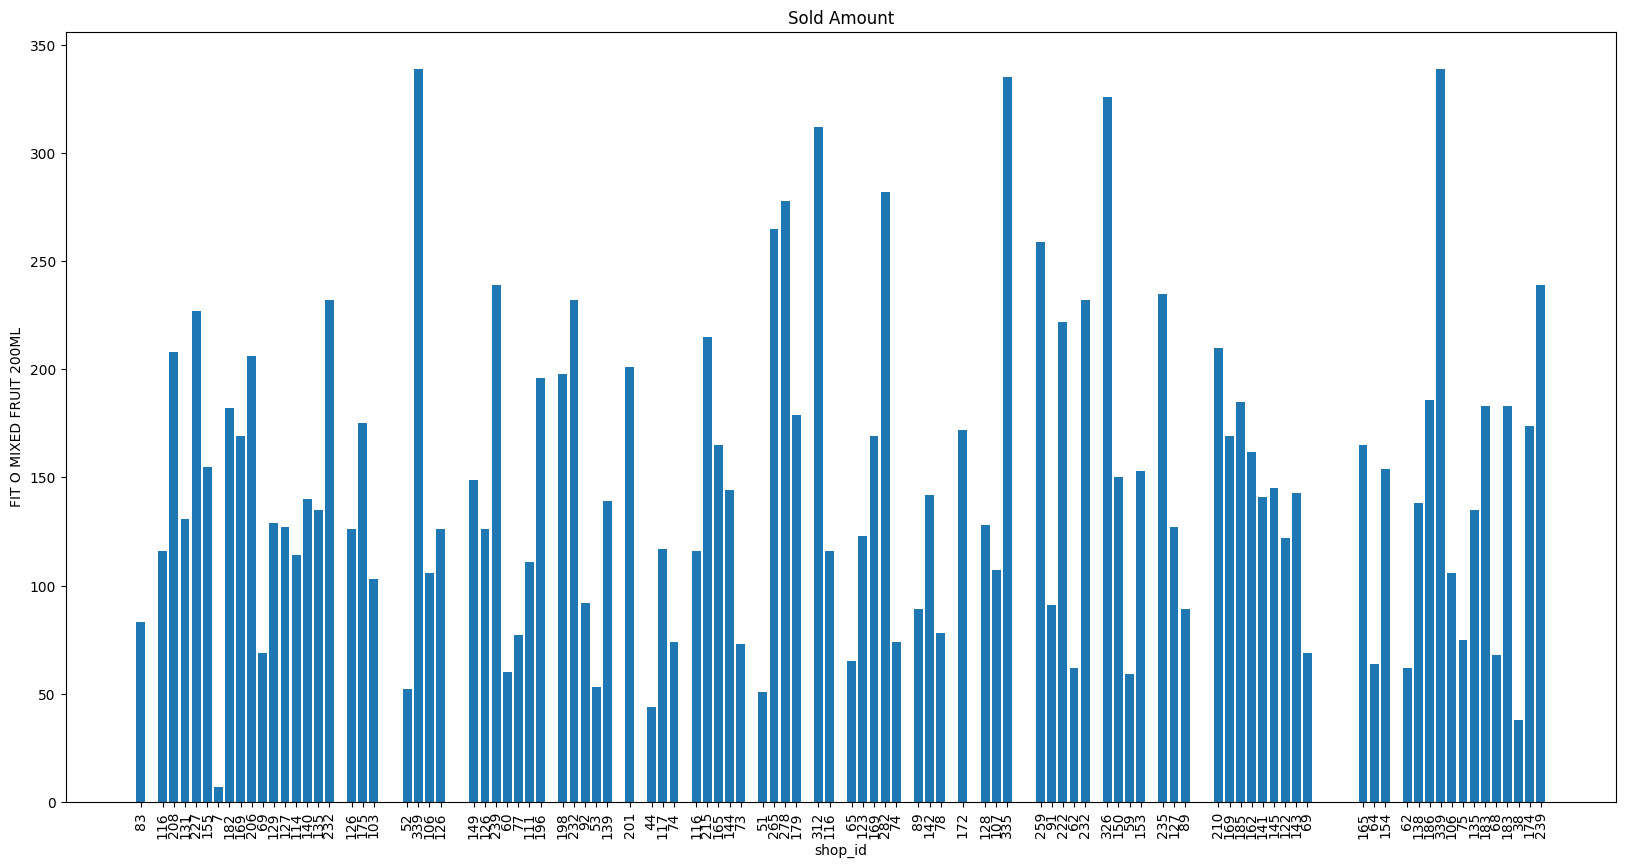

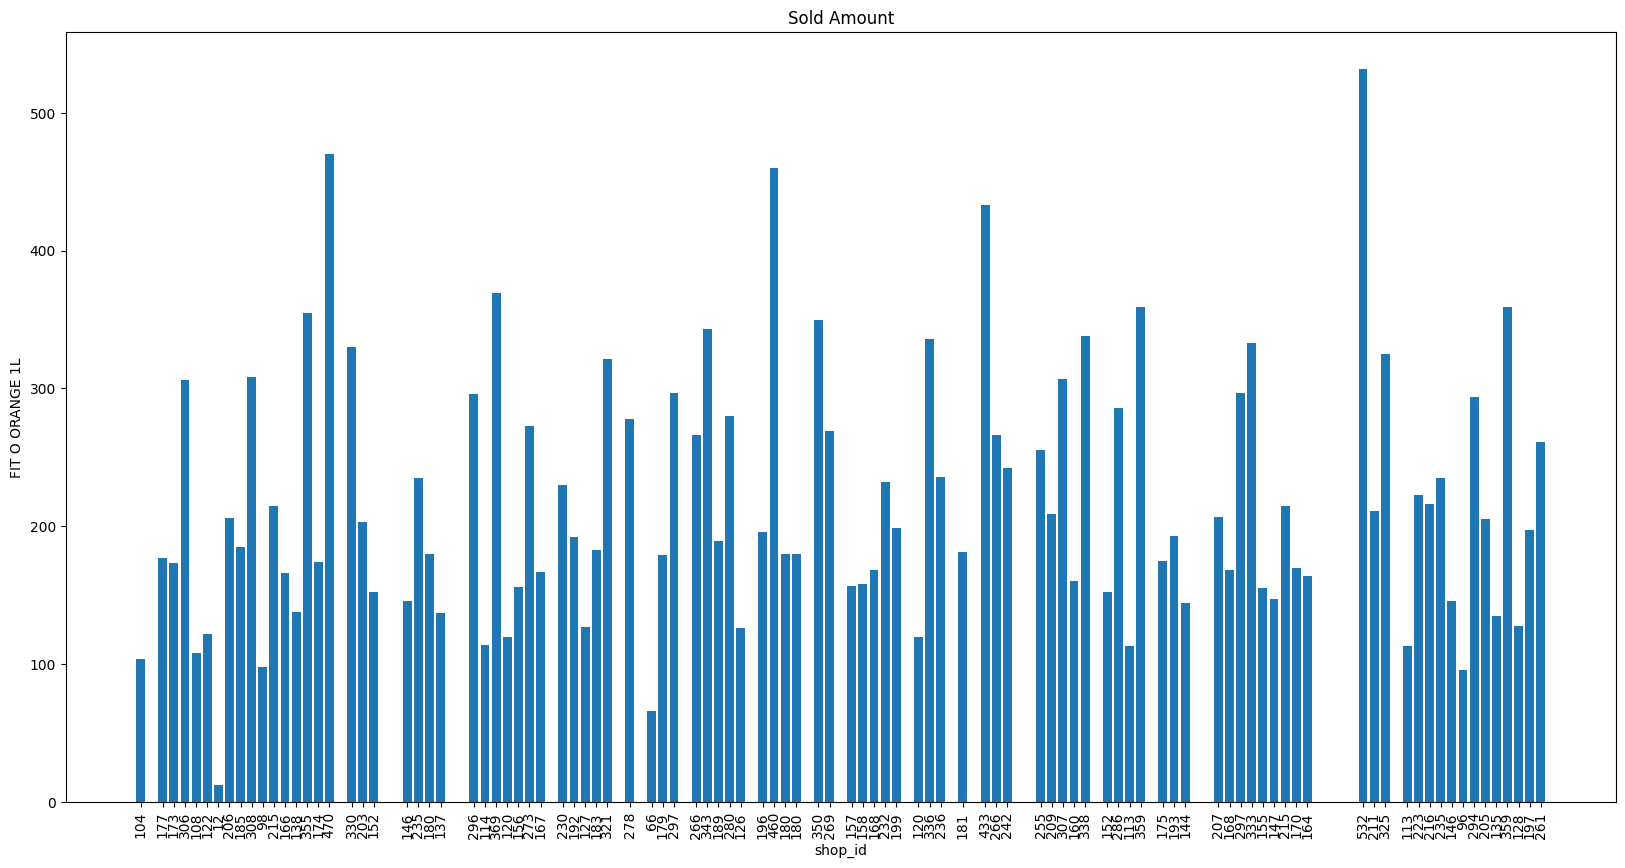

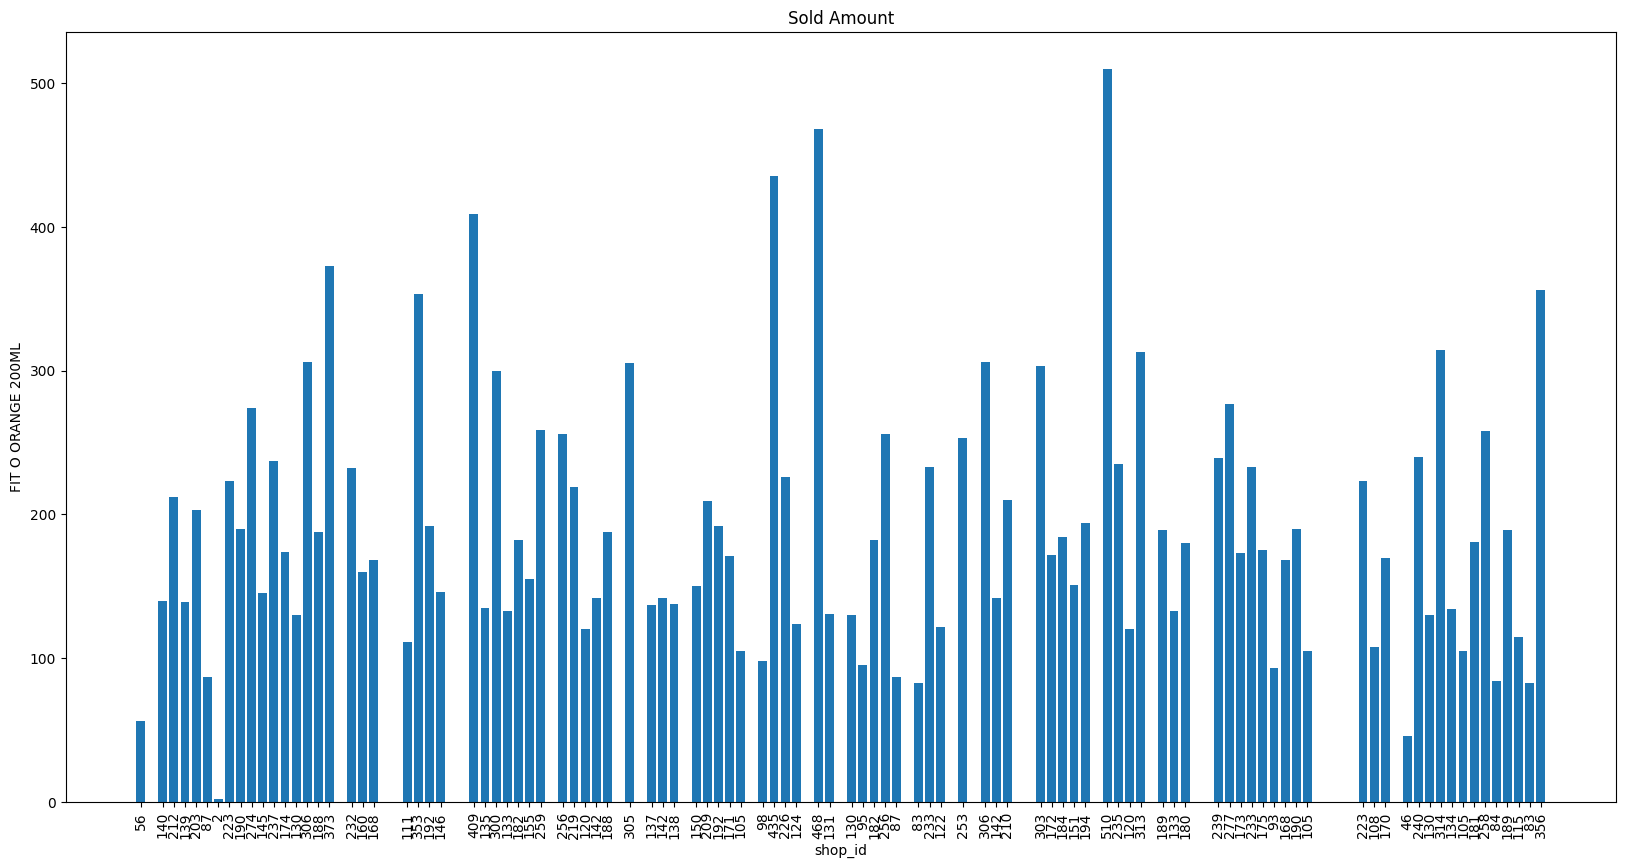

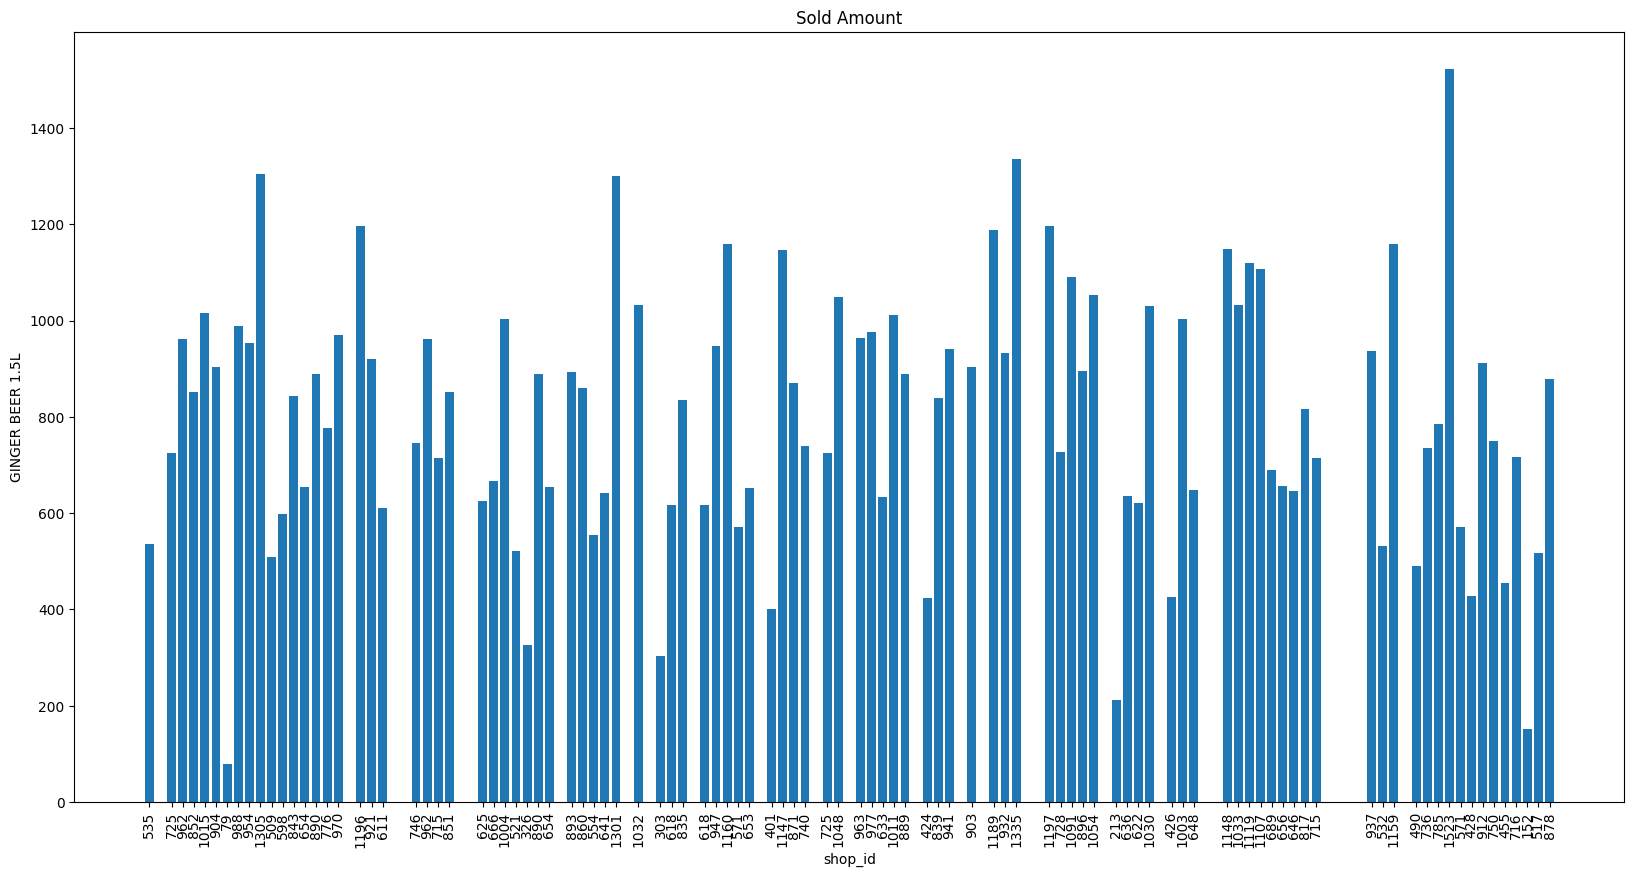

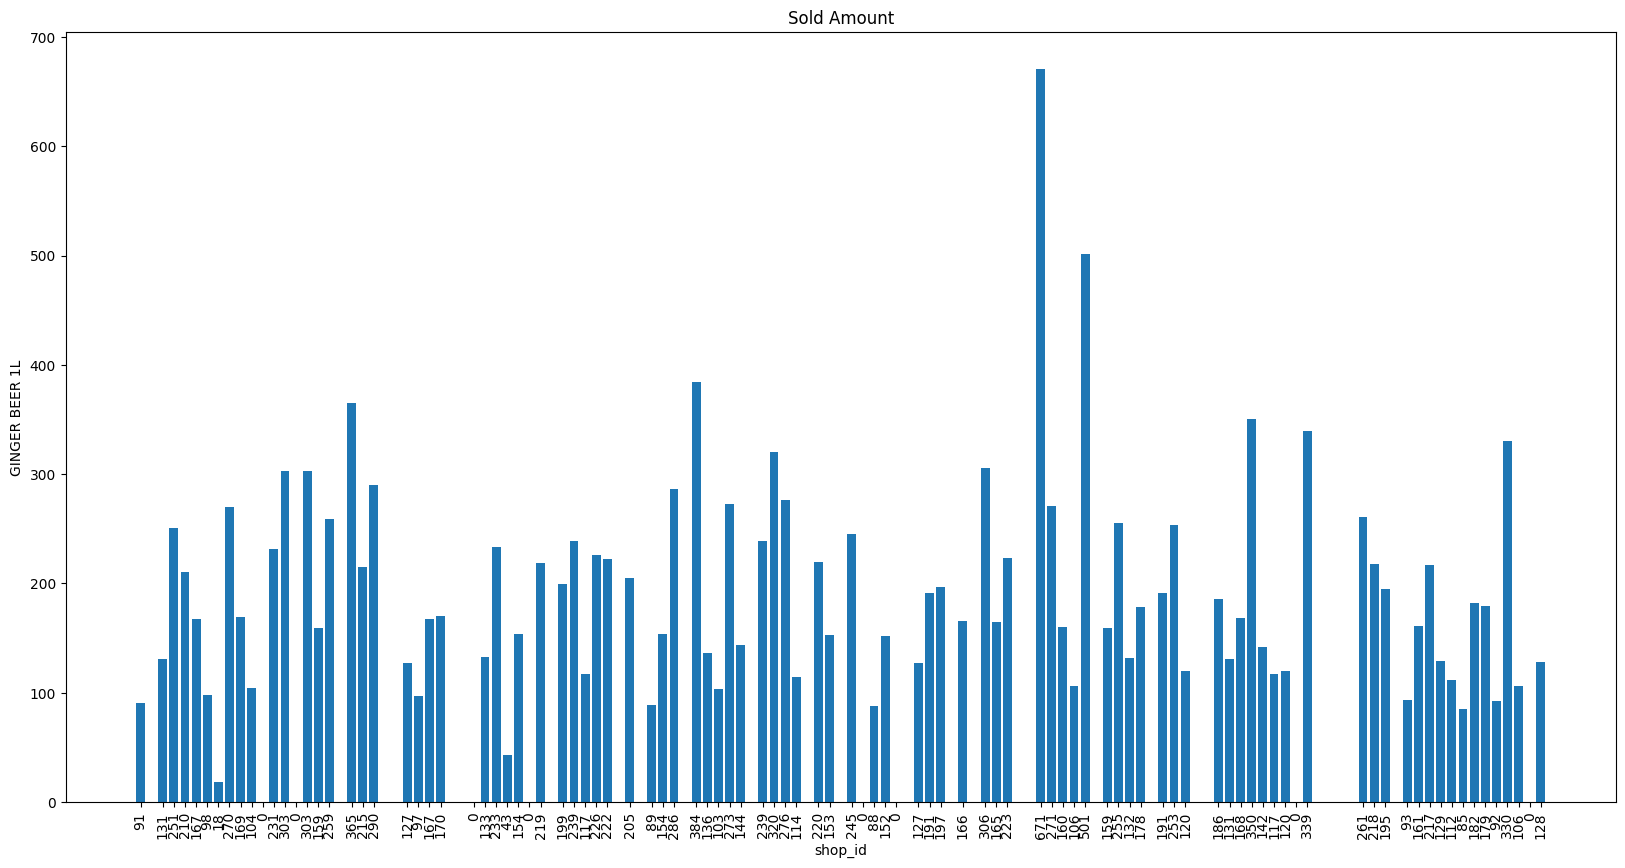

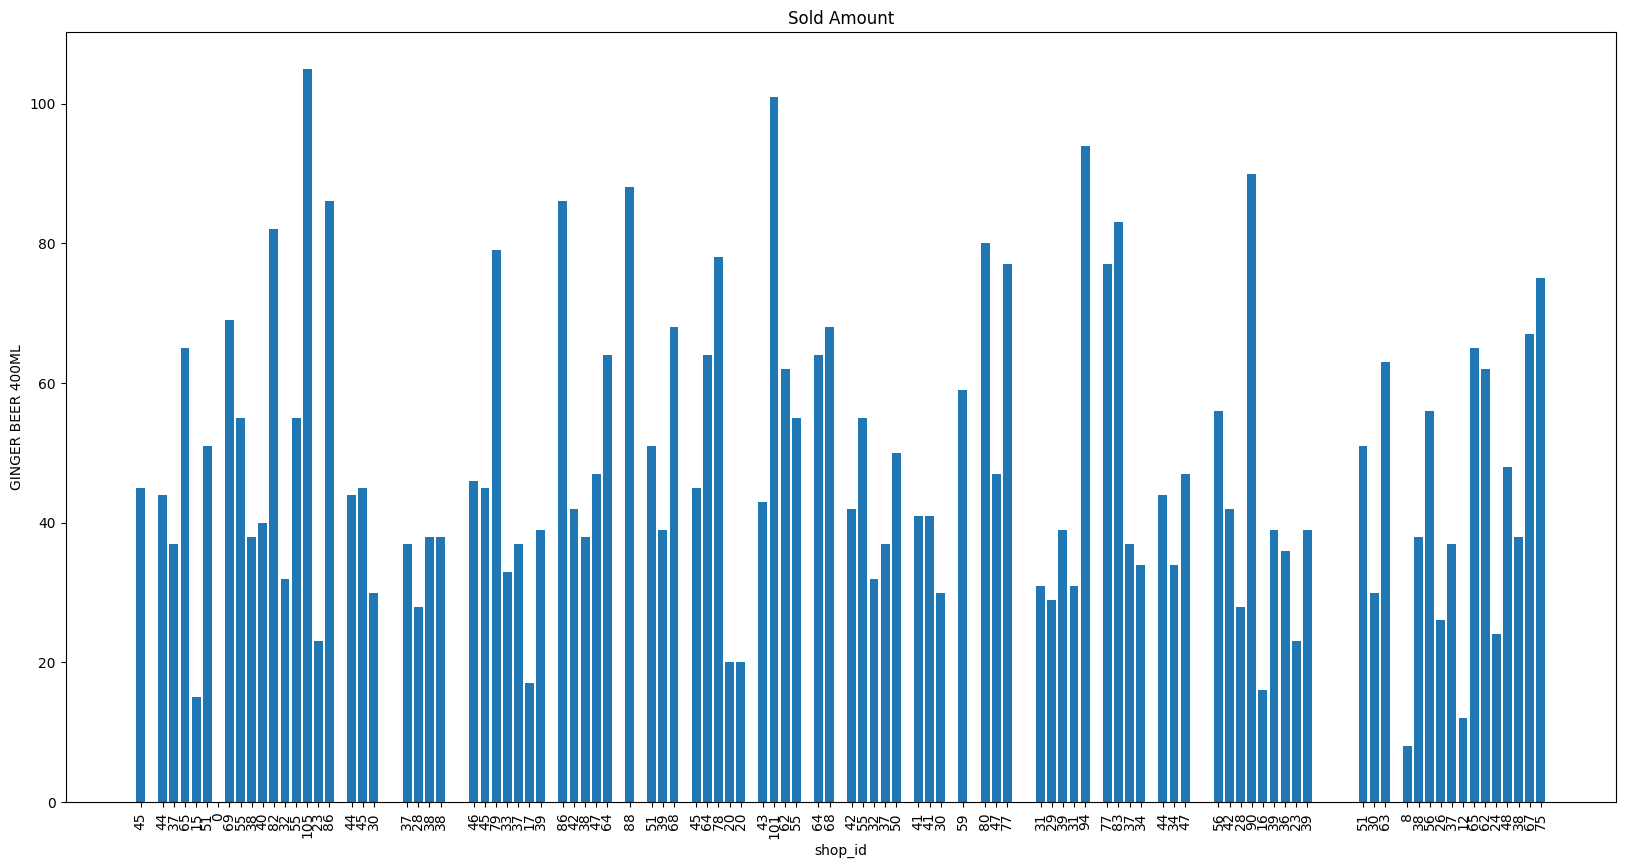

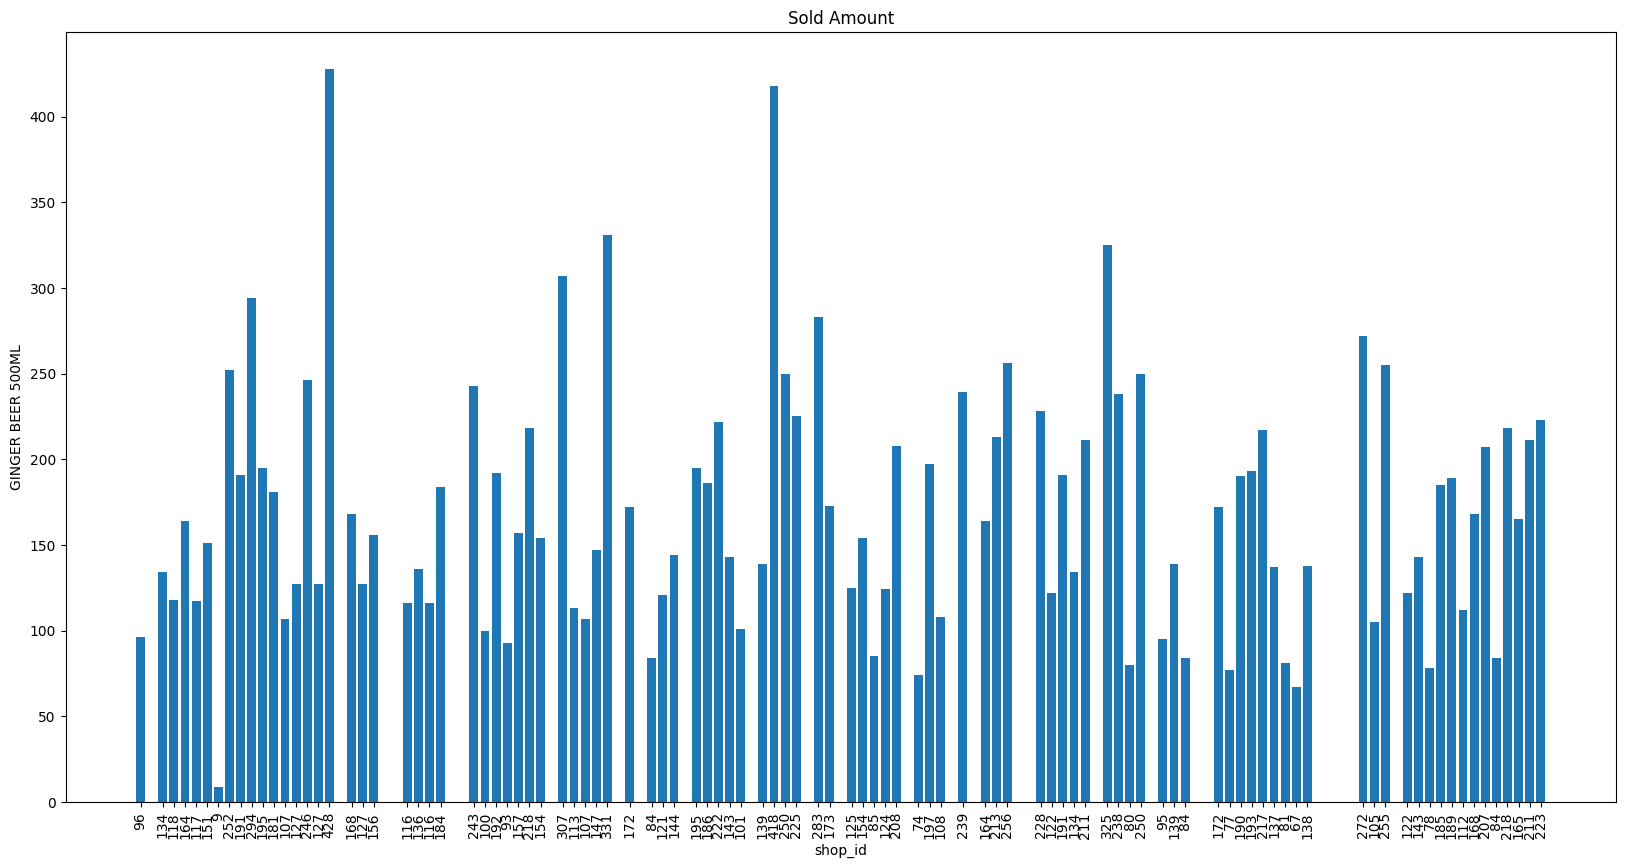

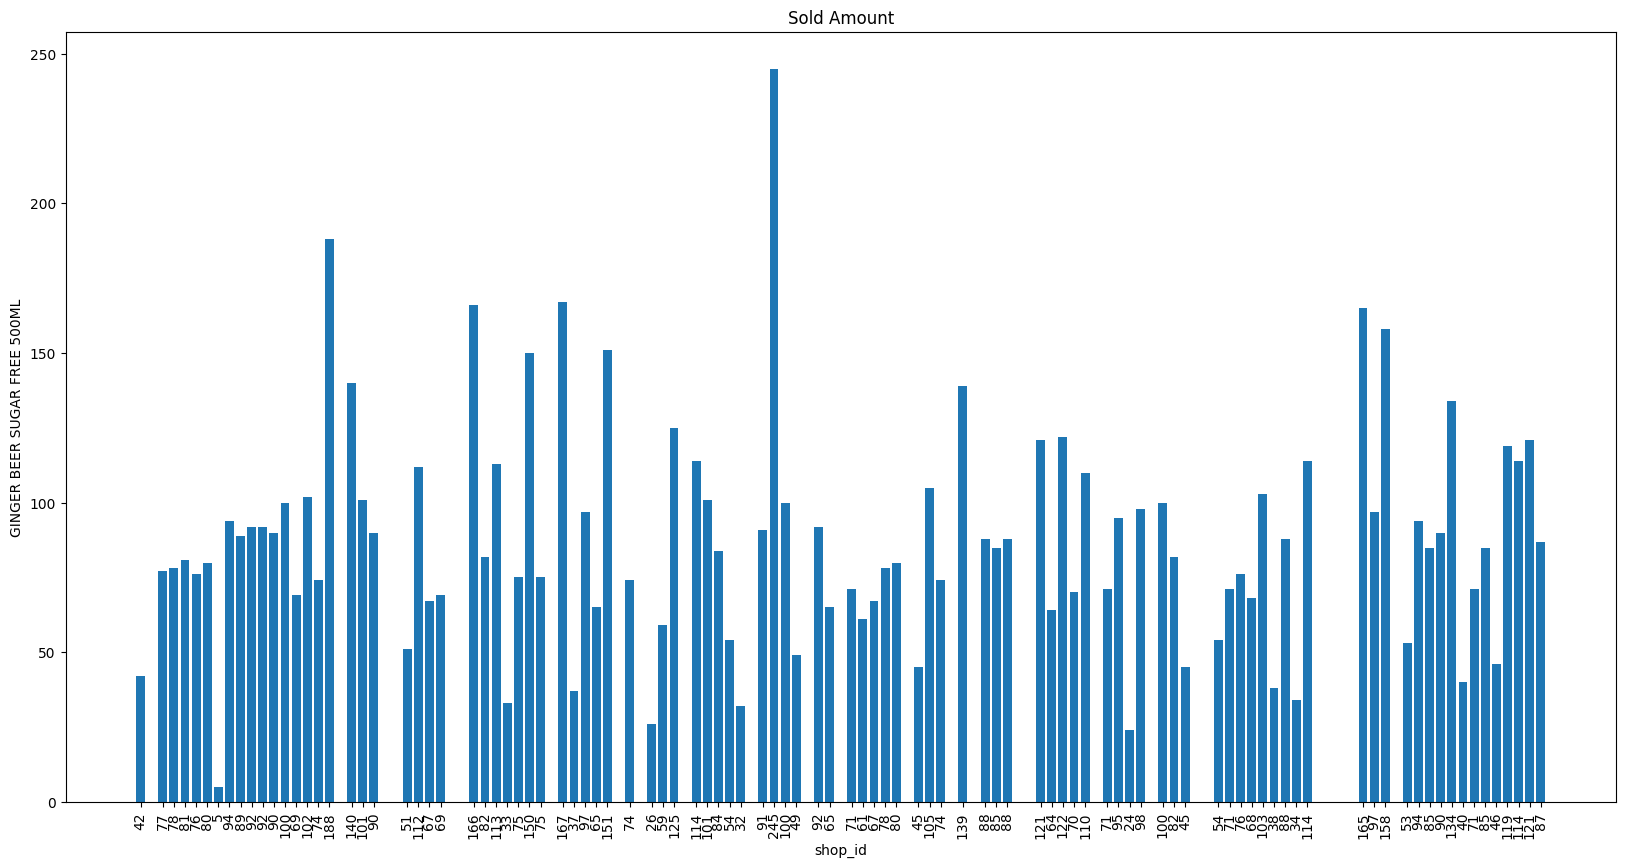

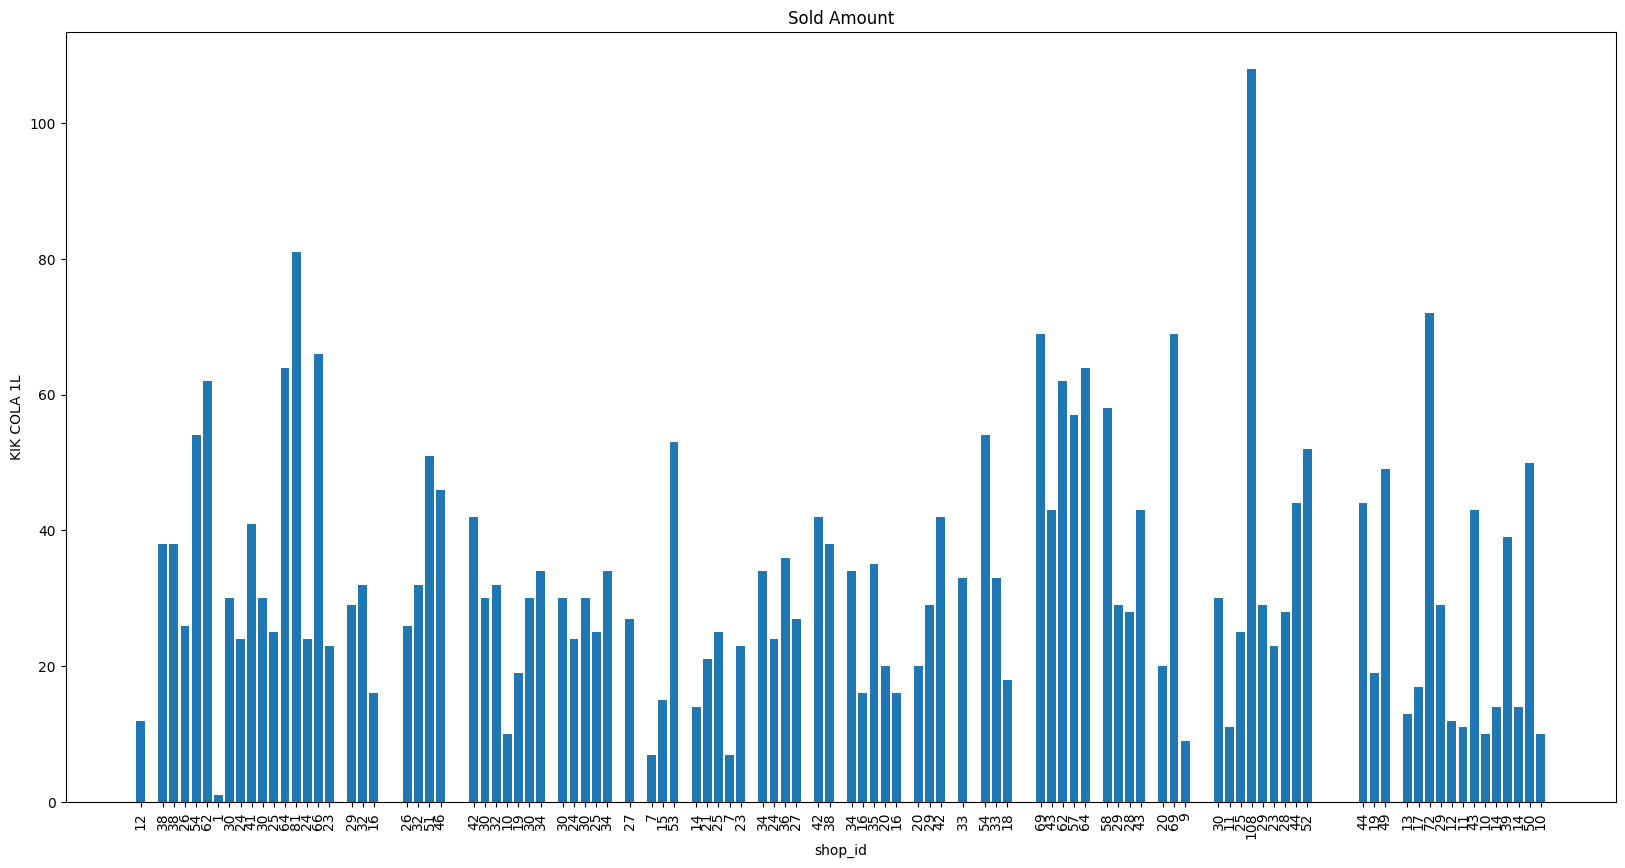

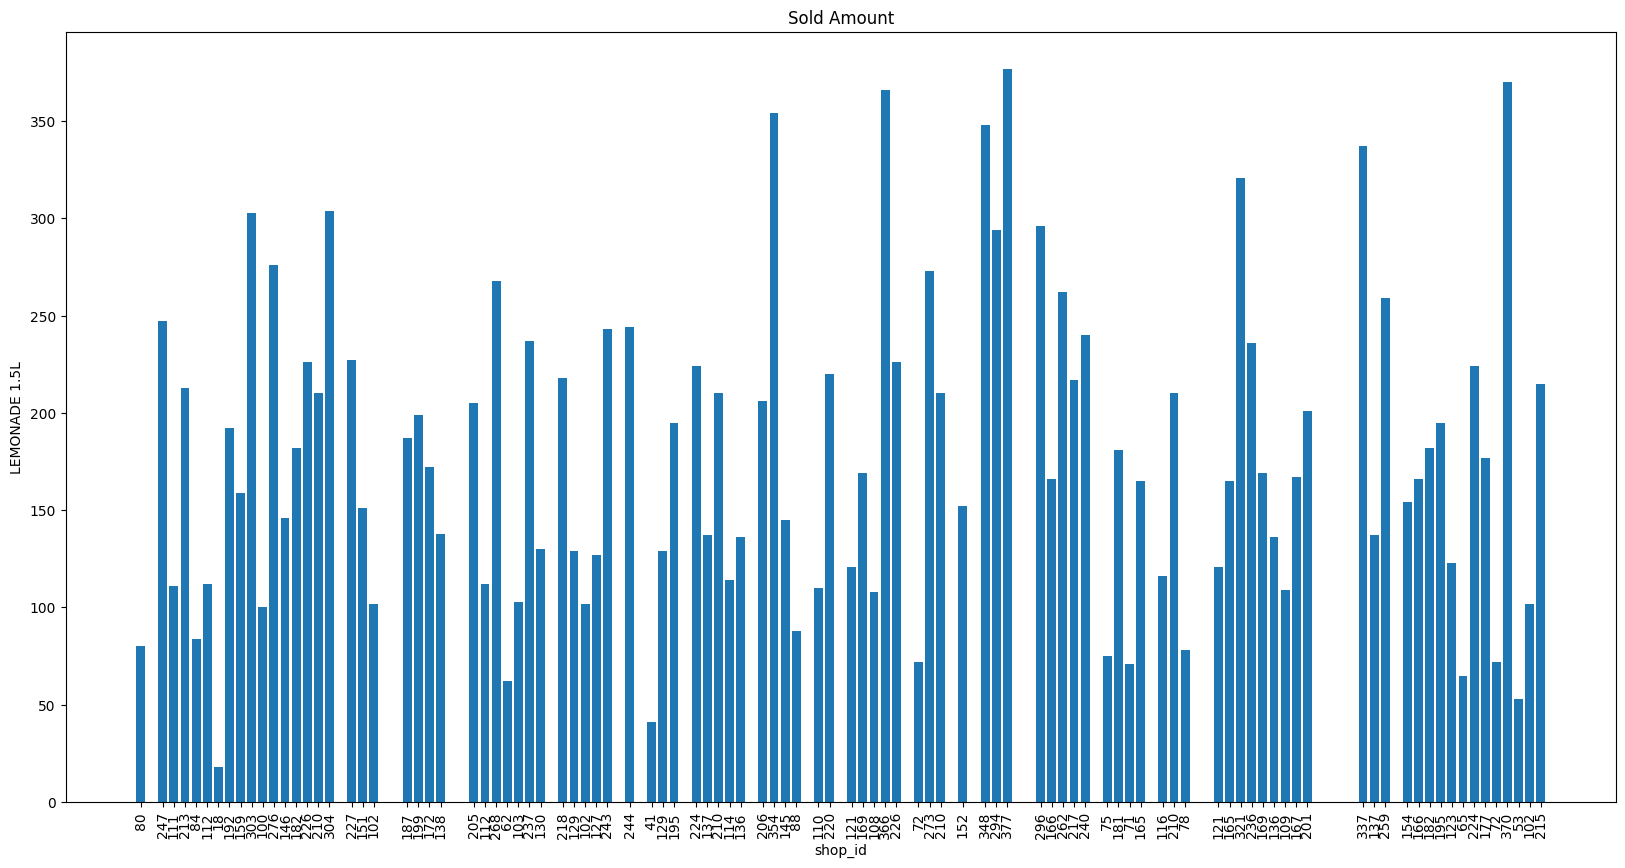

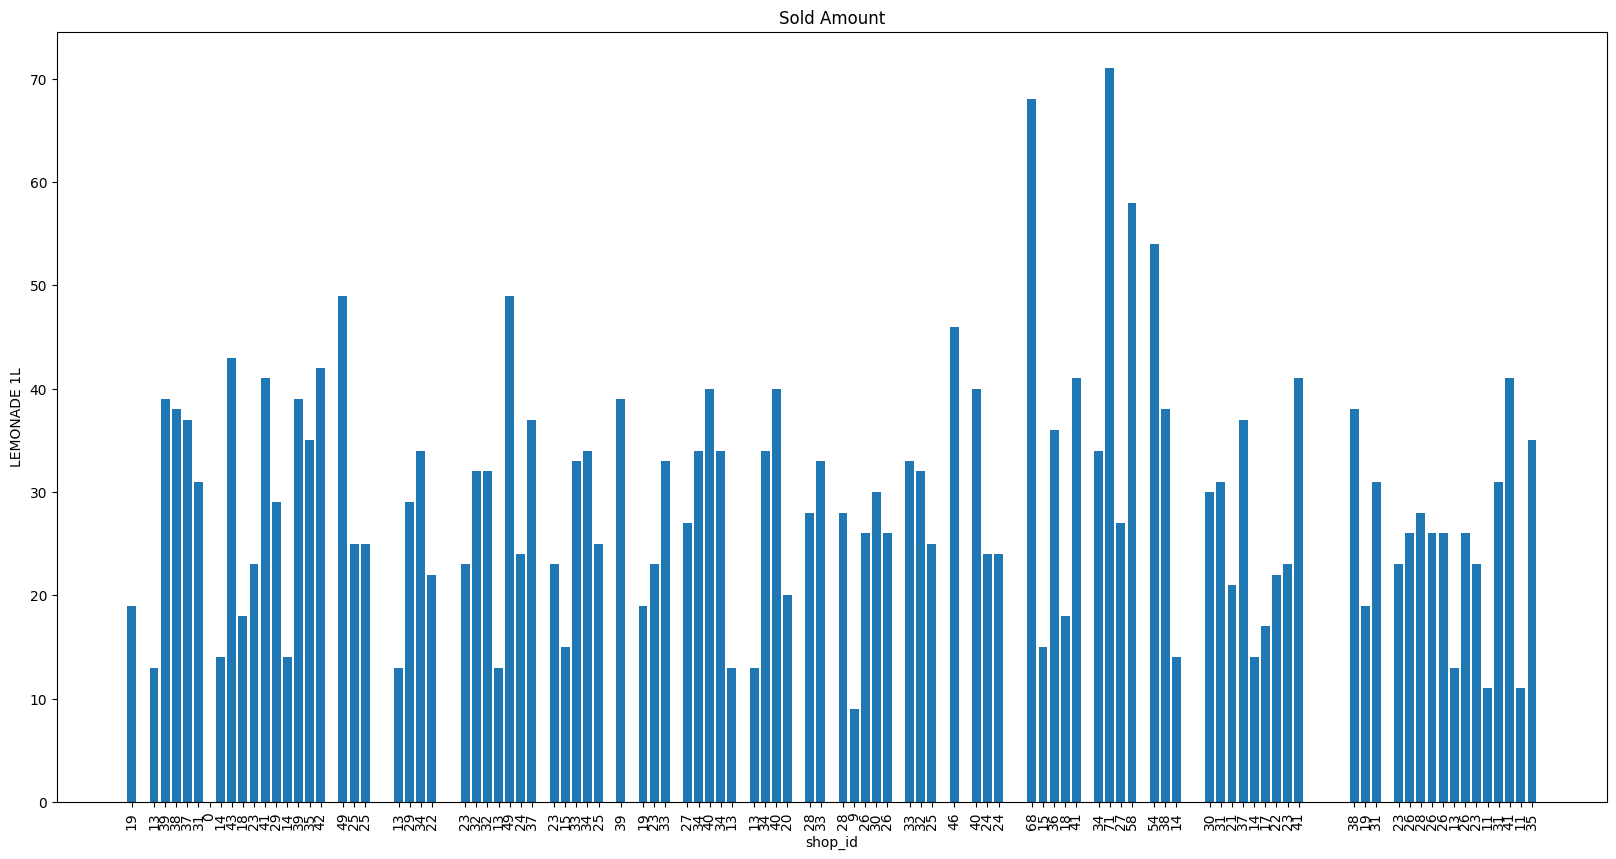

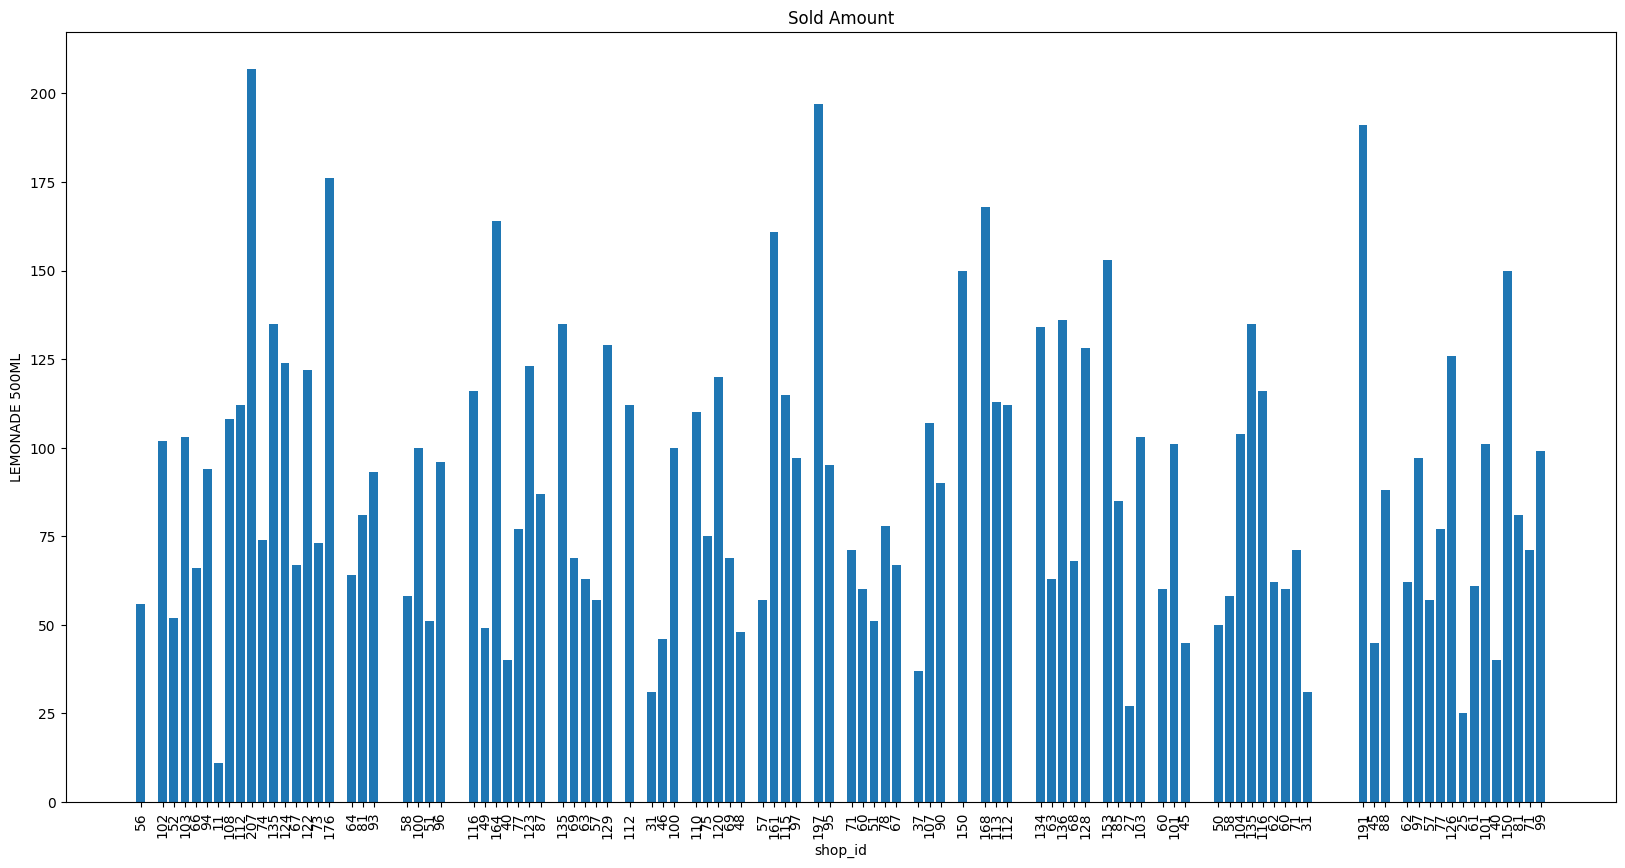

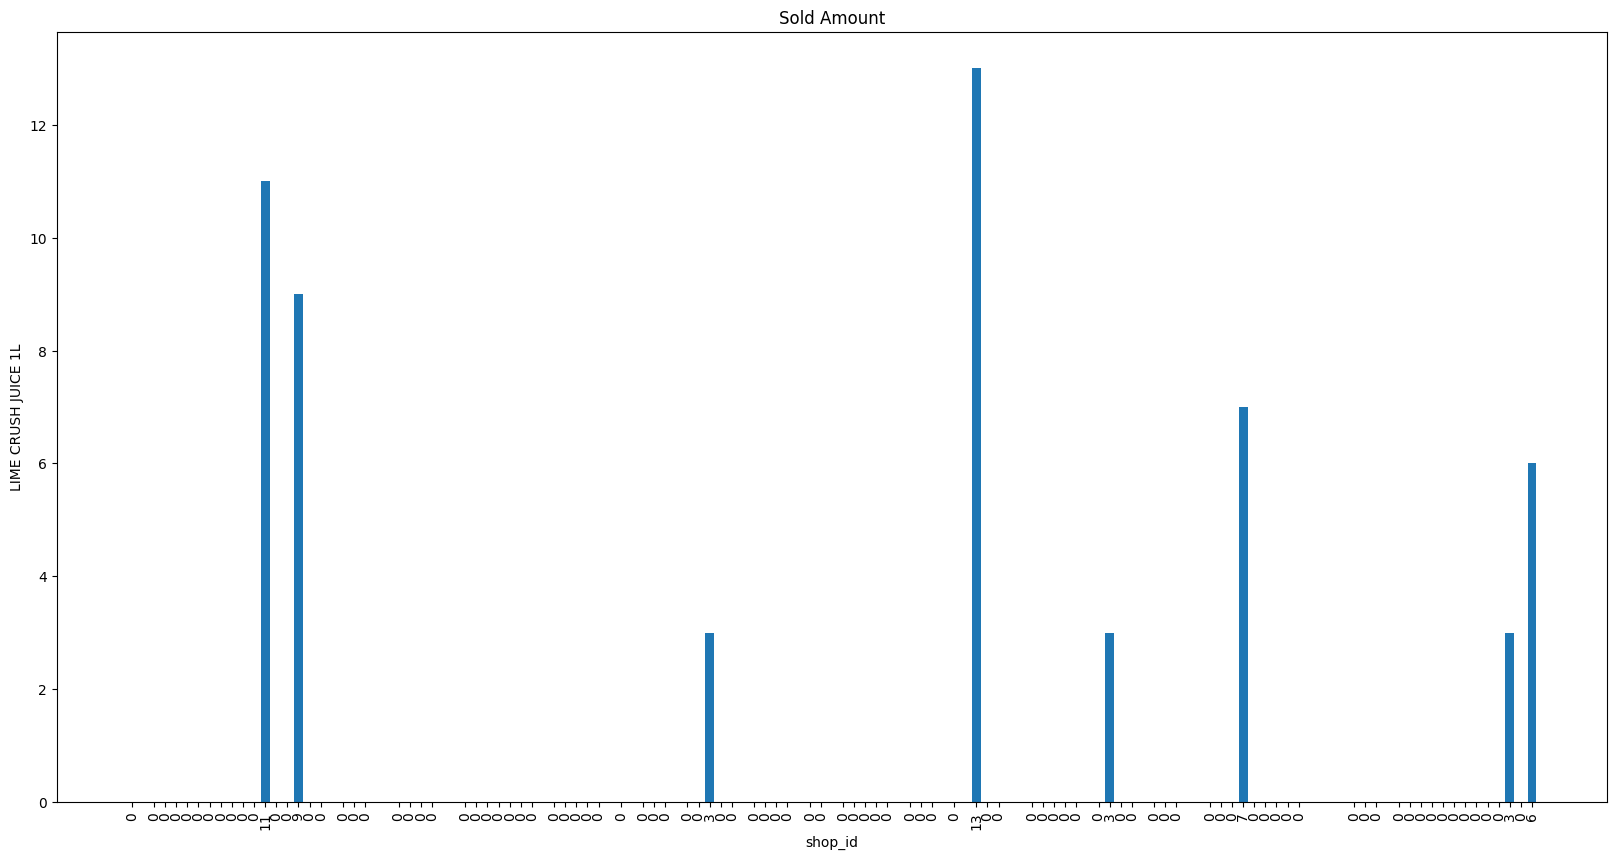

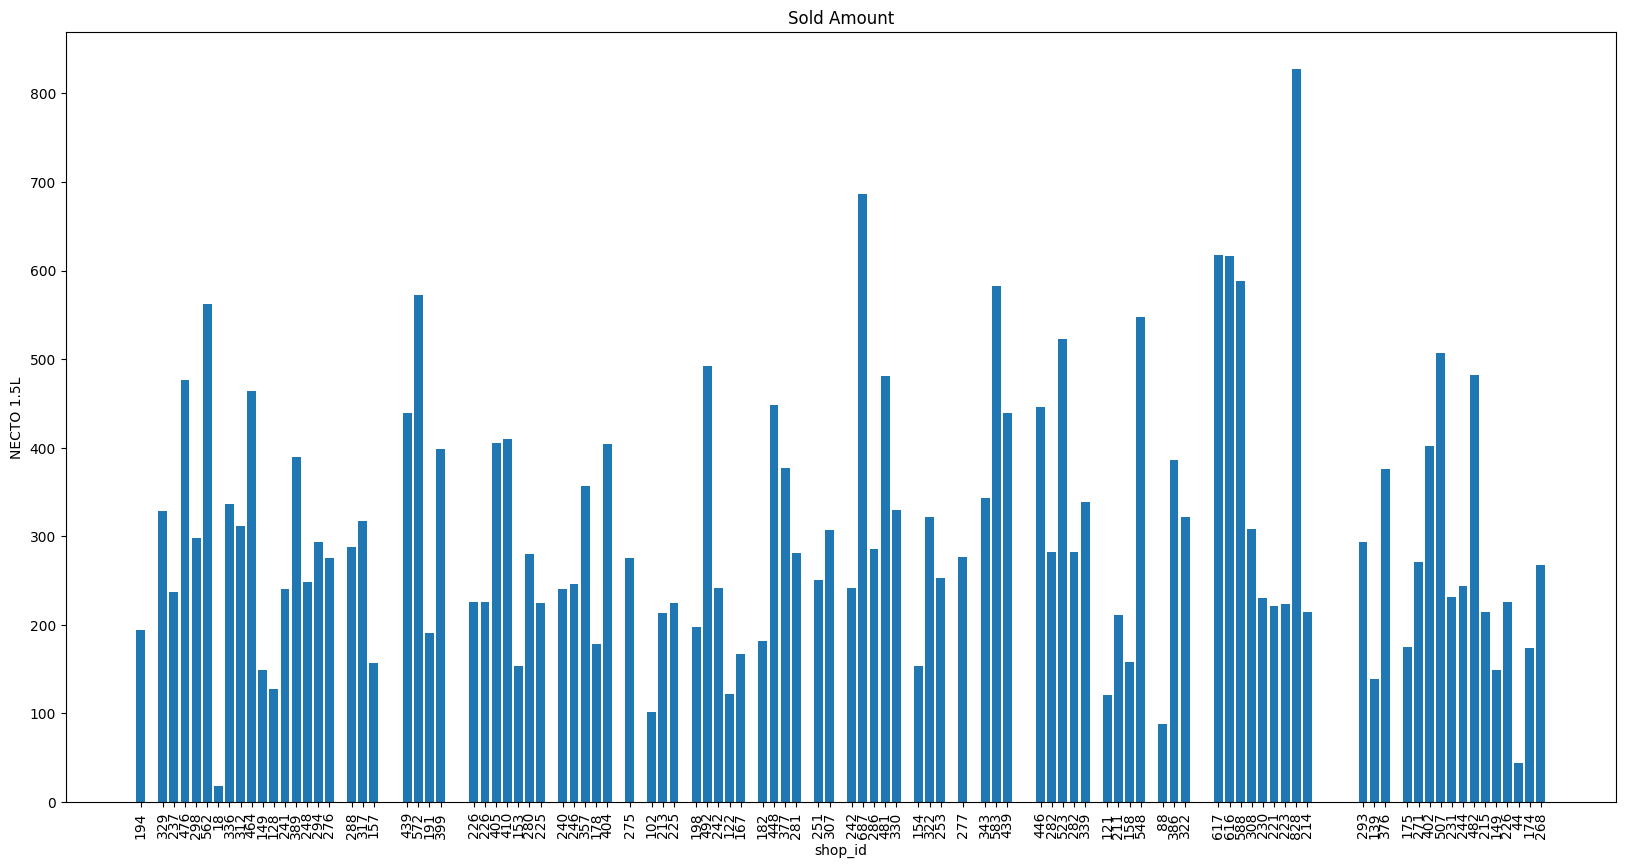

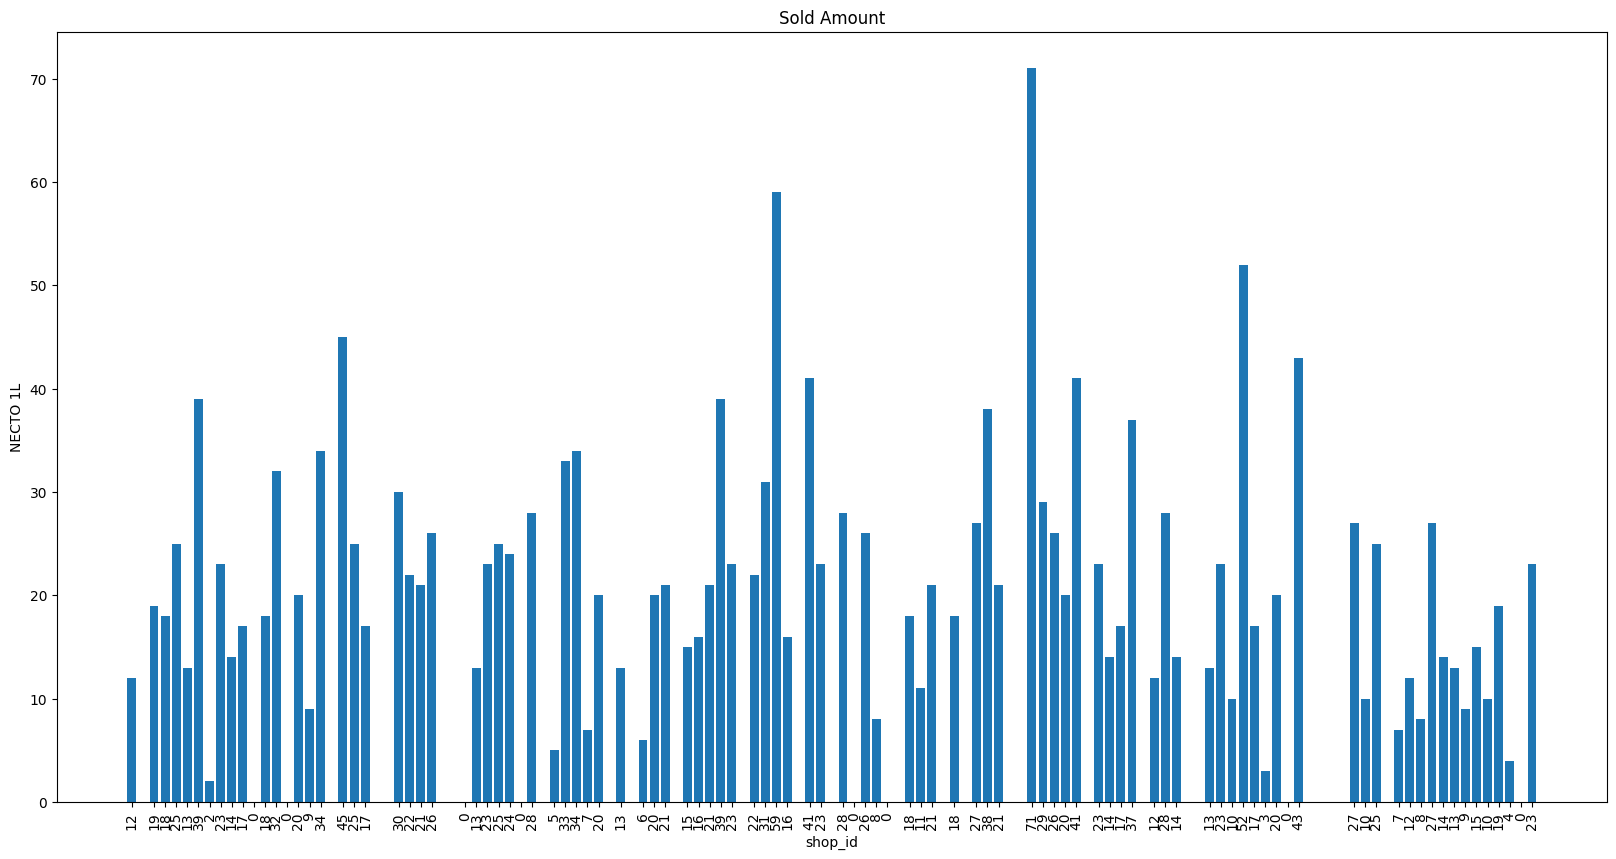

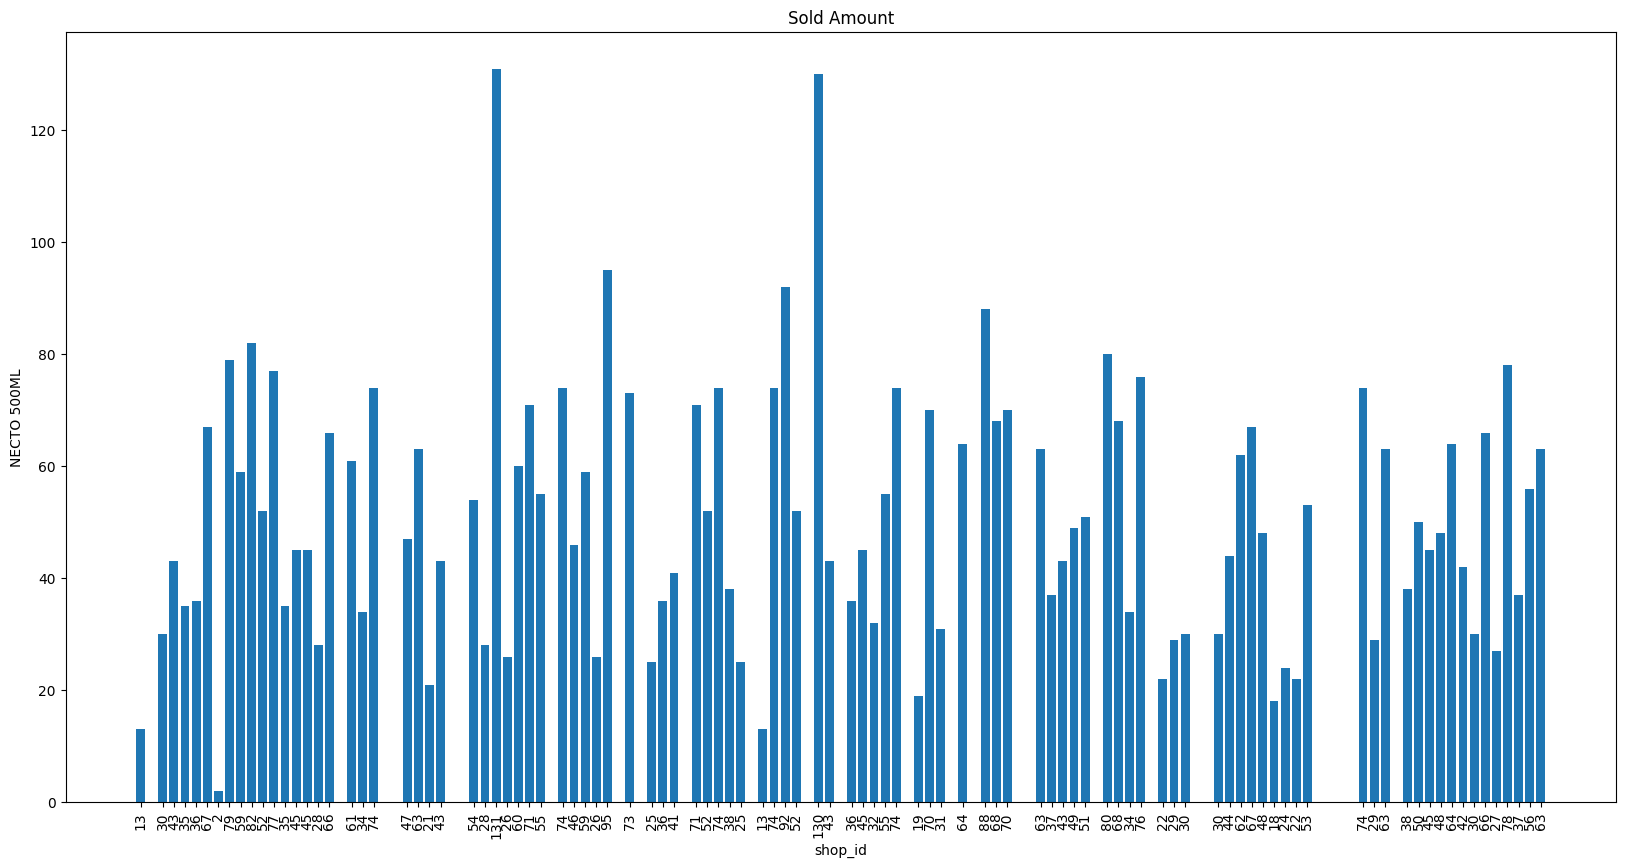

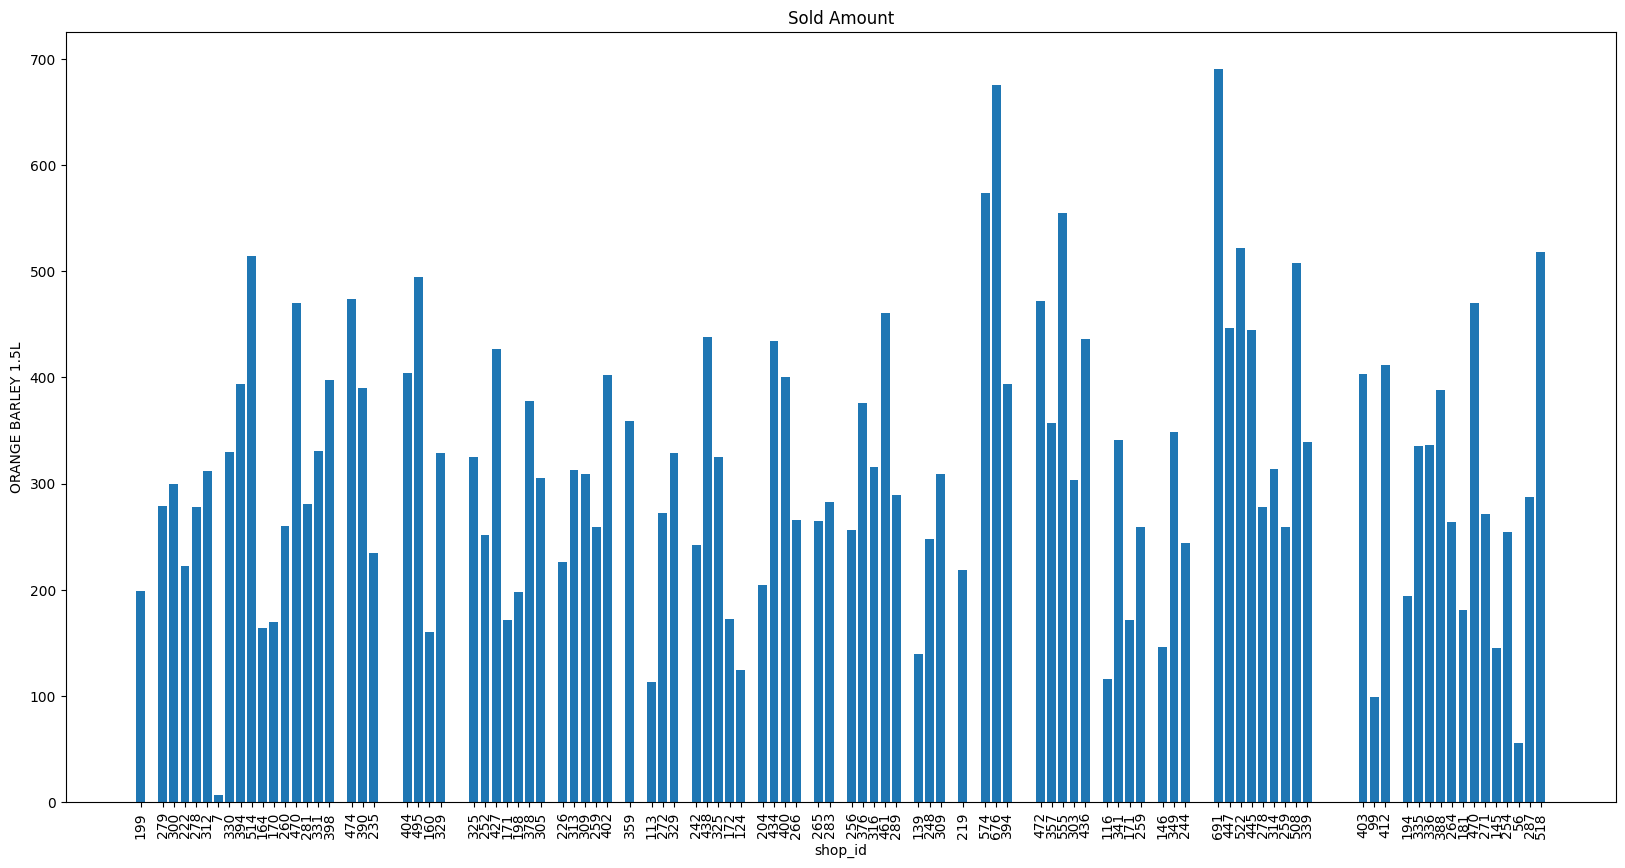

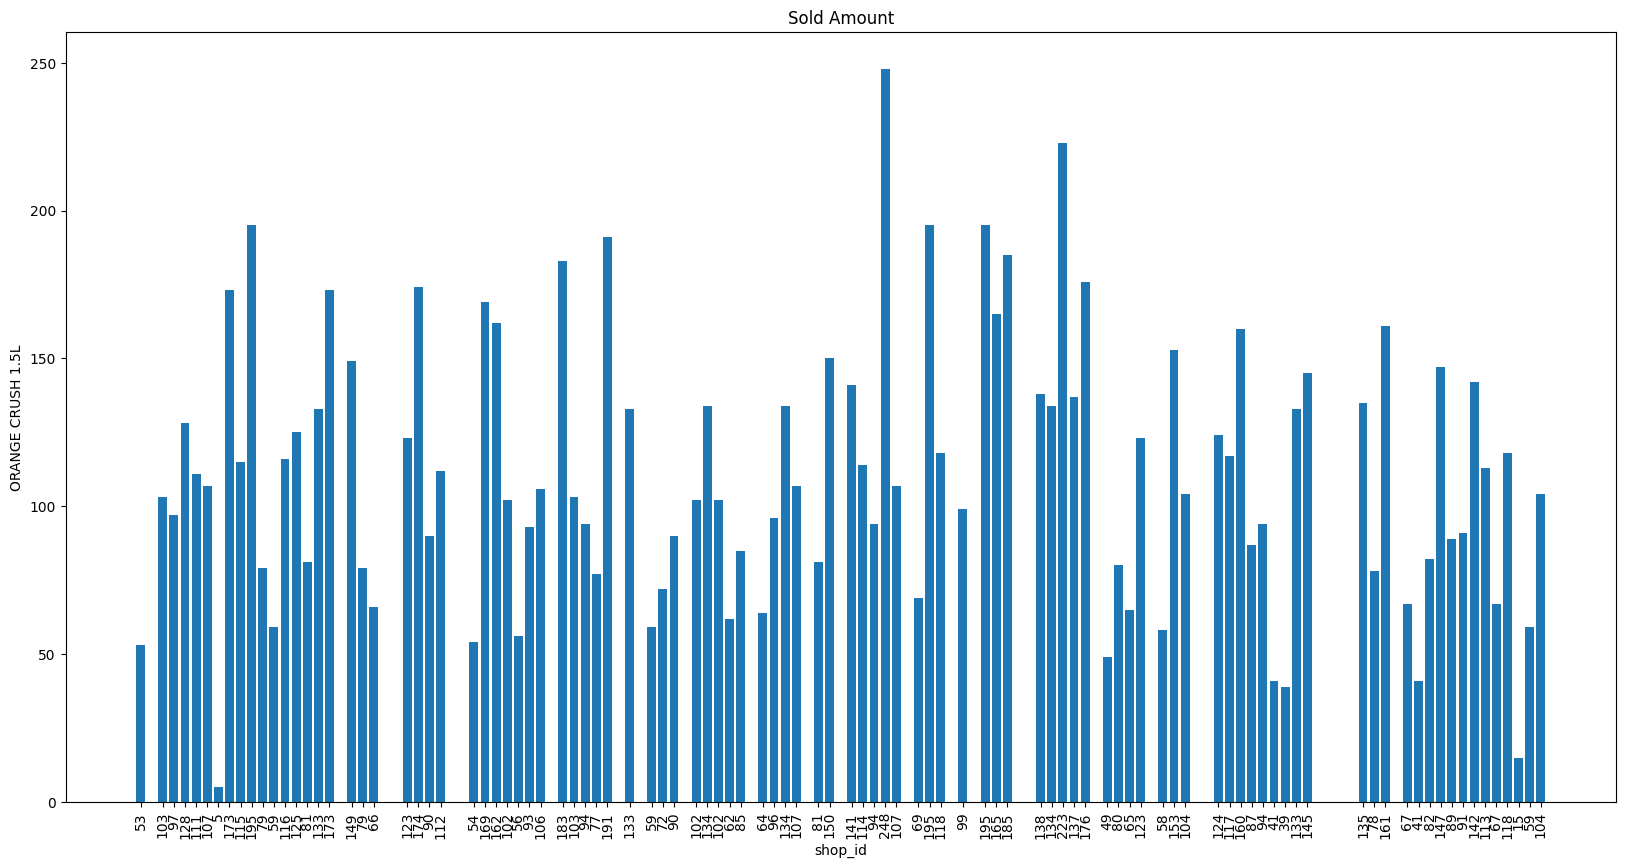

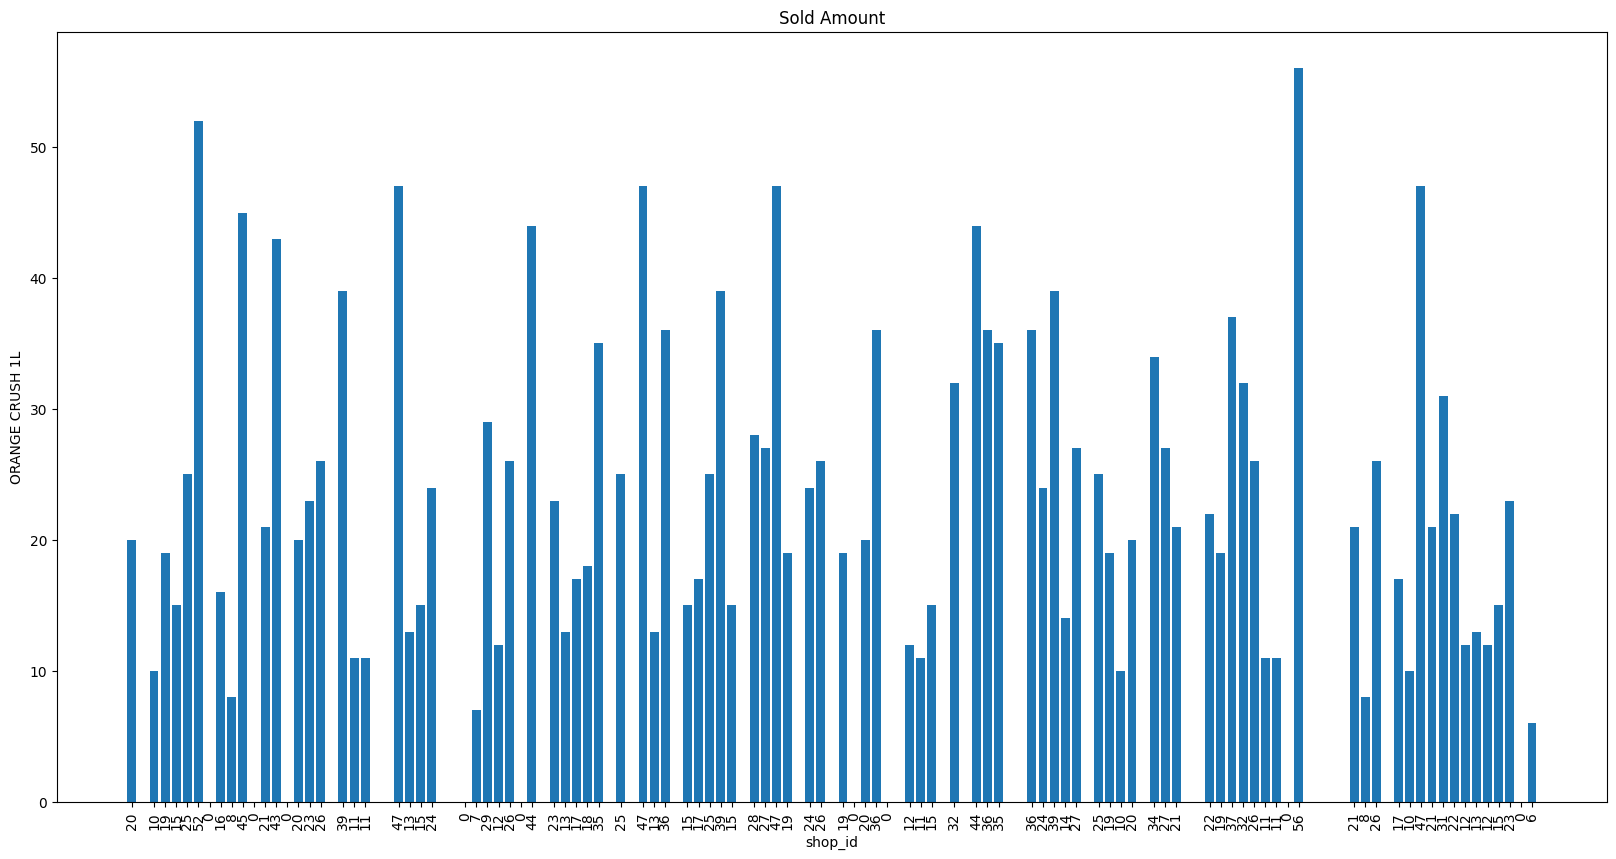

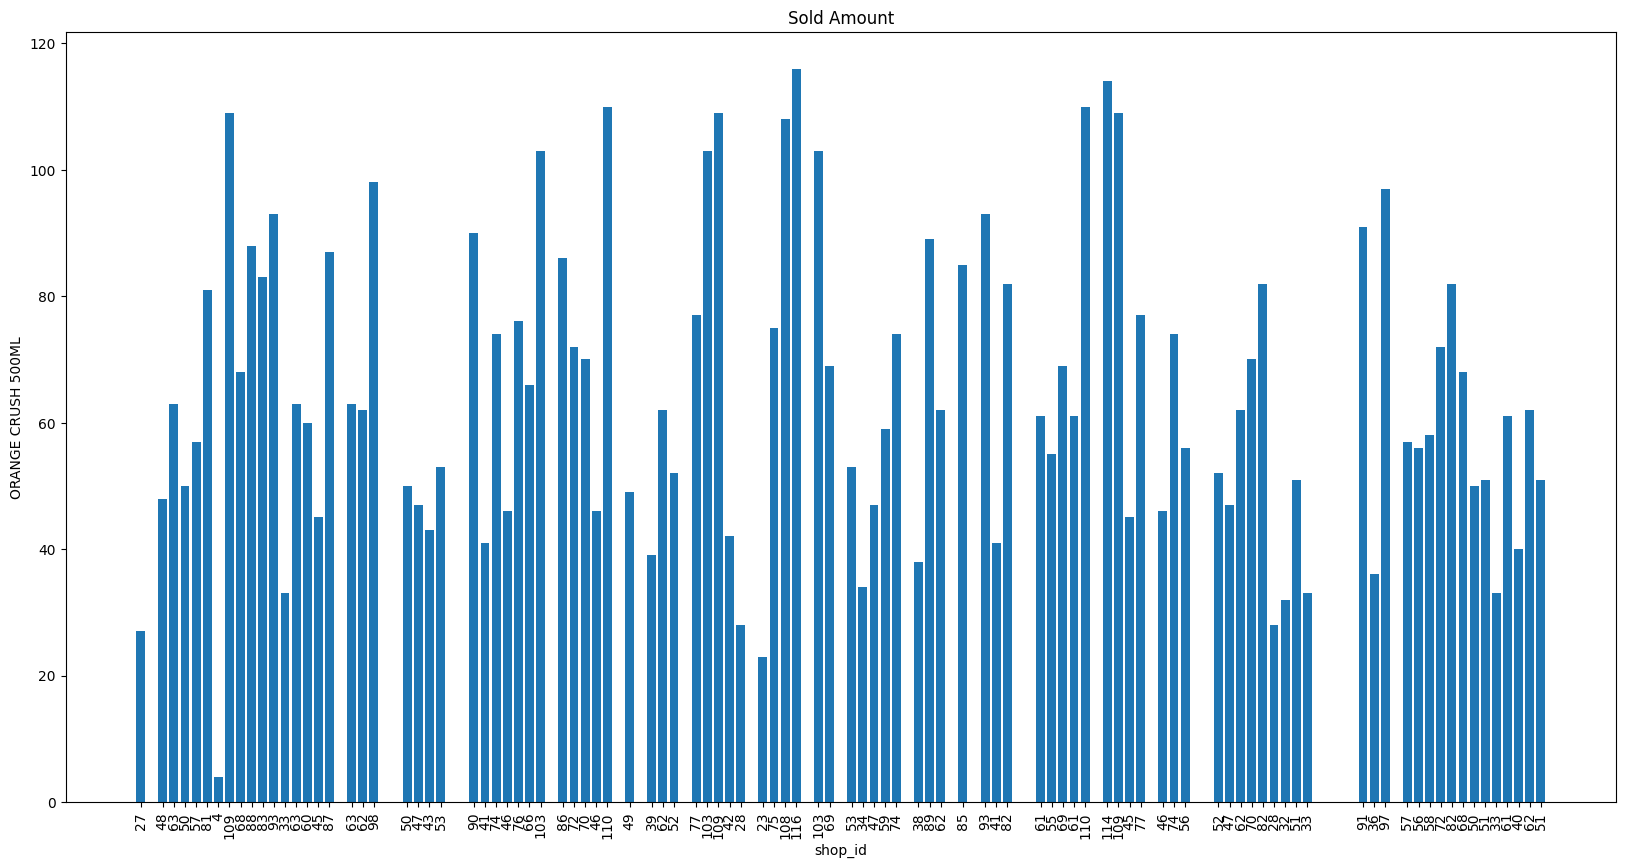

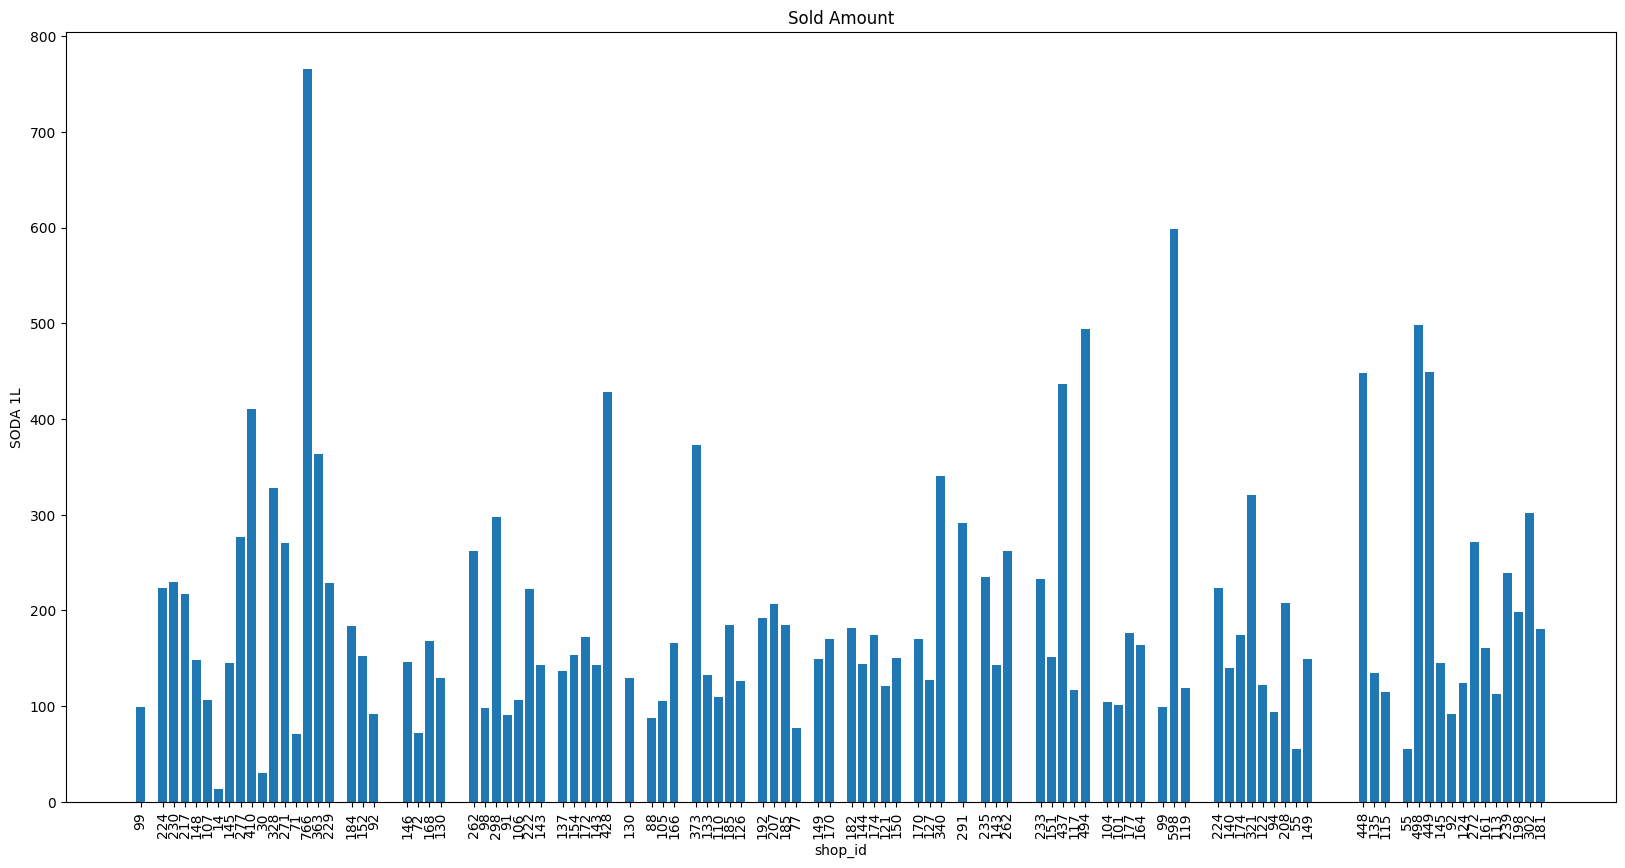

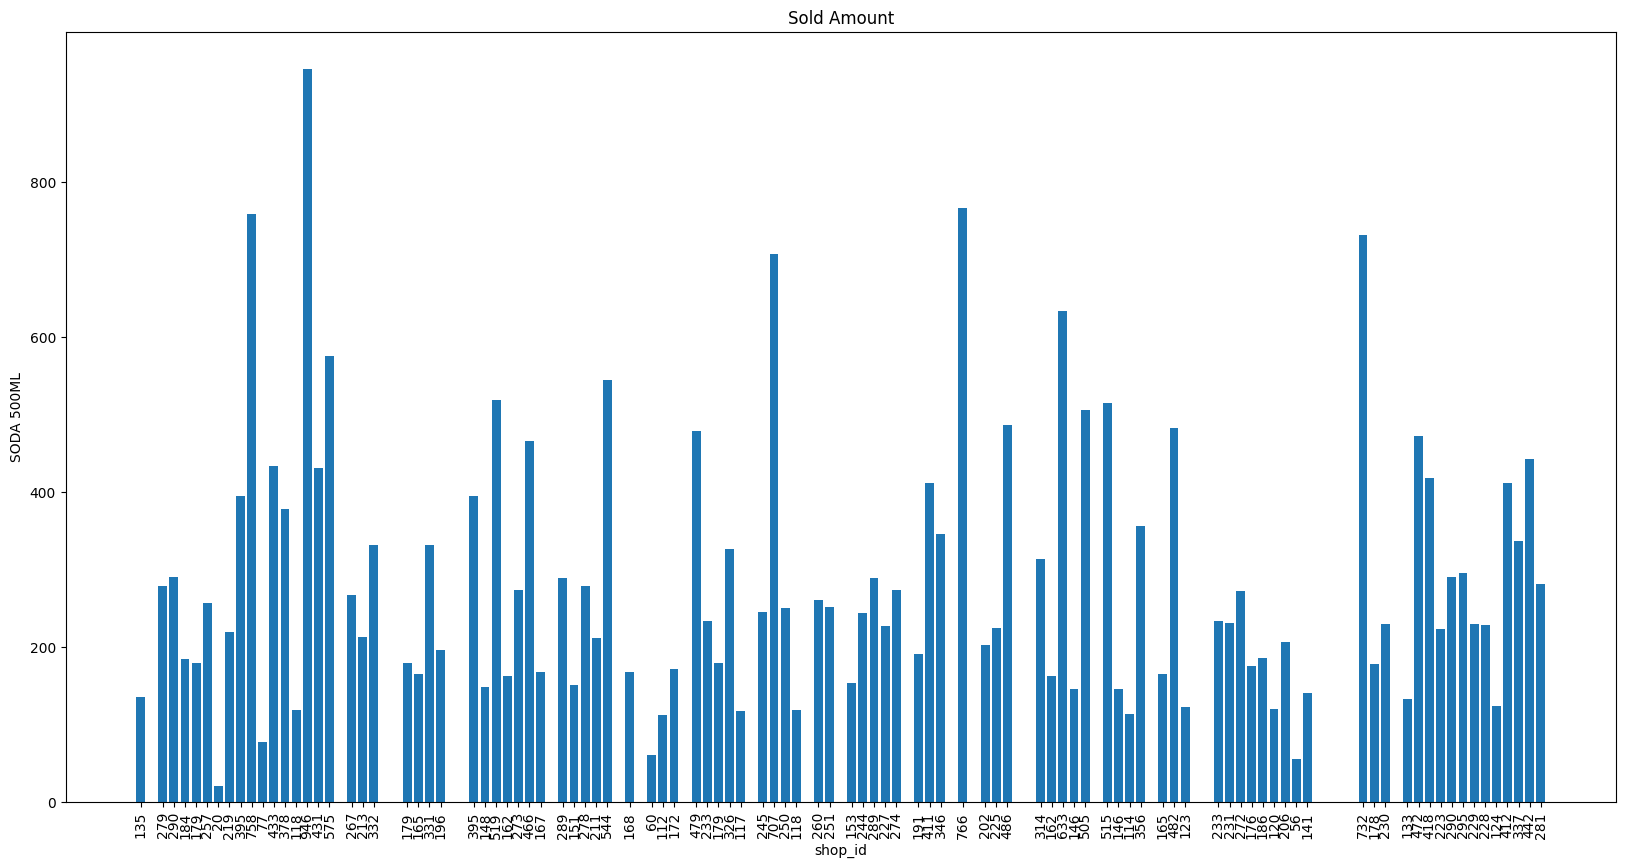

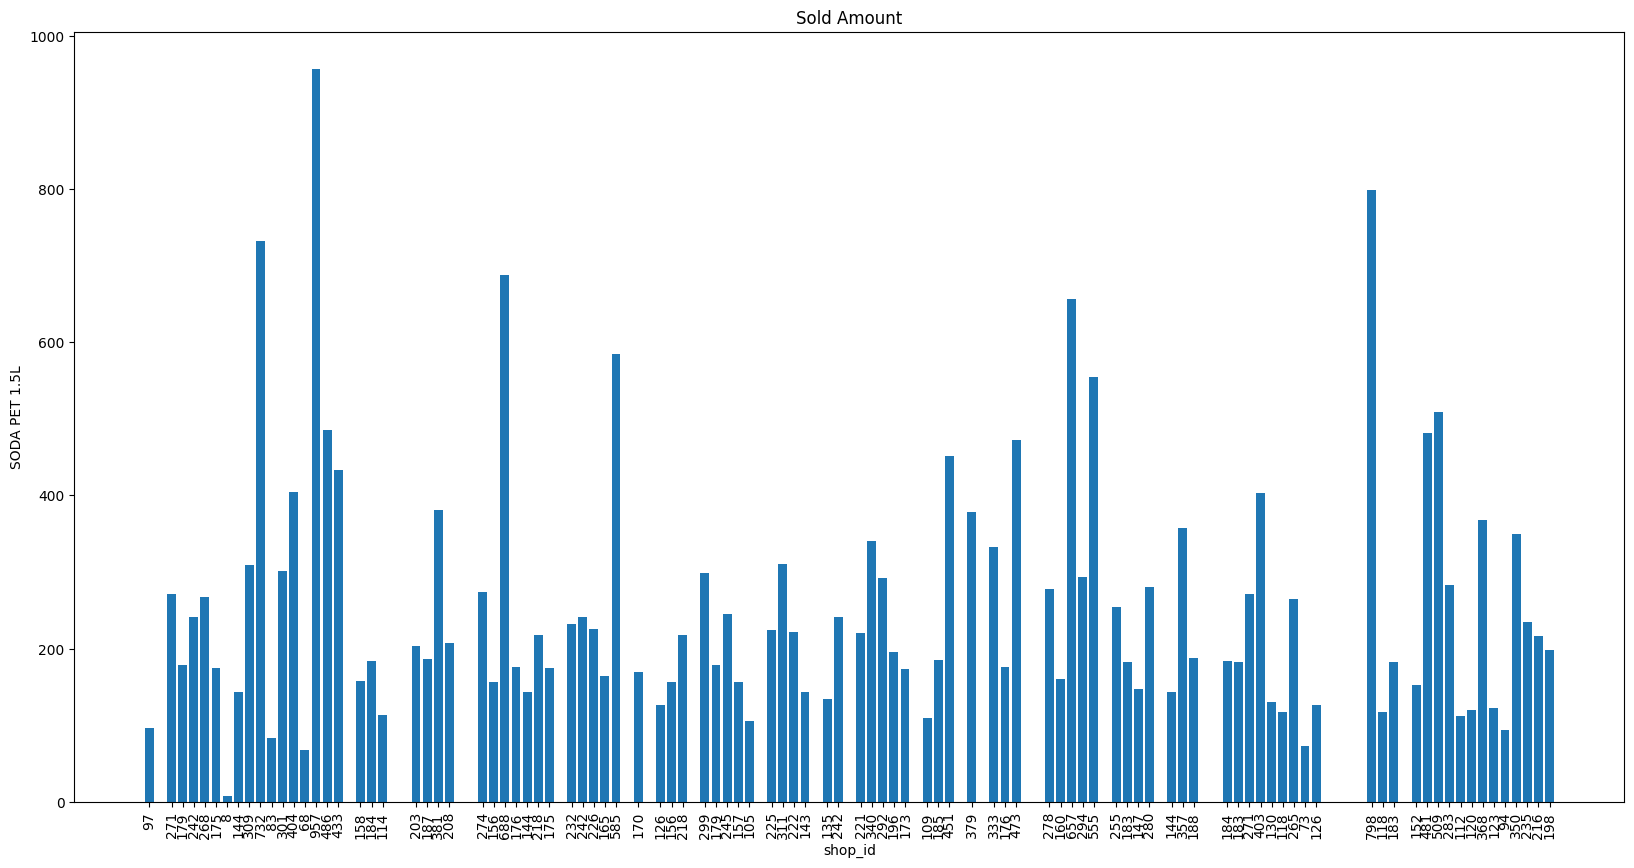

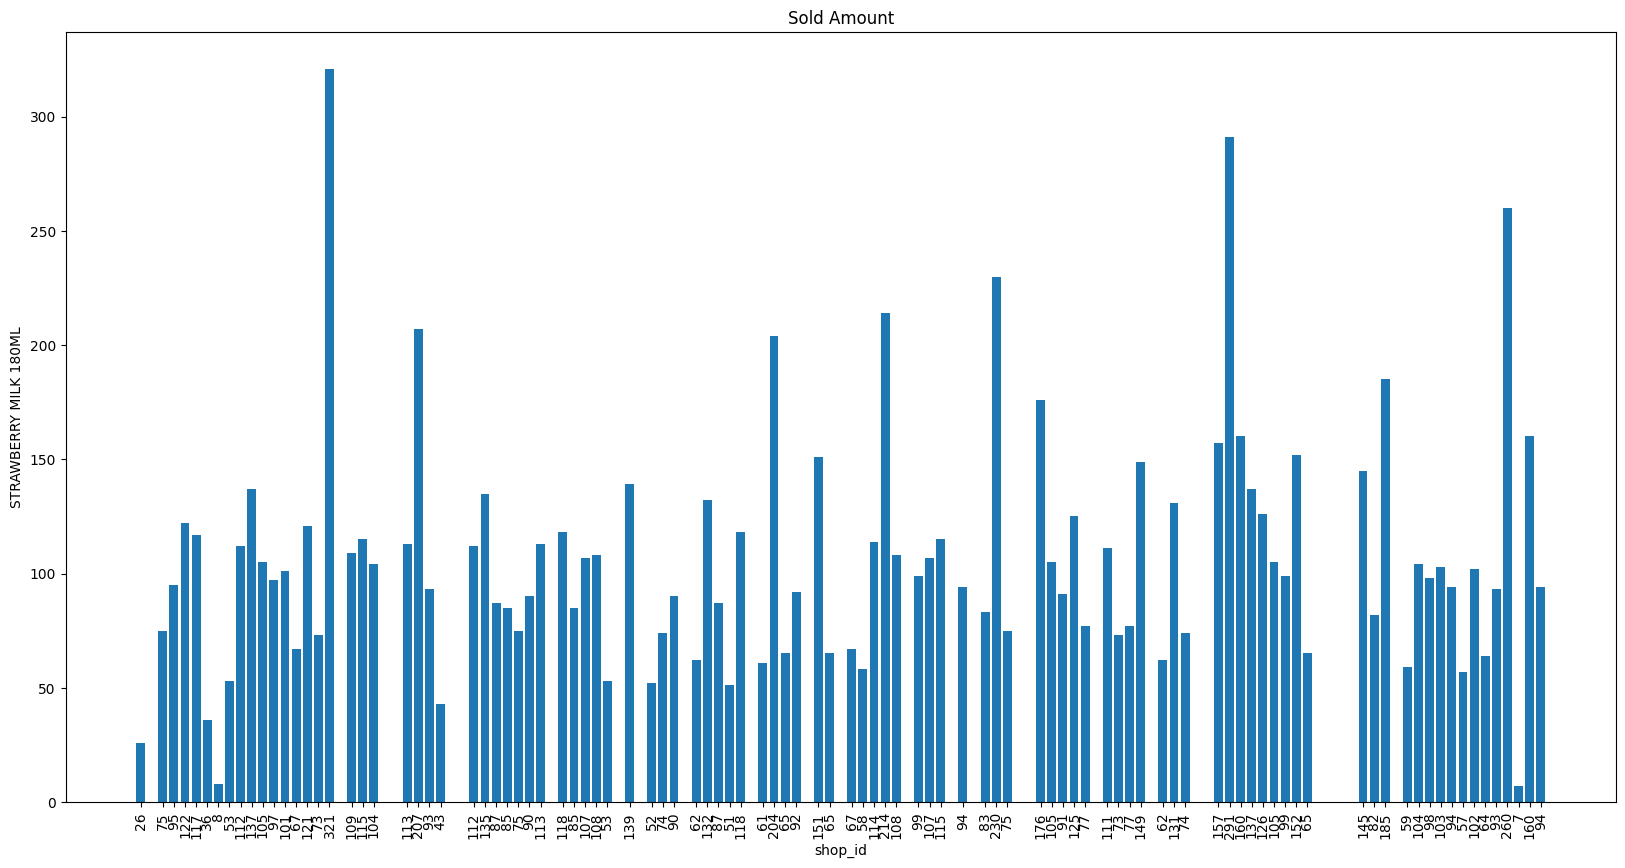

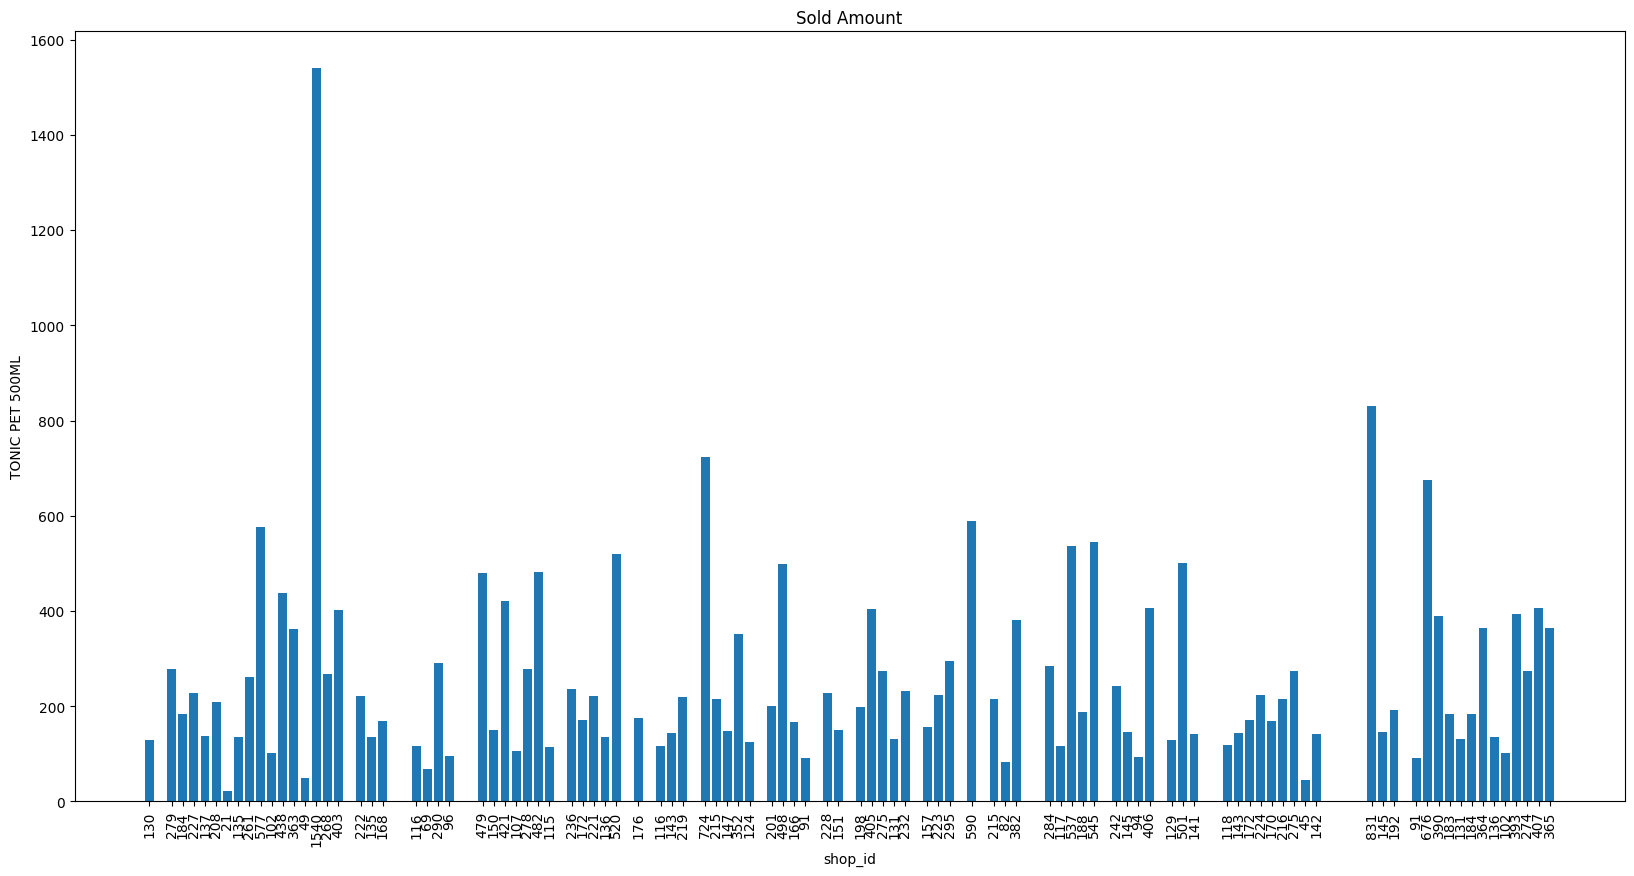

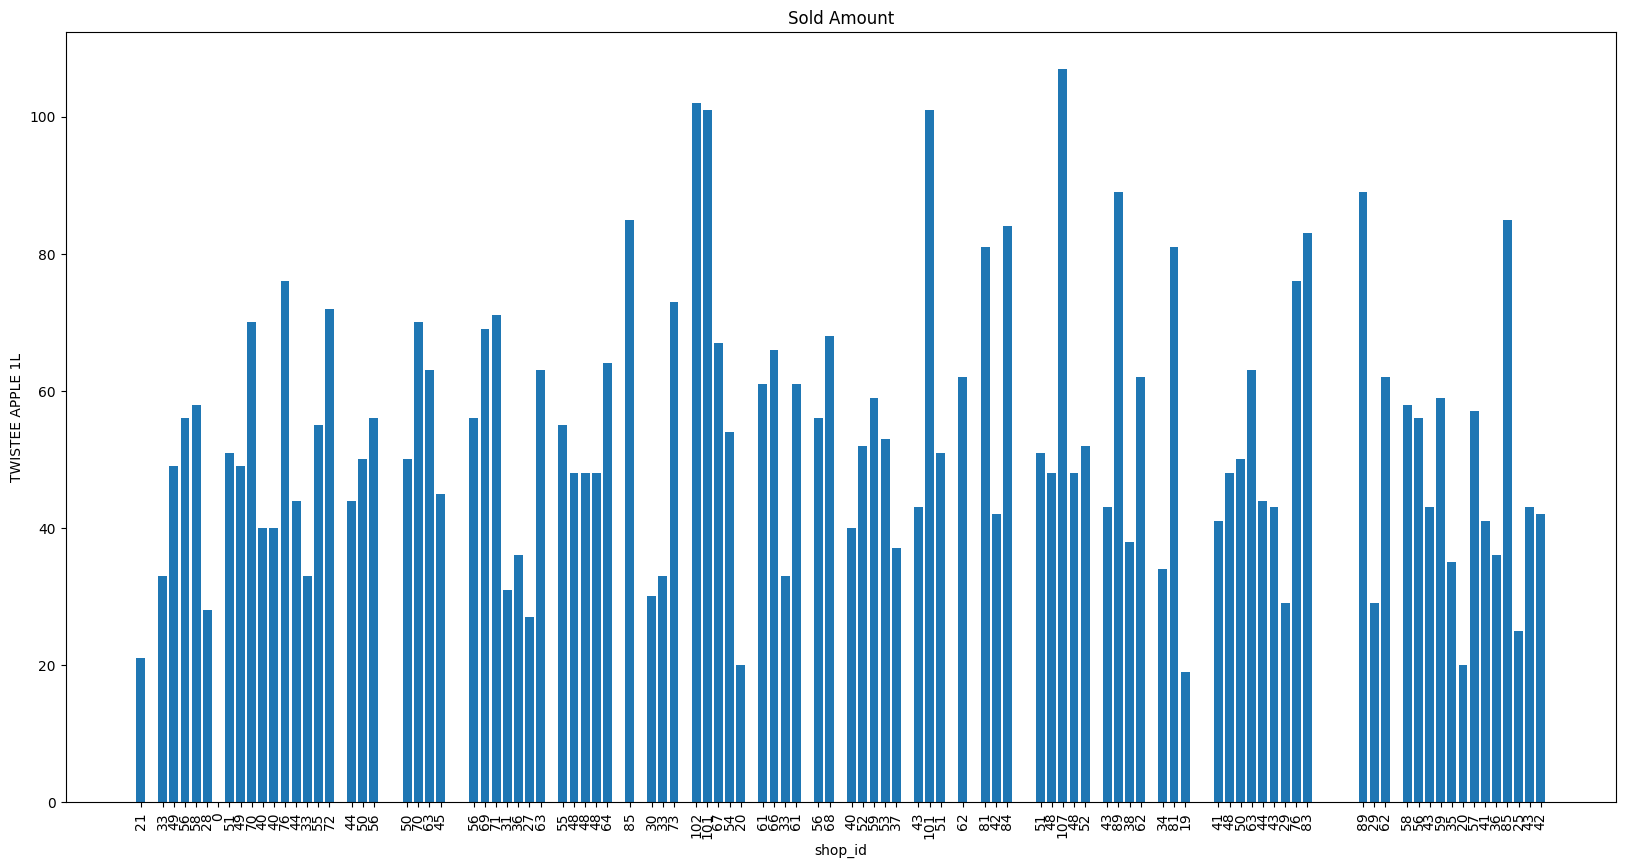

In [195]:
# # plot the bar chart
# fig, ax = plt.subplots(figsize=(20, 6)) # increase the chart size

# # Create bar chart
# plt.bar(Train_mic_DF['shop_id'], Train_mic_DF['BOTTLED DRINKING WATER 1.5L'])

# ax.tick_params(axis='x', labelrotation=90, labelsize=8) # rotate and reduce x-tick label font size


# # Add labels
# plt.xlabel('shop_id')
# plt.ylabel('BOTTLED DRINKING WATER 1.5L')
# plt.title('Bar Chart')
# # Rotate x-axis labels to a vertical position
# plt.xticks(rotation=90)
# # Show plot
# plt.show()

for item in item_list:
    # create the bar plot
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.bar(Train_mic_DF['shop_id'], Train_mic_DF[f'{item}'])

    # set x-axis labels
    ax.set_xticks(Train_mic_DF['shop_id'])
    ax.set_xticklabels(Train_mic_DF[f'{item}'], rotation=90)

    # set plot title and axis labels
    ax.set_title('Sold Amount')
    ax.set_xlabel('shop_id')
    ax.set_ylabel(f'{item}')

plt.show()

In [ ]:
# Create bar chart
plt.bar(df['Name'], df['Value'])

# Add labels
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Bar Chart')

# Show plot
plt.show()

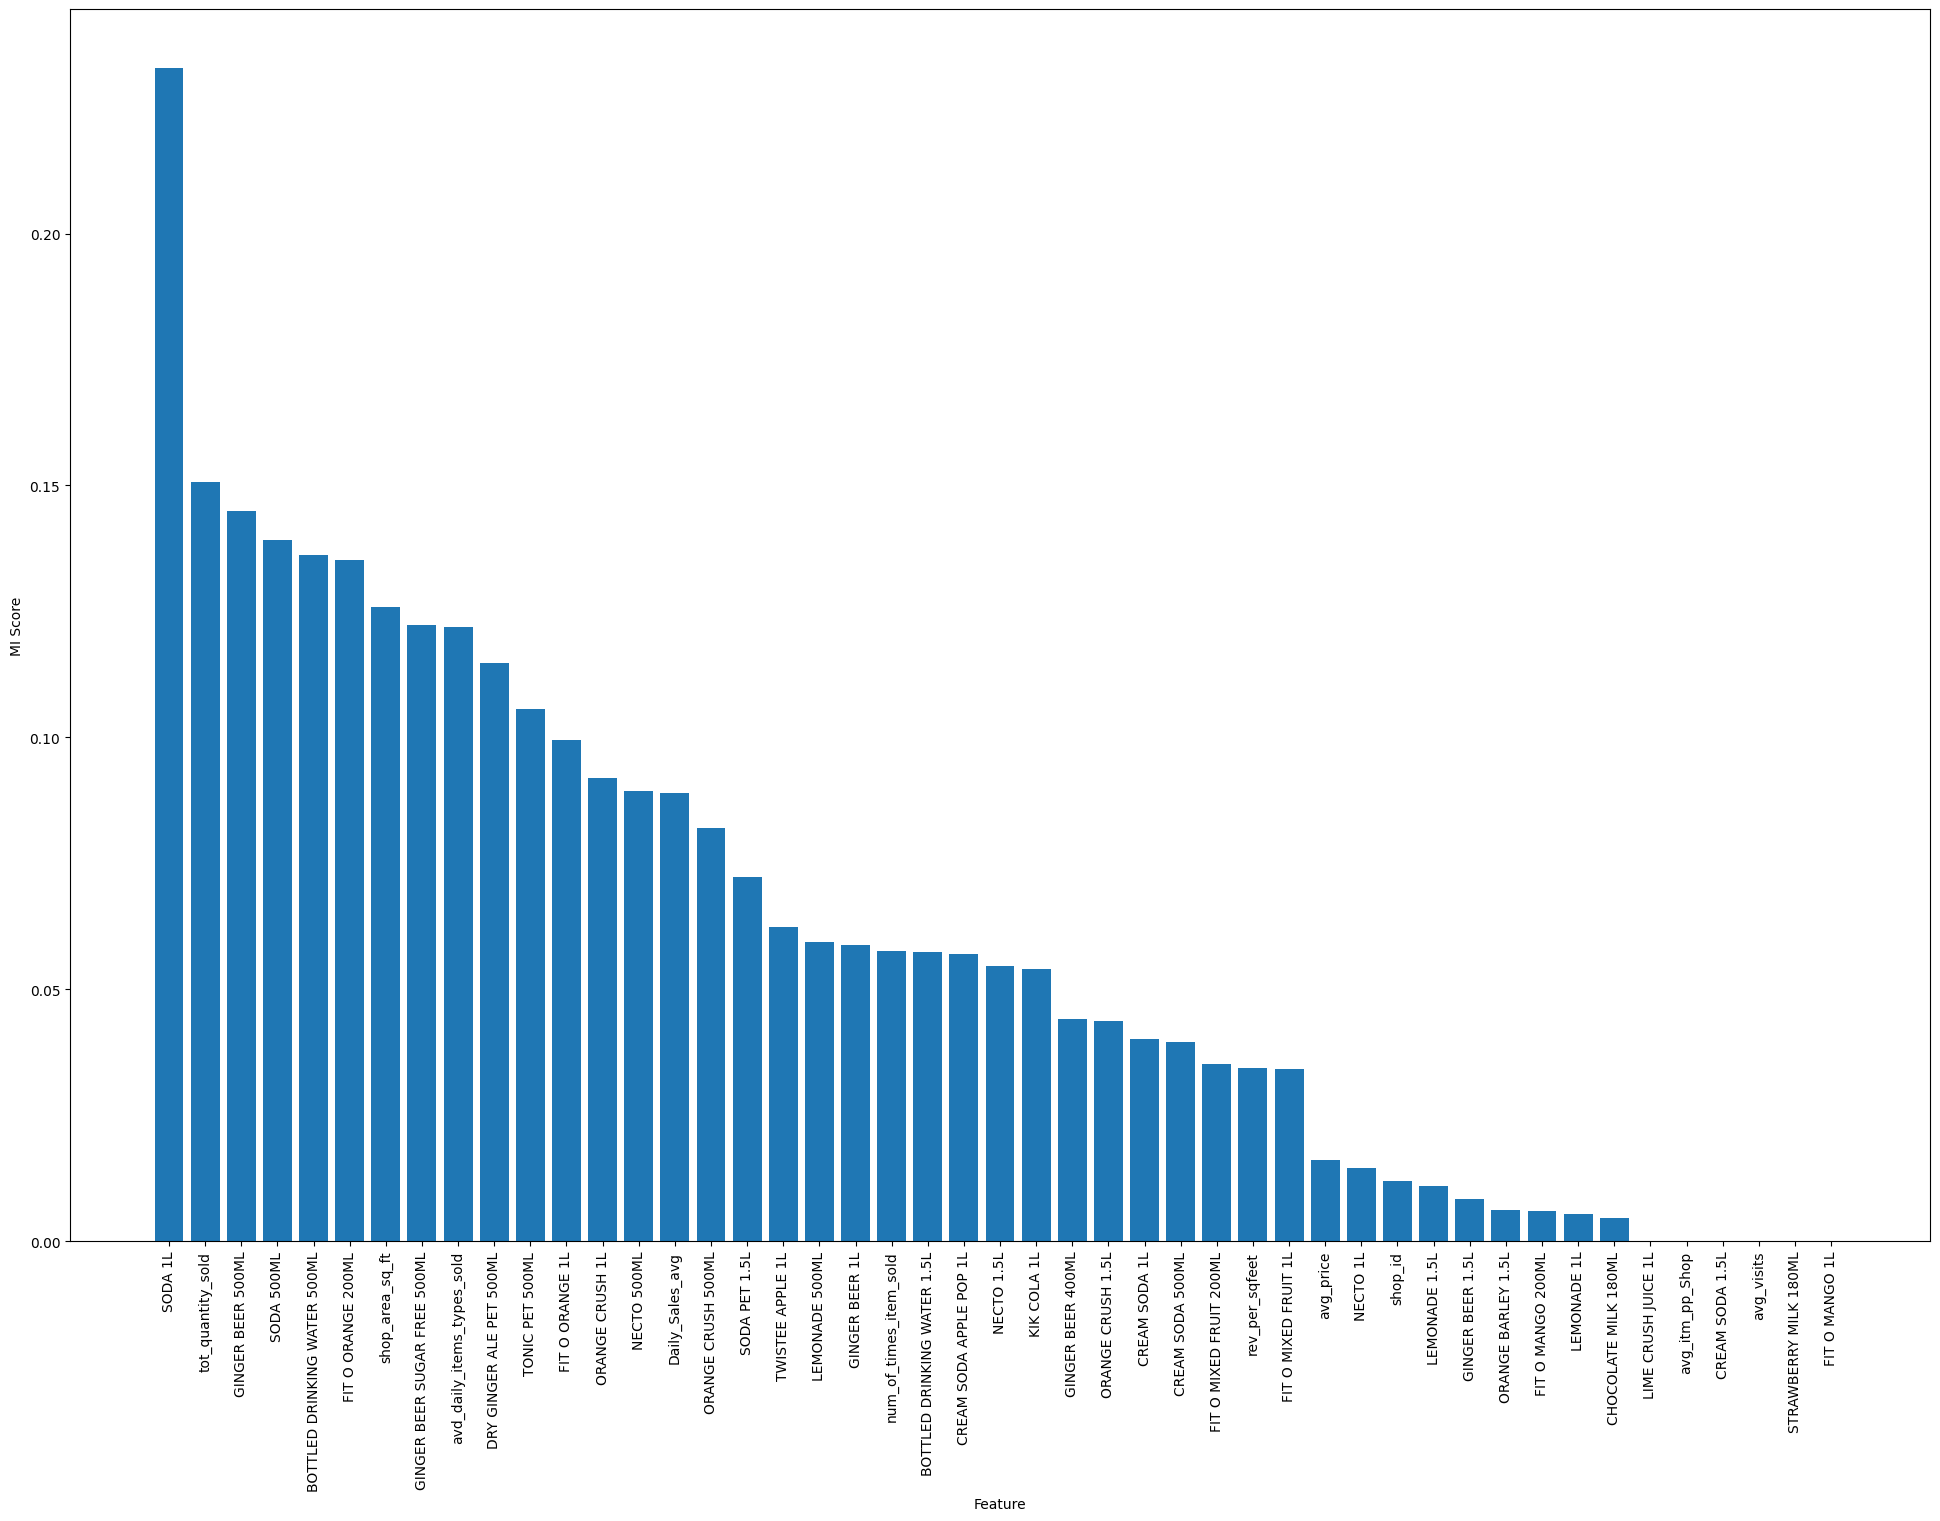

In [75]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Separate the target variable
X = Train_mic_DF.drop(['shop_profile'], axis=1)
y = Train_mic_DF['shop_profile']

# Compute MI scores
mi_scores = mutual_info_classif(X, y)

# Convert to DataFrame and sort by MI score
mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# Plot bar chart of MI scores
plt.figure(figsize=(24,16))
plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('MI Score')
plt.show()

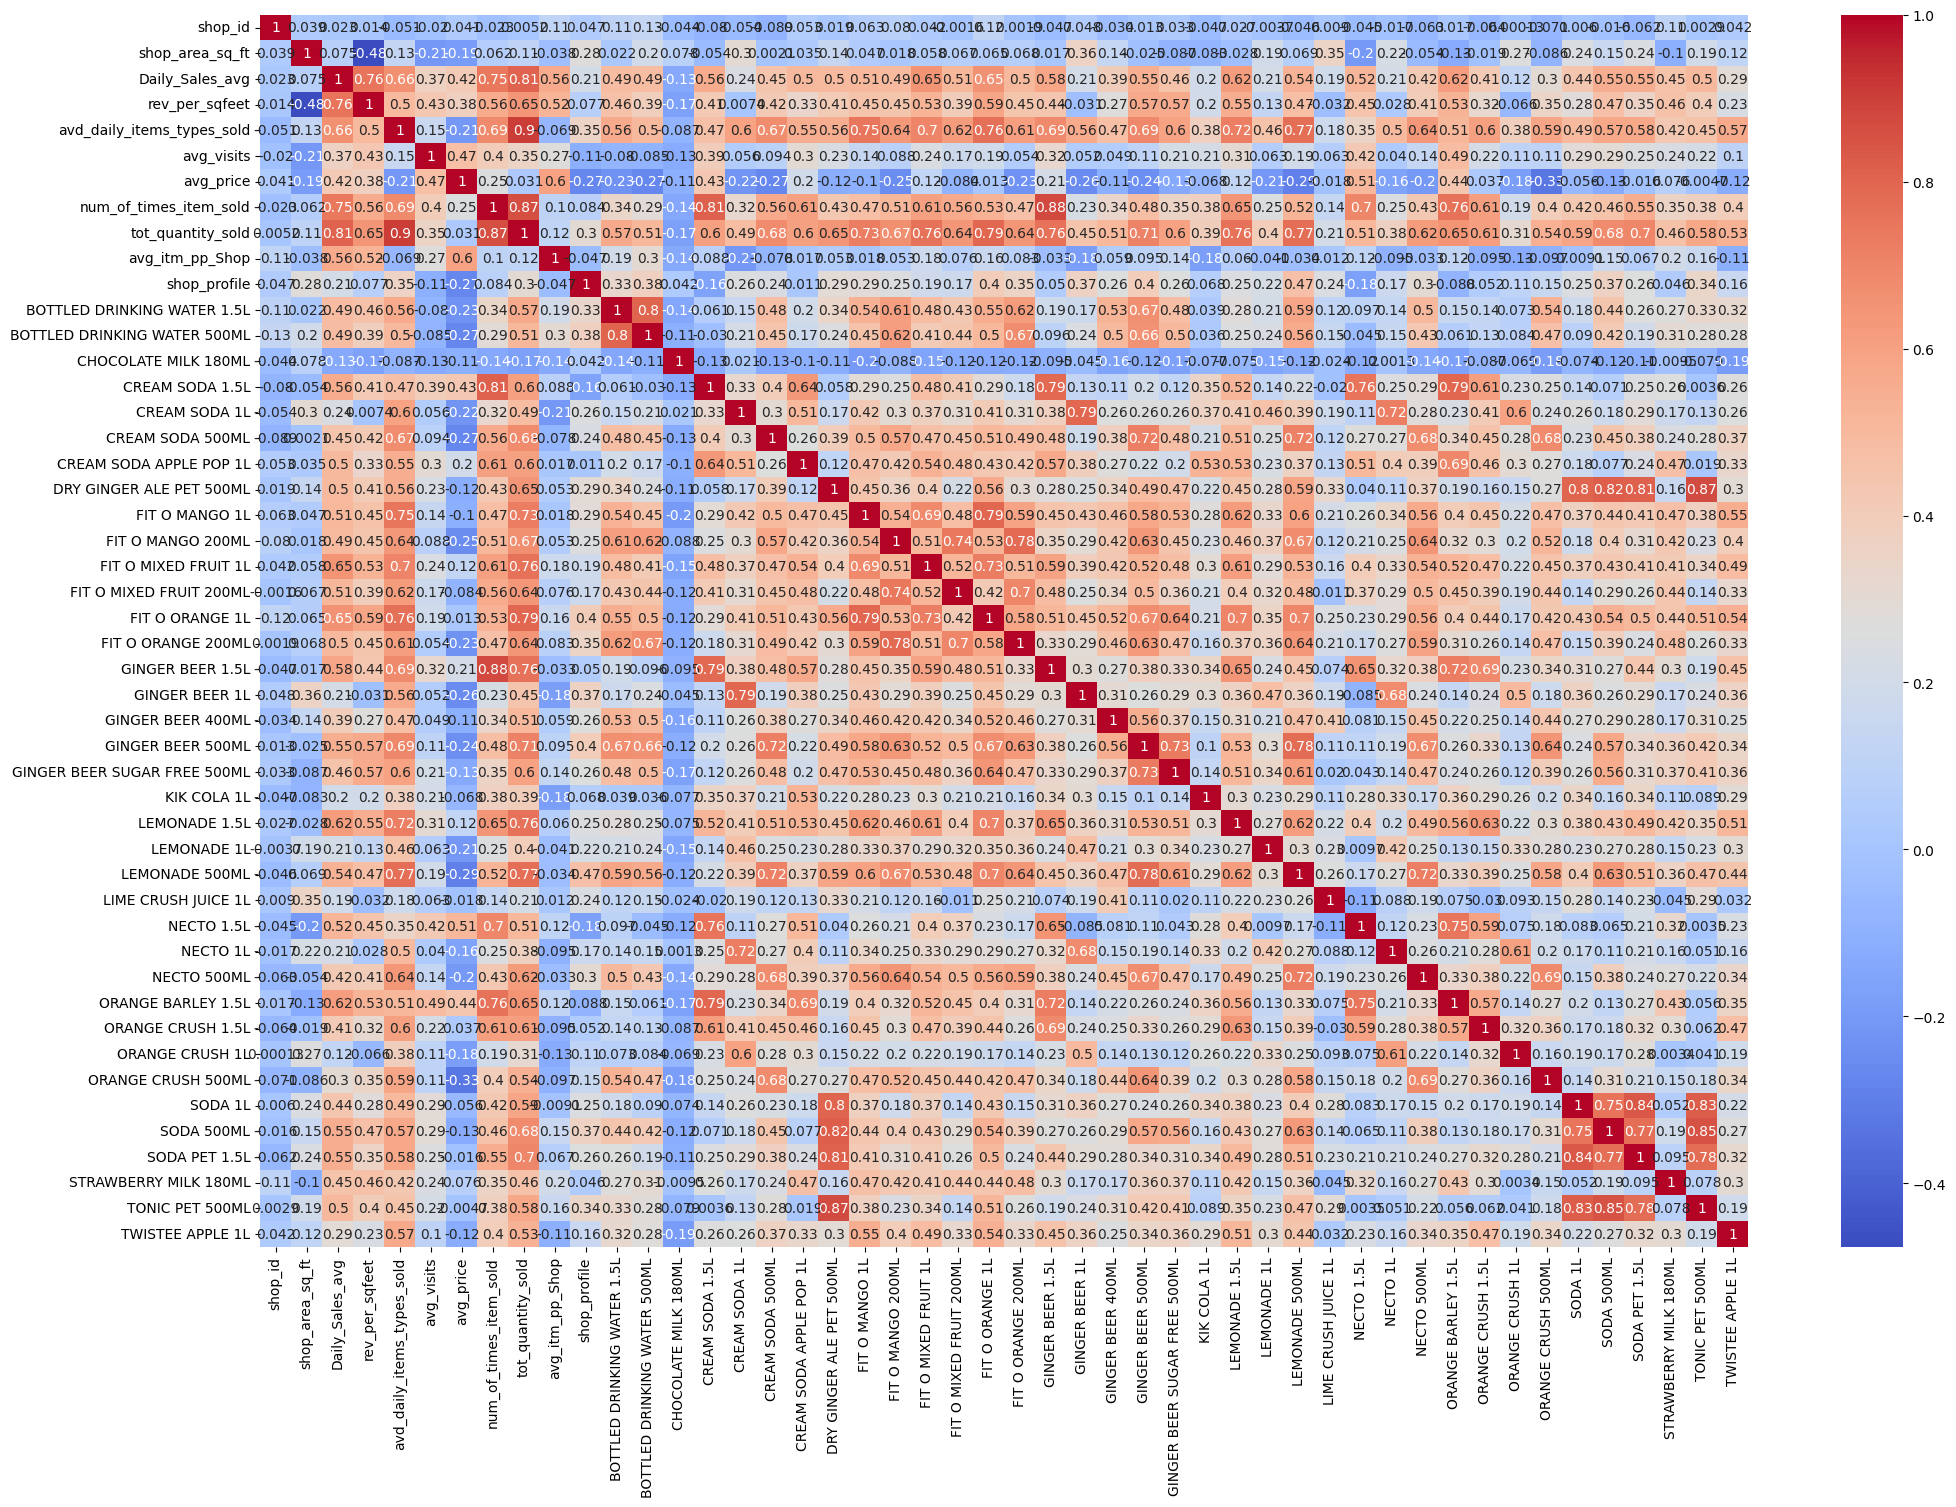

In [76]:
# Create correlation matrix
corr = microDF.corr()

# Set figure size
plt.figure(figsize=(24, 16))

# Plot correlation matrix as heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display plot
plt.show()

In [77]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

train_data_mic, test_data_mic = train_test_split(Train_mic_DF, test_size=0.2)

In [78]:
test_data_mic=test_data_mic.reset_index(drop=True)
train_data_mic=train_data_mic.reset_index(drop=True)

In [79]:
# remove store id from the training and testing sets

test_data_mic_noID = test_data_mic.drop(['shop_id'], axis=1)
train_data_mic_noID = train_data_mic.drop(['shop_id'], axis=1)

In [80]:
# Split data into training and test sets
X_train=train_data_mic_noID.drop('shop_profile', axis=1)
y_train=train_data_mic_noID['shop_profile']
X_test=test_data_mic_noID.drop('shop_profile', axis=1)
y_test=test_data_mic_noID['shop_profile']

In [81]:
X_test

shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0              1028            19419             940   
1               580            19625            1729   
2               617            41365            3907   
3               551            63126            6575   
4               422            46014            5422   
5               565            29124            2696   
6               676            34705            2469   
7               528            12942            1321   
8               676            38446            3008   
9               706            33410            2240   
10              328            29742            4949   
11              537            28861            2791   
12              336            15762            2614   
13              676            30764            2375   
14              617            26902            2428   
15              351            32015            5058   
16              441            35380            3537   
17              617            22709            1886   
18              617            27524            2482   
19              676            40161            3215   

    avd_daily_items_types_sold  avg_visits  avg_price  num_of_times_item_sold  \
0                           13         183        220                     159   
1                           14         166        227                     216   
2                           22         157        215                     343   
3                           25         185        237                     503   
4                           21         188        240                     434   
5                           20         171        221                     314   
6                           17         183        243                     377   
7                           12         164        214                     129   
8                           20         186        231                     366   
9                           15         177        260                     333   
10                          18         170        213                     263   
11                          16         164        237                     259   
12                          15         168        196                     202   
13                          21         166        204                     388   
14                          21         173        201                     328   
15                          19         177        223                     373   
16                          15         179        249                     435   
17                          20         152        191                     265   
18                          18         162        217                     348   
19                          22         170        223                     431   

    tot_quantity_sold  avg_itm_pp_Shop  BOTTLED DRINKING WATER 1.5L  ...  \
0                3255              296                           96  ...   
1                3229              310                           63  ...   
2                6888              349                          272  ...   
3               10540              343                          488  ...   
4                7093              322                          203  ...   
5                5789              263                          139  ...   
6                5390              309                           68  ...   
7                2600              268                           42  ...   
8                6854              296                          116  ...   
9                4446              355                           53  ...   
10               5454              297                          140  ...   
11               4579              327                          106  ...   
12               3563              246                          116  ...   
13               6507              246                       

In [82]:
X_train

shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0               617            39149            3470   
1               617            57321            5099   
2               605            25501            2228   
3               617            40881            3635   
4               381            19725            2785   
..              ...              ...             ...   
75              676            42579            3396   
76              617            44714            3925   
77              717            23310            1799   
78              676            28790            2375   
79              617            29554            2610   

    avd_daily_items_types_sold  avg_visits  avg_price  num_of_times_item_sold  \
0                           21         164        226                     408   
1                           24         186        221                     490   
2                           19         168        205                     298   
3                           20         181        229                     480   
4                           17         177        212                     168   
..                         ...         ...        ...                     ...   
75                          24         169        206                     515   
76                          21         177        226                     645   
77                          20         166        194                     272   
78                          18         164        220                     299   
79                          20         171        215                     346   

    tot_quantity_sold  avg_itm_pp_Shop  BOTTLED DRINKING WATER 1.5L  ...  \
0                7184              297                          299  ...   
1               10122              310                          206  ...   
2                5550              242                          165  ...   
3                7207              311                           92  ...   
4                4038              262                           94  ...   
..                ...              ...                          ...  ...   
75               9189              249                          247  ...   
76               7789              310                          115  ...   
77               5538              232                          164  ...   
78               5366              299                           93  ...   
79               5994              268                          119  ...   

    ORANGE BARLEY 1.5L  ORANGE CRUSH 1.5L  ORANGE CRUSH 1L  \
0                  438                134               17   
1                  403                135               21   
2                  271                113               13   
3                  461                248               36   
4                  198                 56               26   
..                 ...                ...              ...   
75                 402                191               35   
76                 388                147               21   
77                 305                106               44   
78                 316                 94               20   
79                 222                128               15   

    ORANGE CRUSH 500ML  SODA 1L  SODA 500ML  SODA PET 1.5L  \
0                  103      133         233            179   
1                   91      448         732            798   
2                   51      161         228            123   
3                   59      121         227            196   
4                   76      106         273            144   
..                 ...      ...         ...            ...   
75                 110      428         544            585   
76                  72      145         223            283   
77                 103      143         167            175   
78                  47      174         289            292   
79                

#### Decition tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris



# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dtc, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score:  0.4625


In [84]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Train the Decision Trees model
dt_model = DecisionTreeClassifier() # criterion= 'gini', max_depth= 3, min_samples_leaf= 3, min_samples_split= 5)
dt_model.fit(X_train, y_train)

# Test the model on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 55.00%


In [85]:
from sklearn.metrics import f1_score

# calculate the F1 score for each class
f1_class2 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[1], average='weighted')
f1_class0 = f1_score(y_test, y_pred, labels=[0], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

formatted_f1_average = "{:.4f}".format(f1_average)

F1 score for class 0: 0.00
F1 score for class 1: 0.67
F1 score for class 2: 0.31
Average F1 score: 0.32


c:\Users\gw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


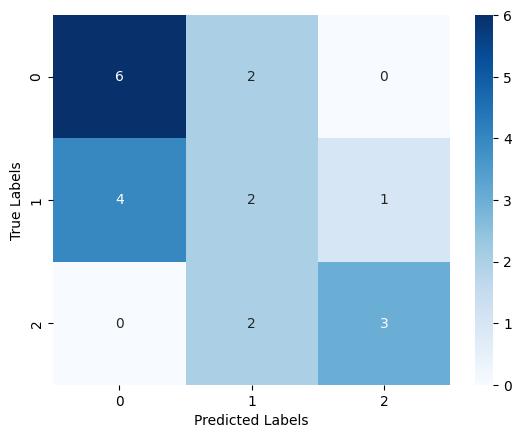

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Big Tune

In [87]:
# train_data_mic_noID['shop_profile'] = train_data_mic_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_mic_noID['shop_profile'] = test_data_mic_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_mic['shop_profile'] = test_data_mic['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# train_data_mic['shop_profile'] = train_data_mic['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [88]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Split data into training and test sets
X_train = train_data_mic_noID.drop('shop_profile', axis=1)
y_train = train_data_mic_noID['shop_profile']
X_test = test_data_mic_noID.drop('shop_profile', axis=1)
y_test = test_data_mic_noID['shop_profile']

# Define the models to be hyperparameter tuned
models = [
    # {
    #     'name': 'Decision Tree',
    #     'model': DecisionTreeClassifier(),
    #     'params': {
    #         'criterion': ['gini', 'entropy'],
    #         'splitter': ['best', 'random'],
    #         'max_depth': [3, 5, 7, None],
    #         'min_samples_split': [2, 5, 10],
    #         'min_samples_leaf': [1, 2, 4],
    #         'max_features': ['sqrt', 'log2', None]
    #     }
    # },
    # {
    #     'name': 'Naive Bayes',
    #     'model': GaussianNB(),
    #     'params': {
    #         'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    #     }
    # },
    # {
    #     'name': 'Support Vector Machine',
    #     'model': SVC(),
    #     'params': {
    #         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #         'C': [0.1, 1.0, 10.0],
    #         'gamma': ['scale', 'auto']
    #     }
    # },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    # {
    #     'name': 'Logistic Regression',
    #     'model': LogisticRegression(),
    #     'params': {
    #         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #         'C': [0.1, 1.0, 10.0],
    #         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #         'max_iter': [100, 500, 1000]
    # }
    # },
    # {
    #     'name': 'K-Nearest Neighbors',
    #     'model': KNeighborsClassifier(),
    #     'params': {
    #         'n_neighbors': [3, 5, 7],
    #         'weights': ['uniform', 'distance'],
    #         'metric': ['euclidean', 'manhattan', 'minkowski']
    # }
    # }

]

# Perform hyperparameter tuning for each model using GridSearchCV
best_model = None
best_score = 0.0
for model_config in models:
    print(f'Tuning {model_config["name"]}...')
    model = model_config['model']
    params = model_config['params']
    custom_grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5,
        n_jobs=-1
    )
    custom_grid_search.fit(X_train, y_train)
    score = custom_grid_search.best_score_
    print(f'Best score for {model_config["name"]}: {score:.4f}')
    print(f'Best Parametersfor {model_config["name"]}:  {custom_grid_search.best_params_}')
    
    # get the best random forrest params
    if model_config['name'] == 'Random Forest':
        best_params_RT = custom_grid_search.best_params_
        best_model_RT= custom_grid_search.best_estimator_   
        
    if score > best_score:
        best_score = score
        best_model = custom_grid_search.best_estimator_
        best_model_name = model_config['name']
        best_model_hyperparams = custom_grid_search.best_params_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy score for the best model: {accuracy:.4f}')
   


Tuning Random Forest...
Best score for Random Forest: 0.6375
Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test accuracy score for the best model: 0.7000


In [89]:
# train_data_mic_noID['shop_profile'] = train_data_mic_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_mic_noID['shop_profile'] = test_data_mic_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_mic['shop_profile'] = test_data_mic['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# train_data_mic['shop_profile'] = train_data_mic['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# y_pred['shop_profile'] = y_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [90]:
# Deleted some features

# Tuning Decision Tree...
# Best score for Decision Tree: 0.6625
# Best Parametersfor Decision Tree:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
# Tuning Naive Bayes...
# Best score for Naive Bayes: 0.5500
# Best Parametersfor Naive Bayes:  {'var_smoothing': 1e-05}
# Tuning Support Vector Machine...
# Best score for Support Vector Machine: 0.5500
# Best Parametersfor Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
# Tuning Random Forest...
# Best score for Random Forest: 0.6375
# Best Parametersfor Random Forest:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
# Test accuracy score for the best model: 0.5000

In [91]:
X_train

shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0               617            39149            3470   
1               617            57321            5099   
2               605            25501            2228   
3               617            40881            3635   
4               381            19725            2785   
..              ...              ...             ...   
75              676            42579            3396   
76              617            44714            3925   
77              717            23310            1799   
78              676            28790            2375   
79              617            29554            2610   

    avd_daily_items_types_sold  avg_visits  avg_price  num_of_times_item_sold  \
0                           21         164        226                     408   
1                           24         186        221                     490   
2                           19         168        205                     298   
3                           20         181        229                     480   
4                           17         177        212                     168   
..                         ...         ...        ...                     ...   
75                          24         169        206                     515   
76                          21         177        226                     645   
77                          20         166        194                     272   
78                          18         164        220                     299   
79                          20         171        215                     346   

    tot_quantity_sold  avg_itm_pp_Shop  BOTTLED DRINKING WATER 1.5L  ...  \
0                7184              297                          299  ...   
1               10122              310                          206  ...   
2                5550              242                          165  ...   
3                7207              311                           92  ...   
4                4038              262                           94  ...   
..                ...              ...                          ...  ...   
75               9189              249                          247  ...   
76               7789              310                          115  ...   
77               5538              232                          164  ...   
78               5366              299                           93  ...   
79               5994              268                          119  ...   

    ORANGE BARLEY 1.5L  ORANGE CRUSH 1.5L  ORANGE CRUSH 1L  \
0                  438                134               17   
1                  403                135               21   
2                  271                113               13   
3                  461                248               36   
4                  198                 56               26   
..                 ...                ...              ...   
75                 402                191               35   
76                 388                147               21   
77                 305                106               44   
78                 316                 94               20   
79                 222                128               15   

    ORANGE CRUSH 500ML  SODA 1L  SODA 500ML  SODA PET 1.5L  \
0                  103      133         233            179   
1                   91      448         732            798   
2                   51      161         228            123   
3                   59      121         227            196   
4                   76      106         273            144   
..                 ...      ...         ...            ...   
75                 110      428         544            585   
76                  72      145         223            283   
77                 103      143         167            175   
78                  47      174         289            292   
79                

In [92]:
X_test

shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0              1028            19419             940   
1               580            19625            1729   
2               617            41365            3907   
3               551            63126            6575   
4               422            46014            5422   
5               565            29124            2696   
6               676            34705            2469   
7               528            12942            1321   
8               676            38446            3008   
9               706            33410            2240   
10              328            29742            4949   
11              537            28861            2791   
12              336            15762            2614   
13              676            30764            2375   
14              617            26902            2428   
15              351            32015            5058   
16              441            35380            3537   
17              617            22709            1886   
18              617            27524            2482   
19              676            40161            3215   

    avd_daily_items_types_sold  avg_visits  avg_price  num_of_times_item_sold  \
0                           13         183        220                     159   
1                           14         166        227                     216   
2                           22         157        215                     343   
3                           25         185        237                     503   
4                           21         188        240                     434   
5                           20         171        221                     314   
6                           17         183        243                     377   
7                           12         164        214                     129   
8                           20         186        231                     366   
9                           15         177        260                     333   
10                          18         170        213                     263   
11                          16         164        237                     259   
12                          15         168        196                     202   
13                          21         166        204                     388   
14                          21         173        201                     328   
15                          19         177        223                     373   
16                          15         179        249                     435   
17                          20         152        191                     265   
18                          18         162        217                     348   
19                          22         170        223                     431   

    tot_quantity_sold  avg_itm_pp_Shop  BOTTLED DRINKING WATER 1.5L  ...  \
0                3255              296                           96  ...   
1                3229              310                           63  ...   
2                6888              349                          272  ...   
3               10540              343                          488  ...   
4                7093              322                          203  ...   
5                5789              263                          139  ...   
6                5390              309                           68  ...   
7                2600              268                           42  ...   
8                6854              296                          116  ...   
9                4446              355                           53  ...   
10               5454              297                          140  ...   
11               4579              327                          106  ...   
12               3563              246                          116  ...   
13               6507              246                       

In [93]:
Eval_mic_DF

shop_id  shop_area_sq_ft  Daily_Sales_avg  rev_per_sqfeet  \
0         2              637            51150            4153   
1        19              411            42030            5047   
2        23              617            38922            3719   
3        24              676            21074            1751   
4        29              597            32387            2837   
5        30              530            51396            4875   
6        38              411            26163            3234   
7        44              715            22138            1563   
8        46              545            48683            4572   
9        50              411            42218            5191   
10       56              597            46308            4179   
11       61              699            44239            2838   
12       70              676            22884            1784   
13       74              617            43386            3710   
14       76              676            34389            2815   
15       80              554            27165            2092   
16       81              774            31399            2297   
17       87              527            20177            1989   
18       92              617            26579            2596   
19       96              676            47391            3441   
20       97              310            35220            6170   
21      107              588            37681            3773   
22      108              676            36086            2747   
23      114              513            33694            3518   

    avd_daily_items_types_sold  avg_visits  avg_price  num_of_times_item_sold  \
0                           20         170        245                     556   
1                           18         180        255                     487   
2                           20         167        240                     428   
3                           17         160        210                     253   
4                           19         168        222                     346   
5                           20         208        252                     385   
6                           17         166        213                     321   
7                           15         158        211                     264   
8                           19         184        235                     366   
9                           18         208        248                     585   
10                          24         182        218                     489   
11                          17         166        239                     331   
12                          16         179        230                     336   
13                          23         172        219                     487   
14                          19         171        227                     372   
15                          14         168        246                     231   
16                          19         151        204                     275   
17                          13         168        239                     212   
18                          20         157        208                     307   
19                          20         176        239                     598   
20                          19         179        237                     311   
21                          13         191        238                     154   
22                          19         177        224                     479   
23                          21         157        206                     316   

    tot_quantity_sold  avg_itm_pp_Shop  ...  ORANGE BARLEY 1.5L  \
0                7993              330  ...                 385   
1                6368              325  ...                 602   
2                6482              353  ...                 430   
3                4463              265  ...                 217   
4                

In [94]:
Eval_mic_DF_noID=Eval_mic_DF.drop('shop_id', axis=1)

In [95]:
# with all the features

# Tuning Decision Tree...
# Best score for Decision Tree: 0.6500
# Best Parametersfor Decision Tree:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
# Tuning Naive Bayes...
# Best score for Naive Bayes: 0.6375
# Best Parametersfor Naive Bayes:  {'var_smoothing': 1e-05}
# Tuning Support Vector Machine...
# Best score for Support Vector Machine: 0.6125
# Best Parametersfor Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
# Tuning Random Forest...
# Best score for Random Forest: 0.7125
# Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
# Tuning Logistic Regression...
# Best score for Logistic Regression: 0.6625
# Best Parametersfor Logistic Regression:  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
# Tuning K-Nearest Neighbors...
# Best score for K-Nearest Neighbors: 0.5500
# Best Parametersfor K-Nearest Neighbors:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
# Test accuracy score for the best model: 0.4500

In [183]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Split data into training and test sets
X_train = train_data_mic_noID.drop('shop_profile', axis=1)
y_train = train_data_mic_noID['shop_profile']
X_test = test_data_mic_noID.drop('shop_profile', axis=1)
y_test = test_data_mic_noID['shop_profile']


# Define the logistic regression model
model_random = RandomForestClassifier(**best_params_RT)
# model_random=best_model_RT

# Train the model on the training data
model_random.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model_random.predict(X_test)


accu = accuracy_score(y_test, predictions)

print(accu)
# print(f1_score(y_test, predictions, average=None))

0.65


##### use hyper param best model instead

In [97]:
# # use hyper param best model instead

# # Split data into training and test sets
# X_train = train_data_mic_noID.drop('shop_profile', axis=1)
# y_train = train_data_mic_noID['shop_profile']
# X_test = test_data_mic_noID.drop('shop_profile', axis=1)
# y_test = test_data_mic_noID['shop_profile']

# model_random=best_model
# # Train the model on the training data
# model_random.fit(X_train, y_train)



In [98]:
# convert to data frame
predictions_Test_randomforest=model_random.predict(Eval_mic_DF_noID)
predictions_Test_randomforest=pd.DataFrame(predictions_Test_randomforest)

In [99]:
predictions_Test_randomforest

0
0   3
1   1
2   1
3   2
4   2
5   1
6   1
7   2
8   3
9   1
10  3
11  1
12  1
13  3
14  1
15  1
16  2
17  2
18  1
19  1
20  2
21  2
22  1
23  3

In [100]:
# concatenate the dataframes
fin_results = pd.concat([Eval_mic_DF['shop_id'], predictions_Test_randomforest], axis=1)

In [101]:
fin_results=fin_results.rename(columns={0: 'shop_profile'})
fin_results=fin_results.rename(columns={'shop_id': 'shop_id_num'})

In [102]:
fin_results['shop_profile'] = fin_results['shop_profile'].replace({3 : 'High', 2:'Moderate', 1 : 'Low'})

In [103]:
fin_results

shop_id_num shop_profile
0             2         High
1            19          Low
2            23          Low
3            24     Moderate
4            29     Moderate
5            30          Low
6            38          Low
7            44     Moderate
8            46         High
9            50          Low
10           56         High
11           61          Low
12           70          Low
13           74         High
14           76          Low
15           80          Low
16           81     Moderate
17           87     Moderate
18           92          Low
19           96          Low
20           97     Moderate
21          107     Moderate
22          108          Low
23          114         High

In [104]:
test_shop_order=rawTestDF['shop_id'].str.replace(r'^SHOP', '').astype(int)
test_shop_order=test_shop_order.to_frame()
# rename the column 
test_shop_order=test_shop_order.rename(columns={'shop_id': 'shop_id_num'})

C:\Users\gw\AppData\Local\Temp\ipykernel_19236\2622051205.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_shop_order=rawTestDF['shop_id'].str.replace(r'^SHOP', '').astype(int)


In [105]:
#concatanate the row shop_id from rawTestDF
test_shop_order=pd.concat([test_shop_order, rawTestDF['shop_id']], axis=1)

In [106]:
# left join final_result with test_shop_order 

test_shop_order=test_shop_order.merge(fin_results, on='shop_id_num', how='left')

In [107]:
print_result=test_shop_order.drop('shop_id_num', axis=1)

In [108]:
print_result

shop_id shop_profile
0   SHOP046         High
1   SHOP024     Moderate
2   SHOP023          Low
3   SHOP097     Moderate
4   SHOP044     Moderate
5   SHOP030          Low
6   SHOP038          Low
7   SHOP029     Moderate
8   SHOP096          Low
9   SHOP092          Low
10  SHOP081     Moderate
11  SHOP076          Low
12  SHOP080          Low
13  SHOP074         High
14  SHOP107     Moderate
15  SHOP108          Low
16  SHOP019          Low
17  SHOP002         High
18  SHOP114         High
19  SHOP087     Moderate
20  SHOP050          Low
21  SHOP061          Low
22  SHOP056         High
23  SHOP070          Low

In [109]:
# print_result.to_csv('result_day04_01.csv', index=False)

import pandas as pd
import os

# set the desired file name
file_name = 'result_day04.csv'

# check if the file already exists
if os.path.isfile(file_name):
    # if it exists, add an incrementing number to the file name
    i = 1
    while os.path.isfile(f"{file_name.split('.')[0]}_{i}.csv"):
        i += 1
    file_name = f"{file_name.split('.')[0]}_{i}.csv"

# write the DataFrame to a CSV file
print_result.to_csv(file_name, index=False)


In [110]:
from sklearn.metrics import f1_score
y_pred=predictions
# calculate the F1 score for each class
f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')
f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')

# calculate the average F1 score
f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# print the results
print(f"F1 score for class 0: {f1_class0:.2f}")
print(f"F1 score for class 1: {f1_class1:.2f}")
print(f"F1 score for class 2: {f1_class2:.2f}")
print(f"Average F1 score: {f1_average:.2f}")

formatted_f1_average = "{:.4f}".format(f1_average)

F1 score for class 0: 0.62
F1 score for class 1: 0.63
F1 score for class 2: 0.75
Average F1 score: 0.67


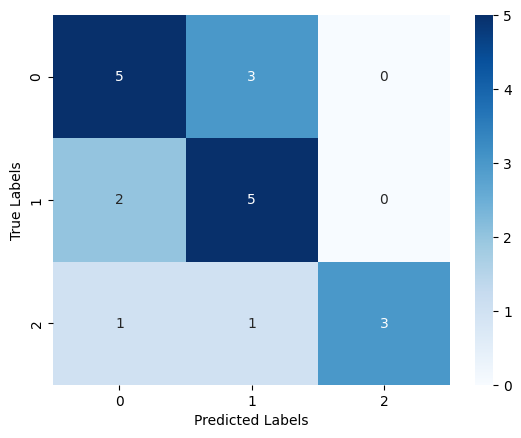

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Huge data Set

## Split To Test and Train Data

In [112]:
# # Split the DataFrame into two based on column B
# TestDF = cleanedDF[cleanedDF['shop_profile'] == 0].drop(['shop_profile'], axis=1)
# TrainDF = cleanedDF[cleanedDF['shop_profile'] != 0]

In [113]:
# # reset index
# TestDF=TestDF.reset_index(drop=True)
# TrainDF=TrainDF.reset_index(drop=True)

In [114]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt

# # Separate the target variable
# X = TrainDF.drop(['shop_profile'], axis=1)
# y = TrainDF['shop_profile']

# # Compute MI scores
# mi_scores = mutual_info_classif(X, y)

# # Convert to DataFrame and sort by MI score
# mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
# mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# # Plot bar chart of MI scores
# plt.figure(figsize=(12,8))
# plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('MI Score')
# plt.show()

In [115]:
# from sklearn.decomposition import PCA

# # Create principal components
# pca = PCA()
# PCA_X = pca.fit_transform(X.drop(['shop_id'], axis=1))

# # Convert to dataframe
# component_names = [f"PC{i+1}" for i in range(PCA_X.shape[1])]
# PCA_X = pd.DataFrame(PCA_X, columns=component_names)

# PCA_X = pd.concat([PCA_X, X['shop_id']], axis=1)


In [116]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt

# # Compute MI scores
# mi_scores = mutual_info_classif(PCA_X, y)

# # Convert to DataFrame and sort by MI score
# mi_scores_df = pd.DataFrame({'feature': PCA_X.columns, 'mi_score': mi_scores})
# mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# # Plot bar chart of MI scores
# plt.figure(figsize=(12,8))
# plt.bar(mi_scores_df['feature'], mi_scores_df['mi_score'])
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('MI Score')
# plt.show()

In [117]:
# X=PCA_X

In [118]:
# cleanedDF

In [119]:
# # Split Fulldata into training and testing sets
# from sklearn.model_selection import train_test_split

# column_name = 'shop_id'
# unique_categories = TrainDF[column_name].nunique()
# categories_in_dataset_1 = int(unique_categories * 0.8)
# categories_in_dataset_2 = unique_categories - categories_in_dataset_1
# dataset_1_categories = TrainDF[column_name].unique()[:categories_in_dataset_1]
# dataset_2_categories = TrainDF[column_name].unique()[categories_in_dataset_1:]

# train_data = TrainDF[TrainDF[column_name].isin(dataset_1_categories)]
# test_data = TrainDF[TrainDF[column_name].isin(dataset_2_categories)]





# #train_data, test_data = train_test_split(TrainDF, test_size=0.01)

In [120]:
# test_data=test_data.reset_index(drop=True)
# train_data=train_data.reset_index(drop=True)

In [121]:
# # remove store id from the training and testing sets

# train_data_noID = train_data.drop(['shop_id'], axis=1)
# test_data_noID = test_data.drop(['shop_id'], axis=1)

## XG boost

In [122]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [123]:

# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Set the parameters for grid search
# params = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01, 0.1, 1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'objective': ['multi:softmax', 'multi:softprob'],
#     'num_class': [3],
#     'tree_method': ['gpu_hist']
# }

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found by grid search
# print(grid_search.best_params_)

# # Train the model using the best hyperparameters found by grid search
# xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# xg_pred = xgb_model.predict(X_test)

# # Evaluate the model's performance on the test set
# accuracy = np.mean(xg_pred == y_test)
# print('Accuracy:', accuracy)



Best hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.5}

In [124]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']


# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(tree_method='gpu_hist')

# # fit model to training data
# xgb_model.fit(X_train, y_train)

# # make predictions on test data
# xg_pred = xgb_model.predict(X_test)

# # evaluate performance of model
# mse = mean_squared_error(y_test, xg_pred)
# print('MSE:', mse)

MSE: 0.40624200562803786

In [125]:
# xg_pred=pd.DataFrame(xg_pred, columns=['shop_profile'])

# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# xg_pred['shop_profile'] = xg_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [126]:
# predicted_res = pd.concat([test_data['shop_id'], pred['shop_profile']], axis=1)
# expected_res=test_data[['shop_id', 'shop_profile']]

# pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=exp_mode['shop_profile']
# y_pred=pred_mode['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


In [127]:
# xg_pred

In [128]:
# concatenated_df_XG_res = pd.concat([test_data['shop_id'], xg_pred['shop_profile']], axis=1)
# # concatenated_df_XG_res['shop_profile'] = concatenated_df_XG_res['shop_profile'].astype(int)
# # concatenated_df_XG_res['shop_id'] = concatenated_df_XG_res['shop_id'].astype(int)

In [129]:
# concatenated_df_XG_res

In [130]:
# expected_df_XG=test_data[['shop_id', 'shop_profile']]

In [131]:
# expected_df_XG

In [132]:
# # group by 'group' column and calculate mode of 'value' column
# XG_res_mode_df = concatenated_df_XG_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [133]:
# XG_res_mode_df

In [134]:
# group by 'group' column and calculate mode of 'value' column
# XG_exp_mode_df = expected_df_XG.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [135]:
# XG_exp_mode_df

In [136]:
# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=XG_exp_mode_df['shop_profile']
# y_pred=XG_res_mode_df['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


Average F1 score: 0.47

In [137]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Assume y_true and y_pred are the true and predicted labels, respectively
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()


## Random Forrest

In [138]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split


# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Initialize the Random Forest classifier
# rfc = RandomForestClassifier(max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=25)

# # Train the model on the training data
# rfc.fit(X_train, y_train)

# # Predict on the testing data
# RF_pred = rfc.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, RF_pred)
# print("Accuracy:", accuracy)



Accuracy: 0.6433444188624542

In [139]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import classification_report

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Create the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform a grid search over the parameter grid with cross-validation
# rf_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# rf_cv.fit(X_train, y_train)

# # Print the best parameters found by the grid search
# print("Best Parameters:", rf_cv.best_params_)

# # Predict on the test data using the best model
# RF_pred = rf_cv.predict(X_test)

# # Print the classification report
# print(classification_report(y_test, RF_pred))


In [140]:
# RF_pred = pd.DataFrame(RF_pred, columns=['shop_profile'])

# predicted_res = pd.concat([test_data['shop_id'], RF_pred['shop_profile']], axis=1)
# expected_res=test_data[['shop_id', 'shop_profile']]

# pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

# # import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score

# y_test=exp_mode['shop_profile']
# y_pred=pred_mode['shop_profile']

# # calculate the F1 score for each class
# f1_class0 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# f1_class1 = f1_score(y_test, y_pred, labels=[2], average='weighted')
# f1_class2 = f1_score(y_test, y_pred, labels=[3], average='weighted')

# # calculate the average F1 score
# f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# # print the results
# print(f"F1 score for class 0: {f1_class0:.2f}")
# print(f"F1 score for class 1: {f1_class1:.2f}")
# print(f"F1 score for class 2: {f1_class2:.2f}")
# print(f"Average F1 score: {f1_average:.2f}")


Average F1 score: 0.53

In [141]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Assume y_true and y_pred are the true and predicted labels, respectively
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

In [142]:
# TestDF

In [143]:
# X_test

In [144]:
# Eval_noID=TestDF.drop('shop_id', axis=1)

In [145]:
# Eval_noID

In [146]:
# X_Eval=Eval_noID

# # Predict on the evaluation set
# RF_eval_pred = rfc.predict(X_Eval)

In [147]:
# RF_eval_pred

In [148]:
# RF_eval_pred = pd.DataFrame(RF_eval_pred, columns=['shop_profile'])

# predicted_eval_res = pd.concat([TestDF['shop_id'], RF_eval_pred['shop_profile']], axis=1)


# pred_Eval_mode = predicted_eval_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()

In [149]:
# pred_Eval_mode['shop_profile'] = pred_Eval_mode['shop_profile'].replace({1:'High', 2:'Moderate', 3:'Low'})

In [150]:
# pred_Eval_mode

## Big Tune

In [151]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# test_data['shop_profile'] = test_data['shop_profile'].replace({1: 0, 2: 1, 3: 2})
# train_data['shop_profile'] = train_data['shop_profile'].replace({1: 0, 2: 1, 3: 2})

In [152]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

# # # Create a custom scoring function
# # def custom_scorer(y_true, y_pred):
# #     selected_testData = test_data.loc[y_pred.index]
# #     # predicted_res = pd.concat([test_data['shop_id'], y_pred['shop_profile']], axis=1)
# #     # merge dataframes on row index
# #     predicted_res = y_pred['shop_profile'].merge(test_data['shop_id'], left_index=True, right_index=True, how='left')
# #     expected_res=selected_testData[['shop_id', 'shop_profile']]

# #     # reset indexes
# #     predicted_res=predicted_res.reset_index(drop=True)
# #     expected_res=expected_res.reset_index(drop=True)
    
# #     predicted_res
# #     expected_res.head(10)
    
# #     pred_mode = predicted_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
# #     exp_mode = expected_res.groupby('shop_id')['shop_profile'].apply(lambda x: x.mode()[0]).reset_index()
    
# #     pred_mode.head(10)
# #     exp_mode.head(10)

# #     # import necessary libraries
# #     import pandas as pd
# #     from sklearn.model_selection import train_test_split
# #     from sklearn.tree import DecisionTreeClassifier
# #     from sklearn.metrics import f1_score

# #     y_test=exp_mode['shop_profile']
# #     y_pred=pred_mode['shop_profile']

# #     # calculate the F1 score for each class
# #     f1_class0 = f1_score(y_test, y_pred, labels=[0], average='weighted')
# #     f1_class1 = f1_score(y_test, y_pred, labels=[1], average='weighted')
# #     f1_class2 = f1_score(y_test, y_pred, labels=[2], average='weighted')

# #     # calculate the average F1 score
# #     f1_average = (f1_class0 + f1_class1 + f1_class2) / 3

# #     # print the results
# #     print(f"F1 score for class 0: {f1_class0:.2f}")
# #     print(f"F1 score for class 1: {f1_class1:.2f}")
# #     print(f"F1 score for class 2: {f1_class2:.2f}")
# #     print(f"Average F1 score: {f1_average:.2f}")
    
# #     formatted_f1_average = "{:.4f}".format(f1_average)
# #     print(formatted_f1_average)
    
# #     return formatted_f1_average

# # Split data into training and test sets
# X_train=train_data_noID.drop('shop_profile', axis=1)
# y_train=train_data_noID['shop_profile']
# X_test=test_data_noID.drop('shop_profile', axis=1)
# y_test=test_data_noID['shop_profile']

# # Define the models to be hyperparameter tuned
# models = [    {'name': 'XGBoost',        
#             'model': XGBClassifier(tree_method='gpu_hist'),        
#             'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'learning_rate': [0.01, 0.1, 0.3],
#             'min_child_weight': [1, 3, 5],
#             'gamma': [0.0, 0.1, 0.2]
#         }
#     },
#     {
#         'name': 'Random Forest',
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4],
#             'max_features': ['sqrt', 'log2']
#         }
#     },
#     {
#         'name': 'Logistic Regression',
#         'model': LogisticRegression(penalty='l2'),
#         'params': {
#             'C': [0.1, 1.0, 10.0],
#             'solver': ['lbfgs', 'liblinear', 'saga'],
#             'max_iter': [100, 500, 1000]
#         }
#     },
#     {
#         'name': 'KNN',
#         'model': KNeighborsClassifier(),
#         'params': {
#             'n_neighbors': [3, 5, 7],
#             'p': [1, 2],
#             'weights': ['uniform', 'distance'],
#             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#         }
#     }
# ]


# # Perform hyperparameter tuning for each model using GridSearchCV
# best_model = None
# best_score = 0.0
# for model_config in models:
#     print(f'Tuning {model_config["name"]}...')
#     model = model_config['model']
#     params = model_config['params']
#     # Create scorer object using custom scoring function
#     # scorer = make_scorer(custom_scorer)

#     custom_grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=params,
#         cv=5,
#         # scoring=scorer,
#         n_jobs=-1
#     )
#     custom_grid_search.fit(X_train, y_train)
#     score = custom_grid_search.best_score_
#     print(f'Best score for {model_config["name"]}: {score:.4f}')
#     print(f'Best Parametersfor {model_config["name"]}:  {custom_grid_search.best_params_}')
#     if score > best_score:
#         best_score = score
#         best_model = custom_grid_search.best_estimator_
#         best_model_name = model_config['name']
#         best_model_hyperparams = custom_grid_search.best_params_

# # Train the best model on the full training set
# best_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Calculate accuracy score on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test accuracy score for the best model: {accuracy:.4f}')


In [153]:
# train_data_noID['shop_profile'] = train_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data_noID['shop_profile'] = test_data_noID['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# test_data['shop_profile'] = test_data['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# train_data['shop_profile'] = train_data['shop_profile'].replace({0: 1, 1: 2, 2: 3})
# y_pred['shop_profile'] = y_pred['shop_profile'].replace({0: 1, 1: 2, 2: 3})

In [154]:
# Tuning XGBoost...
# Best score for XGBoost: 0.5472
# Best Parametersfor XGBoost:  {'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50}
# Tuning Random Forest...
# Best score for Random Forest: 0.6070
# Best Parametersfor Random Forest:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}
# Tuning Logistic Regression...
# Best score for Logistic Regression: 0.5213
# Best Parametersfor Logistic Regression:  {'C': 10.0, 'max_iter': 100, 'solver': 'liblinear'}
# Tuning KNN...
# Best score for KNN: 0.4415
# Best Parametersfor KNN:  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
# Test accuracy score for the best model: 0.7184